In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_2016 = pd.read_csv('./output/train_2016.csv')
df_2017 = pd.read_csv('./output/train_2017.csv')
df_merge = pd.concat([df_2016, df_2017])

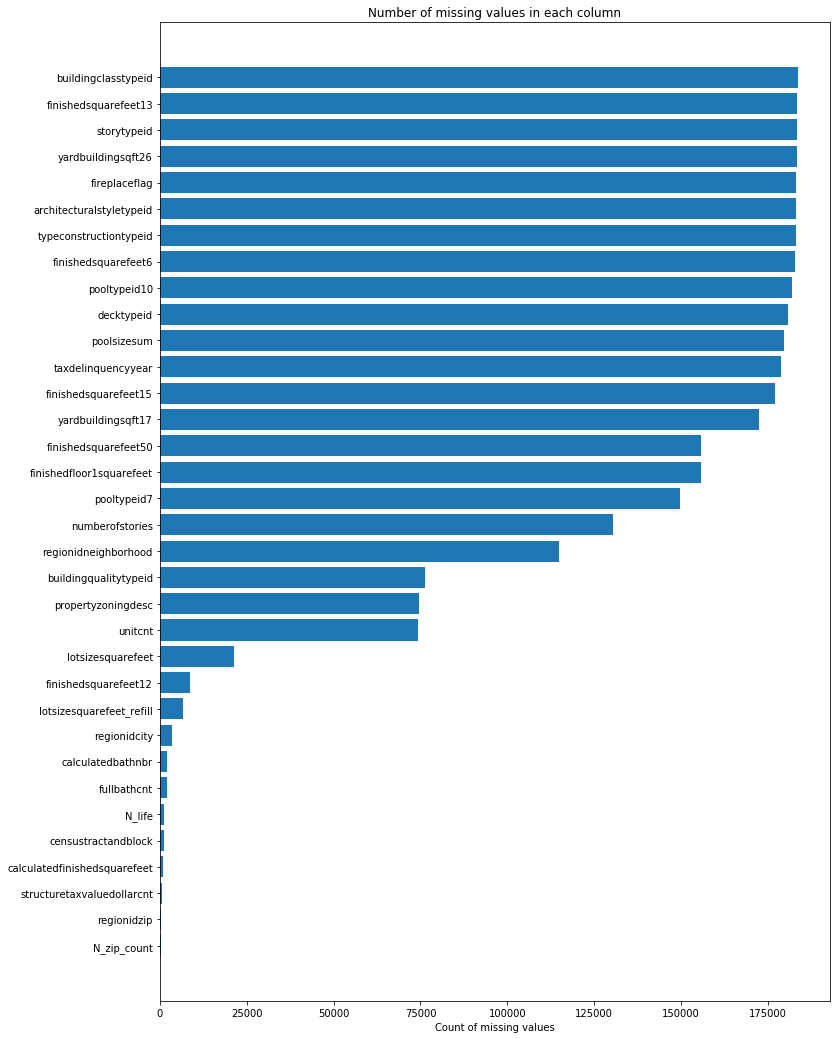

In [3]:
missing_df = df_merge.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>248]
missing_df = missing_df.sort_values('missing_count')
ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values)
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
missing_df.to_csv('./output/plot_csv/total_missing_value.csv', index = False)
plt.show()

In [4]:
from pandas.api.types import is_datetime64_any_dtype as is_datetime
from pandas.api.types import is_categorical_dtype
def total_delete(df):
    missing_perc_thresh = 0.95
    delete_missing = []
    num_rows = df.shape[0]
    for i in df.columns:
        num_missing = df[i].isnull().sum()
        missing_perc = num_missing / float(num_rows)
        if missing_perc > missing_perc_thresh:
            delete_missing.append(i)
    delete_unique = []
    for i in df.columns:
        num_uniques = len(df[i].unique())
        if df[i].isnull().sum() != 0:
            num_uniques -= 1
        if num_uniques == 1:
            delete_unique.append(i)
    delete_list = delete_missing
    for i in delete_unique:
        if i not in delete_missing:
            delete_list.append(i)
    return delete_list


def reduce_mem_usage(df, use_float16=False):
    """
    Iterate through all the columns of a dataframe and modify the data type to reduce memory usage.        
    """
    
    start_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage of dataframe is {:.2f} MB".format(start_mem))
    
    for col in df.columns:
        if is_datetime(df[col]) or is_categorical_dtype(df[col]):
            continue
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if use_float16 and c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype("category")

    end_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage after optimization is: {:.2f} MB".format(end_mem))
    print("Decreased by {:.1f}%".format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [5]:
# calculatedfinishedsqarefeet and finishedsquarefeet50 are same in the description
# finishedsqarefeet50 has more missing value so delete this
cor_feet = df_merge['finishedfloor1squarefeet'].corr(df_merge['finishedsquarefeet50'])
print("the correlation between finishedfloor1squarefeet and finishedsquarefeet50 is " + str(cor_feet))
print("finishedfloor1squarefeet's missing value is " + \
      str(df_merge.finishedfloor1squarefeet.isna().sum()))
print("finishedsquarefeet50's missing value is " + \
      str(df_merge.finishedsquarefeet50.isna().sum()))

# rawcensustractandblock and censustractandblock are same in the description
# censustractandblock has more missing value so delete this
cor_feet = df_merge['censustractandblock'].corr(df_merge['rawcensustractandblock'])
print("the correlation between censustractandblock and rawcensustractandblock is " + str(cor_feet))
print("rawcensustractandblock's missing value is " + \
      str(df_merge.rawcensustractandblock.isna().sum()))
print("censustractandblock's missing value is " + \
      str(df_merge.censustractandblock.isna().sum()))

# bathroomcnt and fullbathcnt are same in the description
# fullbathcnt has more missing value so delete this
cor_bath = df_merge['bathroomcnt'].corr(df_merge['fullbathcnt'])
print("the correlation between bathroomcnt and fullbathcnt is " + str(cor_bath))
print("bathroomcnt's missing value is " + str(df_merge.bathroomcnt.isna().sum()))
print("fullbathcnt's missing value is " + str(df_merge.fullbathcnt.isna().sum()))
extra_list = ['finishedsqarefeet50', 'censustractandblock', 'fullbathcnt',  'propertycountylandusecode',
              'regionidzip', 'unitcnt', 'buildingqualitytypeid', 'regionidneighborhood', 'regionidcity', 
              'yearbuilt', 'yearbuilt_fill', 'propertyzoningdesc']

the correlation between finishedfloor1squarefeet and finishedsquarefeet50 is 0.9589867116304377
finishedfloor1squarefeet's missing value is 155707
finishedsquarefeet50's missing value is 155707
the correlation between censustractandblock and rawcensustractandblock is 0.19009939437708673
rawcensustractandblock's missing value is 0
censustractandblock's missing value is 1178
the correlation between bathroomcnt and fullbathcnt is 0.9820691797304976
bathroomcnt's missing value is 34
fullbathcnt's missing value is 2150


In [6]:
df_merge = reduce_mem_usage(df_merge)
df_merge["transactiondate"] = pd.to_datetime(df_merge["transactiondate"],format="%Y-%m-%d %H:%M:%S")
df_merge['month'] = df_merge['transactiondate'].dt.month
df_merge['year'] = df_merge['transactiondate'].dt.year
exist_list = [x for x in list(df_merge.columns) if x not in list(set(total_delete(df_merge) + extra_list))]
from sklearn.preprocessing import LabelEncoder
categories_features = ['airconditioningtypeid', 'hashottuborspa', 'heatingorsystemtypeid', 
                       'pooltypeid2', 'propertylandusetypeid', 'rawcensustractandblock', 'fips',
                       'regionidcounty', 'buildingqualitytypeid_fill', 'regionidcity_fill', 'year', 
                       'regionidneighborhood_fill', 'regionidzip_fill', 'taxdelinquencyflag']
le = LabelEncoder()
df_merge['year'] = le.fit_transform(df_merge["year"].astype('str'))

Memory usage of dataframe is 105.08 MB
Memory usage after optimization is: 45.83 MB
Decreased by 56.4%


In [7]:
from sklearn.model_selection import KFold
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
def check_rmse(features_list):
    score = 0
    params = {"objective": "regression", "boosting": "gbdt", "num_leaves": 512, 
              "learning_rate": 0.0021, 'bagging_fraction': 0.85, "reg_lambda": 0.1, 
              'reg_alpha':0.1, "metric": "rmse", 'max_depth': -1, 'min_child_weight': 30,
              'verbose': -1, 'min_split_gain':0.1, 'subsample_freq':1, 'sub_feature':  0.5}
    kf = KFold(n_splits=3)
    models = []
    feature = df_merge[features_list]
    categories = [x for x in categories_features if x in features_list]
    for train_index,test_index in kf.split(feature):
        train_features = feature.loc[train_index]
        train_target = target.loc[train_index]

        test_features = feature.loc[test_index]
        test_target = target.loc[test_index]

        d_training = lgb.Dataset(train_features, label=train_target,
                                 categorical_feature=categories, free_raw_data=False)
        d_test = lgb.Dataset(test_features, label=test_target,
                             categorical_feature=categories, free_raw_data=False)

        model = lgb.train(params, train_set=d_training, num_boost_round=1000, 
                          valid_sets=[d_training,d_test], verbose_eval=25, early_stopping_rounds=50)
        y_pred_valid = model.predict(test_features)
        score += np.sqrt(mean_squared_error(test_target, y_pred_valid)) / 3
    return score

In [8]:
df_merge = df_merge.reset_index()
df_merge.drop(['index'], axis = 1, inplace = True)
df_merge.drop(['transactiondate'], axis = 1, inplace = True)

In [22]:
from itertools import combinations
temp_list = ['total_high_hours', 'total_low_hours','max_temp','min_temp']
exist_list = [x for x in list(df_merge.columns) if x not in list(set(total_delete(df_merge) + extra_list))]
prop_list = [x for x in exist_list if x not in temp_list + ['logerror']]
target = df_merge.logerror
temp_dict = {'init': check_rmse(prop_list)}
for j in range(1, 5):
    for i in list(combinations(temp_list, j)):
        print(i)
        temp_dict[str(i)] = check_rmse(prop_list + list(i))
temp_df = pd.DataFrame.from_dict(temp_dict, orient = 'index')
temp_df = temp_df.reset_index().rename(columns = {'index': 'temp_feature', 0: 'rmse'})
temp_df.to_csv('./output/plot_csv/tempeature_features.csv', index = False)

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164497	valid_1's rmse: 0.163088
[50]	training's rmse: 0.163837	valid_1's rmse: 0.163005
[75]	training's rmse: 0.163198	valid_1's rmse: 0.162931
[100]	training's rmse: 0.162589	valid_1's rmse: 0.16286
[125]	training's rmse: 0.16199	valid_1's rmse: 0.162794
[150]	training's rmse: 0.161437	valid_1's rmse: 0.16274
[175]	training's rmse: 0.160907	valid_1's rmse: 0.16269
[200]	training's rmse: 0.160387	valid_1's rmse: 0.162648
[225]	training's rmse: 0.159887	valid_1's rmse: 0.162612
[250]	training's rmse: 0.159426	valid_1's rmse: 0.162577
[275]	training's rmse: 0.158967	valid_1's rmse: 0.162547
[300]	training's rmse: 0.15852	valid_1's rmse: 0.162518
[325]	training's rmse: 0.158083	valid_1's rmse: 0.162496
[350]	training's rmse: 0.157654	valid_1's rmse: 0.162483
[375]	training's rmse: 0.157276	valid_1's rmse: 0.162468
[400]	training's rmse: 0.156894	valid_1's rmse: 0.162451
[425]	training's rmse: 0.15652	vali

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167613	valid_1's rmse: 0.156579
[50]	training's rmse: 0.166939	valid_1's rmse: 0.156496
[75]	training's rmse: 0.1663	valid_1's rmse: 0.15642
[100]	training's rmse: 0.165708	valid_1's rmse: 0.156351
[125]	training's rmse: 0.165101	valid_1's rmse: 0.15629
[150]	training's rmse: 0.164551	valid_1's rmse: 0.156242
[175]	training's rmse: 0.16402	valid_1's rmse: 0.156192
[200]	training's rmse: 0.163488	valid_1's rmse: 0.156153
[225]	training's rmse: 0.162966	valid_1's rmse: 0.156125
[250]	training's rmse: 0.162499	valid_1's rmse: 0.156096
[275]	training's rmse: 0.162034	valid_1's rmse: 0.156069
[300]	training's rmse: 0.161589	valid_1's rmse: 0.156051
[325]	training's rmse: 0.161132	valid_1's rmse: 0.156033
[350]	training's rmse: 0.160691	valid_1's rmse: 0.15602
[375]	training's rmse: 0.160306	valid_1's rmse: 0.156012
[400]	training's rmse: 0.159923	valid_1's rmse: 0.156009
[425]	training's rmse: 0.159545	vali

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159398	valid_1's rmse: 0.173339
[50]	training's rmse: 0.158931	valid_1's rmse: 0.173283
[75]	training's rmse: 0.158462	valid_1's rmse: 0.173229
[100]	training's rmse: 0.158022	valid_1's rmse: 0.17318
[125]	training's rmse: 0.157592	valid_1's rmse: 0.173134
[150]	training's rmse: 0.157186	valid_1's rmse: 0.173096
[175]	training's rmse: 0.156798	valid_1's rmse: 0.173064
[200]	training's rmse: 0.15641	valid_1's rmse: 0.173035
[225]	training's rmse: 0.15604	valid_1's rmse: 0.17301
[250]	training's rmse: 0.155689	valid_1's rmse: 0.172987
[275]	training's rmse: 0.155358	valid_1's rmse: 0.172965
[300]	training's rmse: 0.155035	valid_1's rmse: 0.172949
[325]	training's rmse: 0.154718	valid_1's rmse: 0.172932
[350]	training's rmse: 0.154398	valid_1's rmse: 0.172922
[375]	training's rmse: 0.15412	valid_1's rmse: 0.172916
[400]	training's rmse: 0.153839	valid_1's rmse: 0.172907
[425]	training's rmse: 0.153558	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164569	valid_1's rmse: 0.163099
[50]	training's rmse: 0.163899	valid_1's rmse: 0.163018
[75]	training's rmse: 0.163235	valid_1's rmse: 0.162942
[100]	training's rmse: 0.162612	valid_1's rmse: 0.162867
[125]	training's rmse: 0.162029	valid_1's rmse: 0.162801
[150]	training's rmse: 0.161471	valid_1's rmse: 0.162741
[175]	training's rmse: 0.160927	valid_1's rmse: 0.162691
[200]	training's rmse: 0.16041	valid_1's rmse: 0.162648
[225]	training's rmse: 0.159902	valid_1's rmse: 0.162606
[250]	training's rmse: 0.159411	valid_1's rmse: 0.162575
[275]	training's rmse: 0.158947	valid_1's rmse: 0.162547
[300]	training's rmse: 0.158491	valid_1's rmse: 0.162515
[325]	training's rmse: 0.158071	valid_1's rmse: 0.162485
[350]	training's rmse: 0.157644	valid_1's rmse: 0.162472
[375]	training's rmse: 0.157244	valid_1's rmse: 0.162453
[400]	training's rmse: 0.156869	valid_1's rmse: 0.162443
[425]	training's rmse: 0.156503

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167675	valid_1's rmse: 0.156585
[50]	training's rmse: 0.167007	valid_1's rmse: 0.156494
[75]	training's rmse: 0.16636	valid_1's rmse: 0.156418
[100]	training's rmse: 0.165734	valid_1's rmse: 0.156343
[125]	training's rmse: 0.165123	valid_1's rmse: 0.156278
[150]	training's rmse: 0.164556	valid_1's rmse: 0.156222
[175]	training's rmse: 0.164008	valid_1's rmse: 0.156176
[200]	training's rmse: 0.163477	valid_1's rmse: 0.156132
[225]	training's rmse: 0.162946	valid_1's rmse: 0.156092
[250]	training's rmse: 0.162466	valid_1's rmse: 0.156065
[275]	training's rmse: 0.162012	valid_1's rmse: 0.156038
[300]	training's rmse: 0.161549	valid_1's rmse: 0.156016
[325]	training's rmse: 0.161097	valid_1's rmse: 0.155996
[350]	training's rmse: 0.160664	valid_1's rmse: 0.155987
[375]	training's rmse: 0.160262	valid_1's rmse: 0.155974
[400]	training's rmse: 0.15989	valid_1's rmse: 0.155964
[425]	training's rmse: 0.15951	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.15945	valid_1's rmse: 0.173341
[50]	training's rmse: 0.158974	valid_1's rmse: 0.17328
[75]	training's rmse: 0.158499	valid_1's rmse: 0.173224
[100]	training's rmse: 0.158033	valid_1's rmse: 0.173171
[125]	training's rmse: 0.157601	valid_1's rmse: 0.173129
[150]	training's rmse: 0.157183	valid_1's rmse: 0.173093
[175]	training's rmse: 0.156783	valid_1's rmse: 0.173061
[200]	training's rmse: 0.156393	valid_1's rmse: 0.173031
[225]	training's rmse: 0.156008	valid_1's rmse: 0.173007
[250]	training's rmse: 0.155648	valid_1's rmse: 0.172985
[275]	training's rmse: 0.155319	valid_1's rmse: 0.172967
[300]	training's rmse: 0.154988	valid_1's rmse: 0.172955
[325]	training's rmse: 0.154657	valid_1's rmse: 0.172944
[350]	training's rmse: 0.15434	valid_1's rmse: 0.172932
[375]	training's rmse: 0.154047	valid_1's rmse: 0.172922
[400]	training's rmse: 0.153779	valid_1's rmse: 0.172915
[425]	training's rmse: 0.153503	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164568	valid_1's rmse: 0.163097
[50]	training's rmse: 0.163899	valid_1's rmse: 0.163014
[75]	training's rmse: 0.16324	valid_1's rmse: 0.16294
[100]	training's rmse: 0.162616	valid_1's rmse: 0.162864
[125]	training's rmse: 0.162027	valid_1's rmse: 0.162796
[150]	training's rmse: 0.161462	valid_1's rmse: 0.162737
[175]	training's rmse: 0.160915	valid_1's rmse: 0.162685
[200]	training's rmse: 0.160403	valid_1's rmse: 0.162644
[225]	training's rmse: 0.159895	valid_1's rmse: 0.162603
[250]	training's rmse: 0.159414	valid_1's rmse: 0.162577
[275]	training's rmse: 0.158949	valid_1's rmse: 0.162548
[300]	training's rmse: 0.158497	valid_1's rmse: 0.162515
[325]	training's rmse: 0.158074	valid_1's rmse: 0.162487
[350]	training's rmse: 0.157644	valid_1's rmse: 0.16247
[375]	training's rmse: 0.157251	valid_1's rmse: 0.162449
[400]	training's rmse: 0.156876	valid_1's rmse: 0.162437
[425]	training's rmse: 0.15651	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167674	valid_1's rmse: 0.156586
[50]	training's rmse: 0.167009	valid_1's rmse: 0.156497
[75]	training's rmse: 0.166363	valid_1's rmse: 0.156422
[100]	training's rmse: 0.165738	valid_1's rmse: 0.15635
[125]	training's rmse: 0.16512	valid_1's rmse: 0.156285
[150]	training's rmse: 0.164552	valid_1's rmse: 0.156227
[175]	training's rmse: 0.164001	valid_1's rmse: 0.156184
[200]	training's rmse: 0.163471	valid_1's rmse: 0.15614
[225]	training's rmse: 0.162943	valid_1's rmse: 0.156103
[250]	training's rmse: 0.162463	valid_1's rmse: 0.156078
[275]	training's rmse: 0.162009	valid_1's rmse: 0.156054
[300]	training's rmse: 0.161547	valid_1's rmse: 0.156033
[325]	training's rmse: 0.161096	valid_1's rmse: 0.156012
[350]	training's rmse: 0.160658	valid_1's rmse: 0.156001
[375]	training's rmse: 0.16025	valid_1's rmse: 0.155987
[400]	training's rmse: 0.159874	valid_1's rmse: 0.155979
[425]	training's rmse: 0.159494	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159448	valid_1's rmse: 0.173343
[50]	training's rmse: 0.158972	valid_1's rmse: 0.173283
[75]	training's rmse: 0.158497	valid_1's rmse: 0.173226
[100]	training's rmse: 0.158032	valid_1's rmse: 0.173173
[125]	training's rmse: 0.157603	valid_1's rmse: 0.173129
[150]	training's rmse: 0.157187	valid_1's rmse: 0.173088
[175]	training's rmse: 0.156784	valid_1's rmse: 0.17305
[200]	training's rmse: 0.156396	valid_1's rmse: 0.17302
[225]	training's rmse: 0.156012	valid_1's rmse: 0.172998
[250]	training's rmse: 0.155651	valid_1's rmse: 0.172975
[275]	training's rmse: 0.155323	valid_1's rmse: 0.172957
[300]	training's rmse: 0.154991	valid_1's rmse: 0.17294
[325]	training's rmse: 0.154659	valid_1's rmse: 0.172926
[350]	training's rmse: 0.154339	valid_1's rmse: 0.172917
[375]	training's rmse: 0.154049	valid_1's rmse: 0.17291
[400]	training's rmse: 0.153781	valid_1's rmse: 0.172906
[425]	training's rmse: 0.153499	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164568	valid_1's rmse: 0.163099
[50]	training's rmse: 0.163897	valid_1's rmse: 0.163016
[75]	training's rmse: 0.163238	valid_1's rmse: 0.162941
[100]	training's rmse: 0.162614	valid_1's rmse: 0.162864
[125]	training's rmse: 0.162026	valid_1's rmse: 0.162796
[150]	training's rmse: 0.161468	valid_1's rmse: 0.16274
[175]	training's rmse: 0.160925	valid_1's rmse: 0.162688
[200]	training's rmse: 0.160409	valid_1's rmse: 0.162645
[225]	training's rmse: 0.1599	valid_1's rmse: 0.162605
[250]	training's rmse: 0.159412	valid_1's rmse: 0.162577
[275]	training's rmse: 0.158949	valid_1's rmse: 0.162547
[300]	training's rmse: 0.158493	valid_1's rmse: 0.162516
[325]	training's rmse: 0.158069	valid_1's rmse: 0.162493
[350]	training's rmse: 0.157639	valid_1's rmse: 0.162478
[375]	training's rmse: 0.157236	valid_1's rmse: 0.162459
[400]	training's rmse: 0.156862	valid_1's rmse: 0.162449
[425]	training's rmse: 0.156501	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167676	valid_1's rmse: 0.156583
[50]	training's rmse: 0.167009	valid_1's rmse: 0.156493
[75]	training's rmse: 0.166361	valid_1's rmse: 0.156417
[100]	training's rmse: 0.165734	valid_1's rmse: 0.156344
[125]	training's rmse: 0.165126	valid_1's rmse: 0.156279
[150]	training's rmse: 0.164557	valid_1's rmse: 0.156225
[175]	training's rmse: 0.164009	valid_1's rmse: 0.156179
[200]	training's rmse: 0.163476	valid_1's rmse: 0.156136
[225]	training's rmse: 0.16294	valid_1's rmse: 0.156092
[250]	training's rmse: 0.162462	valid_1's rmse: 0.156064
[275]	training's rmse: 0.162011	valid_1's rmse: 0.156041
[300]	training's rmse: 0.161551	valid_1's rmse: 0.156019
[325]	training's rmse: 0.161101	valid_1's rmse: 0.155997
[350]	training's rmse: 0.160667	valid_1's rmse: 0.155986
[375]	training's rmse: 0.160261	valid_1's rmse: 0.155972
[400]	training's rmse: 0.159887	valid_1's rmse: 0.155965
[425]	training's rmse: 0.159505

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.15945	valid_1's rmse: 0.173342
[50]	training's rmse: 0.158974	valid_1's rmse: 0.173282
[75]	training's rmse: 0.1585	valid_1's rmse: 0.173226
[100]	training's rmse: 0.158033	valid_1's rmse: 0.173173
[125]	training's rmse: 0.1576	valid_1's rmse: 0.173131
[150]	training's rmse: 0.157184	valid_1's rmse: 0.173096
[175]	training's rmse: 0.156783	valid_1's rmse: 0.173062
[200]	training's rmse: 0.156396	valid_1's rmse: 0.173031
[225]	training's rmse: 0.156015	valid_1's rmse: 0.173007
[250]	training's rmse: 0.155656	valid_1's rmse: 0.172985
[275]	training's rmse: 0.155324	valid_1's rmse: 0.172969
[300]	training's rmse: 0.15499	valid_1's rmse: 0.172953
[325]	training's rmse: 0.154661	valid_1's rmse: 0.17294
[350]	training's rmse: 0.154344	valid_1's rmse: 0.172929
[375]	training's rmse: 0.154055	valid_1's rmse: 0.17292
[400]	training's rmse: 0.153785	valid_1's rmse: 0.172912
[425]	training's rmse: 0.153505	valid_

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.16457	valid_1's rmse: 0.163099
[50]	training's rmse: 0.163902	valid_1's rmse: 0.163017
[75]	training's rmse: 0.16324	valid_1's rmse: 0.162939
[100]	training's rmse: 0.162617	valid_1's rmse: 0.162866
[125]	training's rmse: 0.162028	valid_1's rmse: 0.162797
[150]	training's rmse: 0.161469	valid_1's rmse: 0.162738
[175]	training's rmse: 0.160921	valid_1's rmse: 0.162688
[200]	training's rmse: 0.160407	valid_1's rmse: 0.162645
[225]	training's rmse: 0.1599	valid_1's rmse: 0.162602
[250]	training's rmse: 0.159415	valid_1's rmse: 0.162573
[275]	training's rmse: 0.158958	valid_1's rmse: 0.162543
[300]	training's rmse: 0.158504	valid_1's rmse: 0.162511
[325]	training's rmse: 0.158083	valid_1's rmse: 0.162484
[350]	training's rmse: 0.157657	valid_1's rmse: 0.162467
[375]	training's rmse: 0.157261	valid_1's rmse: 0.162447
[400]	training's rmse: 0.156883	valid_1's rmse: 0.162439
[425]	training's rmse: 0.156519	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167674	valid_1's rmse: 0.156585
[50]	training's rmse: 0.167009	valid_1's rmse: 0.156496
[75]	training's rmse: 0.166359	valid_1's rmse: 0.156418
[100]	training's rmse: 0.165733	valid_1's rmse: 0.156346
[125]	training's rmse: 0.165118	valid_1's rmse: 0.156282
[150]	training's rmse: 0.164546	valid_1's rmse: 0.156224
[175]	training's rmse: 0.163996	valid_1's rmse: 0.156178
[200]	training's rmse: 0.16347	valid_1's rmse: 0.156136
[225]	training's rmse: 0.162944	valid_1's rmse: 0.156095
[250]	training's rmse: 0.162462	valid_1's rmse: 0.156069
[275]	training's rmse: 0.162013	valid_1's rmse: 0.156045
[300]	training's rmse: 0.161551	valid_1's rmse: 0.156024
[325]	training's rmse: 0.161096	valid_1's rmse: 0.156002
[350]	training's rmse: 0.160664	valid_1's rmse: 0.155991
[375]	training's rmse: 0.160257	valid_1's rmse: 0.155979
[400]	training's rmse: 0.159883	valid_1's rmse: 0.155971
[425]	training's rmse: 0.159504

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159449	valid_1's rmse: 0.173343
[50]	training's rmse: 0.158974	valid_1's rmse: 0.173283
[75]	training's rmse: 0.1585	valid_1's rmse: 0.173228
[100]	training's rmse: 0.158033	valid_1's rmse: 0.173177
[125]	training's rmse: 0.157604	valid_1's rmse: 0.173134
[150]	training's rmse: 0.157188	valid_1's rmse: 0.173093
[175]	training's rmse: 0.156787	valid_1's rmse: 0.173059
[200]	training's rmse: 0.156395	valid_1's rmse: 0.173031
[225]	training's rmse: 0.156012	valid_1's rmse: 0.173005
[250]	training's rmse: 0.155654	valid_1's rmse: 0.172983
[275]	training's rmse: 0.155321	valid_1's rmse: 0.172962
[300]	training's rmse: 0.154988	valid_1's rmse: 0.172946
[325]	training's rmse: 0.154657	valid_1's rmse: 0.172932
[350]	training's rmse: 0.154337	valid_1's rmse: 0.172923
[375]	training's rmse: 0.154045	valid_1's rmse: 0.172914
[400]	training's rmse: 0.153776	valid_1's rmse: 0.172909
[425]	training's rmse: 0.153496	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.16453	valid_1's rmse: 0.163098
[50]	training's rmse: 0.163898	valid_1's rmse: 0.163013
[75]	training's rmse: 0.163253	valid_1's rmse: 0.162937
[100]	training's rmse: 0.162666	valid_1's rmse: 0.162866
[125]	training's rmse: 0.162079	valid_1's rmse: 0.162801
[150]	training's rmse: 0.161508	valid_1's rmse: 0.162744
[175]	training's rmse: 0.160991	valid_1's rmse: 0.162699
[200]	training's rmse: 0.160447	valid_1's rmse: 0.162653
[225]	training's rmse: 0.159936	valid_1's rmse: 0.162614
[250]	training's rmse: 0.159468	valid_1's rmse: 0.162579
[275]	training's rmse: 0.159016	valid_1's rmse: 0.162544
[300]	training's rmse: 0.158564	valid_1's rmse: 0.162513
[325]	training's rmse: 0.158148	valid_1's rmse: 0.162487
[350]	training's rmse: 0.157728	valid_1's rmse: 0.162466
[375]	training's rmse: 0.157345	valid_1's rmse: 0.162445
[400]	training's rmse: 0.15698	valid_1's rmse: 0.162432
[425]	training's rmse: 0.156601	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167639	valid_1's rmse: 0.156577
[50]	training's rmse: 0.167006	valid_1's rmse: 0.156498
[75]	training's rmse: 0.166361	valid_1's rmse: 0.156424
[100]	training's rmse: 0.165774	valid_1's rmse: 0.15636
[125]	training's rmse: 0.165164	valid_1's rmse: 0.156296
[150]	training's rmse: 0.164596	valid_1's rmse: 0.15624
[175]	training's rmse: 0.164079	valid_1's rmse: 0.156191
[200]	training's rmse: 0.163531	valid_1's rmse: 0.156154
[225]	training's rmse: 0.163005	valid_1's rmse: 0.156122
[250]	training's rmse: 0.162526	valid_1's rmse: 0.15609
[275]	training's rmse: 0.162074	valid_1's rmse: 0.156068
[300]	training's rmse: 0.161609	valid_1's rmse: 0.156049
[325]	training's rmse: 0.161192	valid_1's rmse: 0.156029
[350]	training's rmse: 0.160766	valid_1's rmse: 0.156014
[375]	training's rmse: 0.160371	valid_1's rmse: 0.156
[400]	training's rmse: 0.159995	valid_1's rmse: 0.155989
[425]	training's rmse: 0.159611	vali

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159422	valid_1's rmse: 0.173344
[50]	training's rmse: 0.15896	valid_1's rmse: 0.173285
[75]	training's rmse: 0.158493	valid_1's rmse: 0.173227
[100]	training's rmse: 0.158058	valid_1's rmse: 0.173178
[125]	training's rmse: 0.157618	valid_1's rmse: 0.173138
[150]	training's rmse: 0.157196	valid_1's rmse: 0.173097
[175]	training's rmse: 0.156812	valid_1's rmse: 0.173068
[200]	training's rmse: 0.156412	valid_1's rmse: 0.173038
[225]	training's rmse: 0.156045	valid_1's rmse: 0.17301
[250]	training's rmse: 0.155706	valid_1's rmse: 0.17299
[275]	training's rmse: 0.155379	valid_1's rmse: 0.17297
[300]	training's rmse: 0.155031	valid_1's rmse: 0.172954
[325]	training's rmse: 0.154721	valid_1's rmse: 0.172938
[350]	training's rmse: 0.154409	valid_1's rmse: 0.172924
[375]	training's rmse: 0.154115	valid_1's rmse: 0.172911
[400]	training's rmse: 0.153848	valid_1's rmse: 0.172901
[425]	training's rmse: 0.153568	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164531	valid_1's rmse: 0.163098
[50]	training's rmse: 0.1639	valid_1's rmse: 0.163016
[75]	training's rmse: 0.163254	valid_1's rmse: 0.162942
[100]	training's rmse: 0.162668	valid_1's rmse: 0.16287
[125]	training's rmse: 0.162078	valid_1's rmse: 0.162805
[150]	training's rmse: 0.161508	valid_1's rmse: 0.162751
[175]	training's rmse: 0.160994	valid_1's rmse: 0.162705
[200]	training's rmse: 0.160449	valid_1's rmse: 0.162661
[225]	training's rmse: 0.15994	valid_1's rmse: 0.162621
[250]	training's rmse: 0.159467	valid_1's rmse: 0.162587
[275]	training's rmse: 0.159021	valid_1's rmse: 0.162556
[300]	training's rmse: 0.158564	valid_1's rmse: 0.162524
[325]	training's rmse: 0.158155	valid_1's rmse: 0.162499
[350]	training's rmse: 0.157735	valid_1's rmse: 0.162477
[375]	training's rmse: 0.157345	valid_1's rmse: 0.162459
[400]	training's rmse: 0.156981	valid_1's rmse: 0.162442
[425]	training's rmse: 0.156598	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167641	valid_1's rmse: 0.156575
[50]	training's rmse: 0.167011	valid_1's rmse: 0.156493
[75]	training's rmse: 0.166367	valid_1's rmse: 0.156417
[100]	training's rmse: 0.165783	valid_1's rmse: 0.156352
[125]	training's rmse: 0.165173	valid_1's rmse: 0.156289
[150]	training's rmse: 0.164609	valid_1's rmse: 0.156233
[175]	training's rmse: 0.164091	valid_1's rmse: 0.156184
[200]	training's rmse: 0.16354	valid_1's rmse: 0.156146
[225]	training's rmse: 0.163013	valid_1's rmse: 0.156113
[250]	training's rmse: 0.162538	valid_1's rmse: 0.156081
[275]	training's rmse: 0.162085	valid_1's rmse: 0.156058
[300]	training's rmse: 0.161619	valid_1's rmse: 0.156039
[325]	training's rmse: 0.161205	valid_1's rmse: 0.15602
[350]	training's rmse: 0.160787	valid_1's rmse: 0.156007
[375]	training's rmse: 0.160387	valid_1's rmse: 0.155992
[400]	training's rmse: 0.160012	valid_1's rmse: 0.155981
[425]	training's rmse: 0.159622	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159422	valid_1's rmse: 0.173344
[50]	training's rmse: 0.158957	valid_1's rmse: 0.173286
[75]	training's rmse: 0.158488	valid_1's rmse: 0.173228
[100]	training's rmse: 0.158053	valid_1's rmse: 0.173178
[125]	training's rmse: 0.157615	valid_1's rmse: 0.173136
[150]	training's rmse: 0.157193	valid_1's rmse: 0.173097
[175]	training's rmse: 0.156806	valid_1's rmse: 0.173067
[200]	training's rmse: 0.156405	valid_1's rmse: 0.173038
[225]	training's rmse: 0.156041	valid_1's rmse: 0.173008
[250]	training's rmse: 0.155702	valid_1's rmse: 0.172986
[275]	training's rmse: 0.155379	valid_1's rmse: 0.172965
[300]	training's rmse: 0.155031	valid_1's rmse: 0.172947
[325]	training's rmse: 0.15472	valid_1's rmse: 0.172932
[350]	training's rmse: 0.154411	valid_1's rmse: 0.172919
[375]	training's rmse: 0.154118	valid_1's rmse: 0.172908
[400]	training's rmse: 0.153848	valid_1's rmse: 0.172897
[425]	training's rmse: 0.153569

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164528	valid_1's rmse: 0.163098
[50]	training's rmse: 0.163895	valid_1's rmse: 0.163015
[75]	training's rmse: 0.163251	valid_1's rmse: 0.162939
[100]	training's rmse: 0.162672	valid_1's rmse: 0.162866
[125]	training's rmse: 0.162082	valid_1's rmse: 0.162804
[150]	training's rmse: 0.16151	valid_1's rmse: 0.162752
[175]	training's rmse: 0.160995	valid_1's rmse: 0.162704
[200]	training's rmse: 0.160449	valid_1's rmse: 0.162661
[225]	training's rmse: 0.159938	valid_1's rmse: 0.162622
[250]	training's rmse: 0.159465	valid_1's rmse: 0.162585
[275]	training's rmse: 0.159022	valid_1's rmse: 0.162552
[300]	training's rmse: 0.158567	valid_1's rmse: 0.162521
[325]	training's rmse: 0.158154	valid_1's rmse: 0.162495
[350]	training's rmse: 0.157737	valid_1's rmse: 0.162475
[375]	training's rmse: 0.157349	valid_1's rmse: 0.162455
[400]	training's rmse: 0.156978	valid_1's rmse: 0.16244
[425]	training's rmse: 0.156595	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167641	valid_1's rmse: 0.156578
[50]	training's rmse: 0.167008	valid_1's rmse: 0.156498
[75]	training's rmse: 0.166361	valid_1's rmse: 0.156423
[100]	training's rmse: 0.165776	valid_1's rmse: 0.156359
[125]	training's rmse: 0.165164	valid_1's rmse: 0.156294
[150]	training's rmse: 0.164593	valid_1's rmse: 0.15624
[175]	training's rmse: 0.164076	valid_1's rmse: 0.156191
[200]	training's rmse: 0.163527	valid_1's rmse: 0.156152
[225]	training's rmse: 0.162998	valid_1's rmse: 0.156124
[250]	training's rmse: 0.16252	valid_1's rmse: 0.156089
[275]	training's rmse: 0.162068	valid_1's rmse: 0.156065
[300]	training's rmse: 0.161598	valid_1's rmse: 0.156046
[325]	training's rmse: 0.161179	valid_1's rmse: 0.156025
[350]	training's rmse: 0.16076	valid_1's rmse: 0.156011
[375]	training's rmse: 0.160356	valid_1's rmse: 0.155996
[400]	training's rmse: 0.159981	valid_1's rmse: 0.155986
[425]	training's rmse: 0.159599	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159422	valid_1's rmse: 0.173344
[50]	training's rmse: 0.158959	valid_1's rmse: 0.173286
[75]	training's rmse: 0.158494	valid_1's rmse: 0.173231
[100]	training's rmse: 0.158059	valid_1's rmse: 0.17318
[125]	training's rmse: 0.157621	valid_1's rmse: 0.173138
[150]	training's rmse: 0.157198	valid_1's rmse: 0.1731
[175]	training's rmse: 0.156816	valid_1's rmse: 0.17307
[200]	training's rmse: 0.156418	valid_1's rmse: 0.173042
[225]	training's rmse: 0.156052	valid_1's rmse: 0.173013
[250]	training's rmse: 0.155711	valid_1's rmse: 0.17299
[275]	training's rmse: 0.155385	valid_1's rmse: 0.172971
[300]	training's rmse: 0.15504	valid_1's rmse: 0.172953
[325]	training's rmse: 0.154732	valid_1's rmse: 0.172937
[350]	training's rmse: 0.154423	valid_1's rmse: 0.172924
[375]	training's rmse: 0.154126	valid_1's rmse: 0.172914
[400]	training's rmse: 0.153859	valid_1's rmse: 0.172903
[425]	training's rmse: 0.15358	valid

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164529	valid_1's rmse: 0.163096
[50]	training's rmse: 0.163899	valid_1's rmse: 0.163013
[75]	training's rmse: 0.163255	valid_1's rmse: 0.16294
[100]	training's rmse: 0.162673	valid_1's rmse: 0.162867
[125]	training's rmse: 0.162084	valid_1's rmse: 0.162806
[150]	training's rmse: 0.161513	valid_1's rmse: 0.162754
[175]	training's rmse: 0.160997	valid_1's rmse: 0.16271
[200]	training's rmse: 0.16045	valid_1's rmse: 0.162668
[225]	training's rmse: 0.159934	valid_1's rmse: 0.16263
[250]	training's rmse: 0.159464	valid_1's rmse: 0.162591
[275]	training's rmse: 0.159015	valid_1's rmse: 0.162559
[300]	training's rmse: 0.158564	valid_1's rmse: 0.162529
[325]	training's rmse: 0.158151	valid_1's rmse: 0.1625
[350]	training's rmse: 0.157728	valid_1's rmse: 0.162482
[375]	training's rmse: 0.157345	valid_1's rmse: 0.162463
[400]	training's rmse: 0.15698	valid_1's rmse: 0.162446
[425]	training's rmse: 0.156599	valid

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167639	valid_1's rmse: 0.156577
[50]	training's rmse: 0.167007	valid_1's rmse: 0.156493
[75]	training's rmse: 0.16636	valid_1's rmse: 0.156418
[100]	training's rmse: 0.165778	valid_1's rmse: 0.156354
[125]	training's rmse: 0.165163	valid_1's rmse: 0.156291
[150]	training's rmse: 0.164594	valid_1's rmse: 0.156238
[175]	training's rmse: 0.164075	valid_1's rmse: 0.156188
[200]	training's rmse: 0.163527	valid_1's rmse: 0.156149
[225]	training's rmse: 0.163002	valid_1's rmse: 0.156114
[250]	training's rmse: 0.162526	valid_1's rmse: 0.156081
[275]	training's rmse: 0.162073	valid_1's rmse: 0.156057
[300]	training's rmse: 0.161606	valid_1's rmse: 0.15604
[325]	training's rmse: 0.161189	valid_1's rmse: 0.156019
[350]	training's rmse: 0.160764	valid_1's rmse: 0.156004
[375]	training's rmse: 0.160369	valid_1's rmse: 0.155991
[400]	training's rmse: 0.159994	valid_1's rmse: 0.15598
[425]	training's rmse: 0.15961	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159419	valid_1's rmse: 0.173344
[50]	training's rmse: 0.158952	valid_1's rmse: 0.173286
[75]	training's rmse: 0.158484	valid_1's rmse: 0.173227
[100]	training's rmse: 0.158049	valid_1's rmse: 0.173175
[125]	training's rmse: 0.157609	valid_1's rmse: 0.173133
[150]	training's rmse: 0.157185	valid_1's rmse: 0.173093
[175]	training's rmse: 0.156803	valid_1's rmse: 0.173063
[200]	training's rmse: 0.1564	valid_1's rmse: 0.173036
[225]	training's rmse: 0.156039	valid_1's rmse: 0.173004
[250]	training's rmse: 0.155698	valid_1's rmse: 0.172985
[275]	training's rmse: 0.155371	valid_1's rmse: 0.172963
[300]	training's rmse: 0.155028	valid_1's rmse: 0.172946
[325]	training's rmse: 0.154716	valid_1's rmse: 0.172929
[350]	training's rmse: 0.154402	valid_1's rmse: 0.172915
[375]	training's rmse: 0.154107	valid_1's rmse: 0.172904
[400]	training's rmse: 0.153839	valid_1's rmse: 0.172894
[425]	training's rmse: 0.153565	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164527	valid_1's rmse: 0.163097
[50]	training's rmse: 0.163895	valid_1's rmse: 0.163012
[75]	training's rmse: 0.163248	valid_1's rmse: 0.162934
[100]	training's rmse: 0.162665	valid_1's rmse: 0.162862
[125]	training's rmse: 0.162072	valid_1's rmse: 0.162799
[150]	training's rmse: 0.161504	valid_1's rmse: 0.162745
[175]	training's rmse: 0.160991	valid_1's rmse: 0.162699
[200]	training's rmse: 0.160442	valid_1's rmse: 0.162657
[225]	training's rmse: 0.15993	valid_1's rmse: 0.16262
[250]	training's rmse: 0.159461	valid_1's rmse: 0.162585
[275]	training's rmse: 0.159018	valid_1's rmse: 0.162552
[300]	training's rmse: 0.158557	valid_1's rmse: 0.162523
[325]	training's rmse: 0.158139	valid_1's rmse: 0.162496
[350]	training's rmse: 0.157717	valid_1's rmse: 0.162474
[375]	training's rmse: 0.157327	valid_1's rmse: 0.162456
[400]	training's rmse: 0.156958	valid_1's rmse: 0.16244
[425]	training's rmse: 0.156575	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167639	valid_1's rmse: 0.156577
[50]	training's rmse: 0.167003	valid_1's rmse: 0.156495
[75]	training's rmse: 0.16636	valid_1's rmse: 0.15642
[100]	training's rmse: 0.165776	valid_1's rmse: 0.156357
[125]	training's rmse: 0.165165	valid_1's rmse: 0.156293
[150]	training's rmse: 0.164592	valid_1's rmse: 0.156239
[175]	training's rmse: 0.164073	valid_1's rmse: 0.156192
[200]	training's rmse: 0.163525	valid_1's rmse: 0.156153
[225]	training's rmse: 0.162998	valid_1's rmse: 0.156121
[250]	training's rmse: 0.162525	valid_1's rmse: 0.156089
[275]	training's rmse: 0.162073	valid_1's rmse: 0.156065
[300]	training's rmse: 0.1616	valid_1's rmse: 0.156048
[325]	training's rmse: 0.161183	valid_1's rmse: 0.156028
[350]	training's rmse: 0.160761	valid_1's rmse: 0.156013
[375]	training's rmse: 0.16036	valid_1's rmse: 0.156
[400]	training's rmse: 0.159983	valid_1's rmse: 0.15599
[425]	training's rmse: 0.159602	valid_1

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.15942	valid_1's rmse: 0.173344
[50]	training's rmse: 0.158954	valid_1's rmse: 0.173286
[75]	training's rmse: 0.158489	valid_1's rmse: 0.173228
[100]	training's rmse: 0.158055	valid_1's rmse: 0.173179
[125]	training's rmse: 0.157622	valid_1's rmse: 0.173139
[150]	training's rmse: 0.157198	valid_1's rmse: 0.1731
[175]	training's rmse: 0.156814	valid_1's rmse: 0.17307
[200]	training's rmse: 0.156414	valid_1's rmse: 0.173043
[225]	training's rmse: 0.15605	valid_1's rmse: 0.173012
[250]	training's rmse: 0.155712	valid_1's rmse: 0.172991
[275]	training's rmse: 0.155386	valid_1's rmse: 0.172973
[300]	training's rmse: 0.155039	valid_1's rmse: 0.172954
[325]	training's rmse: 0.15473	valid_1's rmse: 0.17294
[350]	training's rmse: 0.154421	valid_1's rmse: 0.172927
[375]	training's rmse: 0.154127	valid_1's rmse: 0.172915
[400]	training's rmse: 0.153857	valid_1's rmse: 0.172905
[425]	training's rmse: 0.153578	valid

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164529	valid_1's rmse: 0.163099
[50]	training's rmse: 0.163899	valid_1's rmse: 0.163014
[75]	training's rmse: 0.163253	valid_1's rmse: 0.162937
[100]	training's rmse: 0.162672	valid_1's rmse: 0.162863
[125]	training's rmse: 0.162079	valid_1's rmse: 0.162799
[150]	training's rmse: 0.161507	valid_1's rmse: 0.162745
[175]	training's rmse: 0.160992	valid_1's rmse: 0.162699
[200]	training's rmse: 0.160445	valid_1's rmse: 0.162656
[225]	training's rmse: 0.159931	valid_1's rmse: 0.162615
[250]	training's rmse: 0.15946	valid_1's rmse: 0.162578
[275]	training's rmse: 0.159014	valid_1's rmse: 0.162543
[300]	training's rmse: 0.158559	valid_1's rmse: 0.162514
[325]	training's rmse: 0.158148	valid_1's rmse: 0.162488
[350]	training's rmse: 0.157725	valid_1's rmse: 0.162464
[375]	training's rmse: 0.157337	valid_1's rmse: 0.162445
[400]	training's rmse: 0.156971	valid_1's rmse: 0.162431
[425]	training's rmse: 0.156587

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167638	valid_1's rmse: 0.156577
[50]	training's rmse: 0.167007	valid_1's rmse: 0.156495
[75]	training's rmse: 0.166364	valid_1's rmse: 0.15642
[100]	training's rmse: 0.165778	valid_1's rmse: 0.156356
[125]	training's rmse: 0.165163	valid_1's rmse: 0.156294
[150]	training's rmse: 0.164594	valid_1's rmse: 0.156237
[175]	training's rmse: 0.16408	valid_1's rmse: 0.156189
[200]	training's rmse: 0.16353	valid_1's rmse: 0.156153
[225]	training's rmse: 0.163005	valid_1's rmse: 0.15612
[250]	training's rmse: 0.162527	valid_1's rmse: 0.156089
[275]	training's rmse: 0.162075	valid_1's rmse: 0.156064
[300]	training's rmse: 0.161611	valid_1's rmse: 0.156048
[325]	training's rmse: 0.161197	valid_1's rmse: 0.156029
[350]	training's rmse: 0.160775	valid_1's rmse: 0.156016
[375]	training's rmse: 0.160373	valid_1's rmse: 0.156003
[400]	training's rmse: 0.159998	valid_1's rmse: 0.155994
[425]	training's rmse: 0.15961	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.15942	valid_1's rmse: 0.173343
[50]	training's rmse: 0.158957	valid_1's rmse: 0.173284
[75]	training's rmse: 0.158491	valid_1's rmse: 0.173224
[100]	training's rmse: 0.158053	valid_1's rmse: 0.173173
[125]	training's rmse: 0.157616	valid_1's rmse: 0.173132
[150]	training's rmse: 0.157195	valid_1's rmse: 0.173093
[175]	training's rmse: 0.156811	valid_1's rmse: 0.173064
[200]	training's rmse: 0.156409	valid_1's rmse: 0.173036
[225]	training's rmse: 0.156046	valid_1's rmse: 0.173006
[250]	training's rmse: 0.155707	valid_1's rmse: 0.172984
[275]	training's rmse: 0.155382	valid_1's rmse: 0.172963
[300]	training's rmse: 0.155038	valid_1's rmse: 0.172945
[325]	training's rmse: 0.154729	valid_1's rmse: 0.172931
[350]	training's rmse: 0.154419	valid_1's rmse: 0.172917
[375]	training's rmse: 0.154121	valid_1's rmse: 0.172905
[400]	training's rmse: 0.153853	valid_1's rmse: 0.172895
[425]	training's rmse: 0.153575

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164531	valid_1's rmse: 0.1631
[50]	training's rmse: 0.163844	valid_1's rmse: 0.163007
[75]	training's rmse: 0.163201	valid_1's rmse: 0.162926
[100]	training's rmse: 0.162604	valid_1's rmse: 0.162858
[125]	training's rmse: 0.162009	valid_1's rmse: 0.162797
[150]	training's rmse: 0.161445	valid_1's rmse: 0.16274
[175]	training's rmse: 0.160901	valid_1's rmse: 0.162685
[200]	training's rmse: 0.16037	valid_1's rmse: 0.162638
[225]	training's rmse: 0.159863	valid_1's rmse: 0.162597
[250]	training's rmse: 0.1594	valid_1's rmse: 0.162561
[275]	training's rmse: 0.158901	valid_1's rmse: 0.162531
[300]	training's rmse: 0.158445	valid_1's rmse: 0.162506
[325]	training's rmse: 0.158016	valid_1's rmse: 0.162487
[350]	training's rmse: 0.157585	valid_1's rmse: 0.162472
[375]	training's rmse: 0.157187	valid_1's rmse: 0.162452
[400]	training's rmse: 0.156791	valid_1's rmse: 0.162441
[425]	training's rmse: 0.156392	vali

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167661	valid_1's rmse: 0.156585
[50]	training's rmse: 0.166966	valid_1's rmse: 0.15649
[75]	training's rmse: 0.166308	valid_1's rmse: 0.156409
[100]	training's rmse: 0.165705	valid_1's rmse: 0.15634
[125]	training's rmse: 0.165107	valid_1's rmse: 0.156274
[150]	training's rmse: 0.164536	valid_1's rmse: 0.156218
[175]	training's rmse: 0.163979	valid_1's rmse: 0.156172
[200]	training's rmse: 0.163444	valid_1's rmse: 0.156136
[225]	training's rmse: 0.162916	valid_1's rmse: 0.156098
[250]	training's rmse: 0.162442	valid_1's rmse: 0.156074
[275]	training's rmse: 0.161939	valid_1's rmse: 0.156055
[300]	training's rmse: 0.16148	valid_1's rmse: 0.156036
[325]	training's rmse: 0.161042	valid_1's rmse: 0.156017
[350]	training's rmse: 0.160618	valid_1's rmse: 0.156004
[375]	training's rmse: 0.160215	valid_1's rmse: 0.155993
[400]	training's rmse: 0.1598	valid_1's rmse: 0.155988
[425]	training's rmse: 0.159389	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159431	valid_1's rmse: 0.173343
[50]	training's rmse: 0.158919	valid_1's rmse: 0.173275
[75]	training's rmse: 0.158442	valid_1's rmse: 0.173217
[100]	training's rmse: 0.157994	valid_1's rmse: 0.173165
[125]	training's rmse: 0.157564	valid_1's rmse: 0.173124
[150]	training's rmse: 0.157146	valid_1's rmse: 0.17309
[175]	training's rmse: 0.15674	valid_1's rmse: 0.173055
[200]	training's rmse: 0.156355	valid_1's rmse: 0.173028
[225]	training's rmse: 0.155966	valid_1's rmse: 0.173002
[250]	training's rmse: 0.155622	valid_1's rmse: 0.172985
[275]	training's rmse: 0.155256	valid_1's rmse: 0.172963
[300]	training's rmse: 0.15492	valid_1's rmse: 0.17295
[325]	training's rmse: 0.154604	valid_1's rmse: 0.172939
[350]	training's rmse: 0.154292	valid_1's rmse: 0.172926
[375]	training's rmse: 0.153999	valid_1's rmse: 0.172918
[400]	training's rmse: 0.153707	valid_1's rmse: 0.172911
[425]	training's rmse: 0.153401	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.16453	valid_1's rmse: 0.163099
[50]	training's rmse: 0.163838	valid_1's rmse: 0.163005
[75]	training's rmse: 0.163195	valid_1's rmse: 0.162925
[100]	training's rmse: 0.162596	valid_1's rmse: 0.162856
[125]	training's rmse: 0.162001	valid_1's rmse: 0.162797
[150]	training's rmse: 0.161437	valid_1's rmse: 0.162739
[175]	training's rmse: 0.160894	valid_1's rmse: 0.162684
[200]	training's rmse: 0.160366	valid_1's rmse: 0.162641
[225]	training's rmse: 0.15986	valid_1's rmse: 0.162597
[250]	training's rmse: 0.1594	valid_1's rmse: 0.162561
[275]	training's rmse: 0.158906	valid_1's rmse: 0.162533
[300]	training's rmse: 0.158449	valid_1's rmse: 0.162508
[325]	training's rmse: 0.158014	valid_1's rmse: 0.162486
[350]	training's rmse: 0.157585	valid_1's rmse: 0.162471
[375]	training's rmse: 0.157189	valid_1's rmse: 0.162453
[400]	training's rmse: 0.156784	valid_1's rmse: 0.162441
[425]	training's rmse: 0.156387	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167659	valid_1's rmse: 0.156584
[50]	training's rmse: 0.166964	valid_1's rmse: 0.156491
[75]	training's rmse: 0.166294	valid_1's rmse: 0.156411
[100]	training's rmse: 0.165682	valid_1's rmse: 0.156344
[125]	training's rmse: 0.165085	valid_1's rmse: 0.15628
[150]	training's rmse: 0.164512	valid_1's rmse: 0.156225
[175]	training's rmse: 0.163956	valid_1's rmse: 0.156178
[200]	training's rmse: 0.163422	valid_1's rmse: 0.156144
[225]	training's rmse: 0.162893	valid_1's rmse: 0.156105
[250]	training's rmse: 0.162417	valid_1's rmse: 0.156079
[275]	training's rmse: 0.161913	valid_1's rmse: 0.15606
[300]	training's rmse: 0.16145	valid_1's rmse: 0.156039
[325]	training's rmse: 0.161012	valid_1's rmse: 0.156021
[350]	training's rmse: 0.160592	valid_1's rmse: 0.156006
[375]	training's rmse: 0.16019	valid_1's rmse: 0.155995
[400]	training's rmse: 0.159776	valid_1's rmse: 0.155991
[425]	training's rmse: 0.159373	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159432	valid_1's rmse: 0.173342
[50]	training's rmse: 0.158918	valid_1's rmse: 0.173278
[75]	training's rmse: 0.158443	valid_1's rmse: 0.173219
[100]	training's rmse: 0.157995	valid_1's rmse: 0.173167
[125]	training's rmse: 0.157565	valid_1's rmse: 0.173123
[150]	training's rmse: 0.157151	valid_1's rmse: 0.173089
[175]	training's rmse: 0.156746	valid_1's rmse: 0.173053
[200]	training's rmse: 0.156362	valid_1's rmse: 0.173025
[225]	training's rmse: 0.155976	valid_1's rmse: 0.172996
[250]	training's rmse: 0.155638	valid_1's rmse: 0.172977
[275]	training's rmse: 0.155273	valid_1's rmse: 0.172958
[300]	training's rmse: 0.154939	valid_1's rmse: 0.172943
[325]	training's rmse: 0.154621	valid_1's rmse: 0.17293
[350]	training's rmse: 0.154309	valid_1's rmse: 0.172917
[375]	training's rmse: 0.154017	valid_1's rmse: 0.172907
[400]	training's rmse: 0.15372	valid_1's rmse: 0.172902
[425]	training's rmse: 0.153415	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164529	valid_1's rmse: 0.1631
[50]	training's rmse: 0.163837	valid_1's rmse: 0.163006
[75]	training's rmse: 0.163194	valid_1's rmse: 0.162925
[100]	training's rmse: 0.162597	valid_1's rmse: 0.162857
[125]	training's rmse: 0.16201	valid_1's rmse: 0.162801
[150]	training's rmse: 0.161447	valid_1's rmse: 0.162743
[175]	training's rmse: 0.160906	valid_1's rmse: 0.162689
[200]	training's rmse: 0.160376	valid_1's rmse: 0.162645
[225]	training's rmse: 0.159867	valid_1's rmse: 0.1626
[250]	training's rmse: 0.159407	valid_1's rmse: 0.162564
[275]	training's rmse: 0.158911	valid_1's rmse: 0.162535
[300]	training's rmse: 0.158459	valid_1's rmse: 0.162508
[325]	training's rmse: 0.158027	valid_1's rmse: 0.162484
[350]	training's rmse: 0.157597	valid_1's rmse: 0.16247
[375]	training's rmse: 0.157203	valid_1's rmse: 0.162449
[400]	training's rmse: 0.156798	valid_1's rmse: 0.162436
[425]	training's rmse: 0.156404	vali

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167659	valid_1's rmse: 0.156585
[50]	training's rmse: 0.166963	valid_1's rmse: 0.156491
[75]	training's rmse: 0.166306	valid_1's rmse: 0.156414
[100]	training's rmse: 0.165694	valid_1's rmse: 0.156344
[125]	training's rmse: 0.165094	valid_1's rmse: 0.156278
[150]	training's rmse: 0.164521	valid_1's rmse: 0.156225
[175]	training's rmse: 0.163967	valid_1's rmse: 0.15618
[200]	training's rmse: 0.163436	valid_1's rmse: 0.156147
[225]	training's rmse: 0.162904	valid_1's rmse: 0.156109
[250]	training's rmse: 0.16243	valid_1's rmse: 0.156086
[275]	training's rmse: 0.161926	valid_1's rmse: 0.156065
[300]	training's rmse: 0.161462	valid_1's rmse: 0.156042
[325]	training's rmse: 0.161026	valid_1's rmse: 0.156024
[350]	training's rmse: 0.160601	valid_1's rmse: 0.156009
[375]	training's rmse: 0.1602	valid_1's rmse: 0.155999
[400]	training's rmse: 0.159786	valid_1's rmse: 0.155994
[425]	training's rmse: 0.159382	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159431	valid_1's rmse: 0.173342
[50]	training's rmse: 0.158919	valid_1's rmse: 0.173277
[75]	training's rmse: 0.158443	valid_1's rmse: 0.173218
[100]	training's rmse: 0.157992	valid_1's rmse: 0.173168
[125]	training's rmse: 0.157562	valid_1's rmse: 0.173123
[150]	training's rmse: 0.157148	valid_1's rmse: 0.173088
[175]	training's rmse: 0.156743	valid_1's rmse: 0.173055
[200]	training's rmse: 0.156357	valid_1's rmse: 0.173027
[225]	training's rmse: 0.155971	valid_1's rmse: 0.172998
[250]	training's rmse: 0.155632	valid_1's rmse: 0.172977
[275]	training's rmse: 0.155266	valid_1's rmse: 0.172959
[300]	training's rmse: 0.154931	valid_1's rmse: 0.172944
[325]	training's rmse: 0.154613	valid_1's rmse: 0.172931
[350]	training's rmse: 0.154302	valid_1's rmse: 0.172917
[375]	training's rmse: 0.154008	valid_1's rmse: 0.172908
[400]	training's rmse: 0.153709	valid_1's rmse: 0.172903
[425]	training's rmse: 0.1534	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164532	valid_1's rmse: 0.163101
[50]	training's rmse: 0.163842	valid_1's rmse: 0.163007
[75]	training's rmse: 0.163196	valid_1's rmse: 0.162924
[100]	training's rmse: 0.162595	valid_1's rmse: 0.162853
[125]	training's rmse: 0.162002	valid_1's rmse: 0.162795
[150]	training's rmse: 0.161441	valid_1's rmse: 0.162738
[175]	training's rmse: 0.160908	valid_1's rmse: 0.162681
[200]	training's rmse: 0.160376	valid_1's rmse: 0.162637
[225]	training's rmse: 0.159868	valid_1's rmse: 0.162594
[250]	training's rmse: 0.159409	valid_1's rmse: 0.162556
[275]	training's rmse: 0.158912	valid_1's rmse: 0.162527
[300]	training's rmse: 0.158455	valid_1's rmse: 0.162501
[325]	training's rmse: 0.158024	valid_1's rmse: 0.162475
[350]	training's rmse: 0.157595	valid_1's rmse: 0.162461
[375]	training's rmse: 0.157196	valid_1's rmse: 0.16244
[400]	training's rmse: 0.156791	valid_1's rmse: 0.162429
[425]	training's rmse: 0.156396

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167658	valid_1's rmse: 0.156584
[50]	training's rmse: 0.166962	valid_1's rmse: 0.156492
[75]	training's rmse: 0.166293	valid_1's rmse: 0.156412
[100]	training's rmse: 0.165681	valid_1's rmse: 0.156344
[125]	training's rmse: 0.165081	valid_1's rmse: 0.15628
[150]	training's rmse: 0.164507	valid_1's rmse: 0.156223
[175]	training's rmse: 0.163958	valid_1's rmse: 0.156176
[200]	training's rmse: 0.163424	valid_1's rmse: 0.15614
[225]	training's rmse: 0.162895	valid_1's rmse: 0.156106
[250]	training's rmse: 0.162418	valid_1's rmse: 0.156081
[275]	training's rmse: 0.161917	valid_1's rmse: 0.15606
[300]	training's rmse: 0.161453	valid_1's rmse: 0.156039
[325]	training's rmse: 0.161015	valid_1's rmse: 0.15602
[350]	training's rmse: 0.160595	valid_1's rmse: 0.156006
[375]	training's rmse: 0.160195	valid_1's rmse: 0.155993
[400]	training's rmse: 0.15978	valid_1's rmse: 0.155989
[425]	training's rmse: 0.159369	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159431	valid_1's rmse: 0.17334
[50]	training's rmse: 0.158918	valid_1's rmse: 0.173275
[75]	training's rmse: 0.158442	valid_1's rmse: 0.173216
[100]	training's rmse: 0.157991	valid_1's rmse: 0.173164
[125]	training's rmse: 0.157564	valid_1's rmse: 0.173119
[150]	training's rmse: 0.157145	valid_1's rmse: 0.173083
[175]	training's rmse: 0.156739	valid_1's rmse: 0.173047
[200]	training's rmse: 0.15635	valid_1's rmse: 0.173019
[225]	training's rmse: 0.155966	valid_1's rmse: 0.172993
[250]	training's rmse: 0.155623	valid_1's rmse: 0.172974
[275]	training's rmse: 0.155254	valid_1's rmse: 0.172955
[300]	training's rmse: 0.154917	valid_1's rmse: 0.172941
[325]	training's rmse: 0.154597	valid_1's rmse: 0.172929
[350]	training's rmse: 0.154287	valid_1's rmse: 0.172916
[375]	training's rmse: 0.153986	valid_1's rmse: 0.172905
[400]	training's rmse: 0.153686	valid_1's rmse: 0.172898
[425]	training's rmse: 0.153382	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.16453	valid_1's rmse: 0.163098
[50]	training's rmse: 0.163869	valid_1's rmse: 0.163011
[75]	training's rmse: 0.163236	valid_1's rmse: 0.162937
[100]	training's rmse: 0.16263	valid_1's rmse: 0.162869
[125]	training's rmse: 0.16205	valid_1's rmse: 0.162801
[150]	training's rmse: 0.161487	valid_1's rmse: 0.162743
[175]	training's rmse: 0.160935	valid_1's rmse: 0.162698
[200]	training's rmse: 0.160406	valid_1's rmse: 0.162653
[225]	training's rmse: 0.159906	valid_1's rmse: 0.162615
[250]	training's rmse: 0.159429	valid_1's rmse: 0.162581
[275]	training's rmse: 0.15898	valid_1's rmse: 0.162551
[300]	training's rmse: 0.158557	valid_1's rmse: 0.162528
[325]	training's rmse: 0.158145	valid_1's rmse: 0.162501
[350]	training's rmse: 0.157715	valid_1's rmse: 0.162482
[375]	training's rmse: 0.157293	valid_1's rmse: 0.162464
[400]	training's rmse: 0.156929	valid_1's rmse: 0.162449
[425]	training's rmse: 0.156559	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167621	valid_1's rmse: 0.156576
[50]	training's rmse: 0.166944	valid_1's rmse: 0.156489
[75]	training's rmse: 0.166297	valid_1's rmse: 0.156411
[100]	training's rmse: 0.16569	valid_1's rmse: 0.156344
[125]	training's rmse: 0.165108	valid_1's rmse: 0.156278
[150]	training's rmse: 0.164532	valid_1's rmse: 0.156226
[175]	training's rmse: 0.163967	valid_1's rmse: 0.156178
[200]	training's rmse: 0.163429	valid_1's rmse: 0.156139
[225]	training's rmse: 0.16291	valid_1's rmse: 0.156107
[250]	training's rmse: 0.16242	valid_1's rmse: 0.156077
[275]	training's rmse: 0.161972	valid_1's rmse: 0.156052
[300]	training's rmse: 0.161537	valid_1's rmse: 0.156035
[325]	training's rmse: 0.161111	valid_1's rmse: 0.156015
[350]	training's rmse: 0.160679	valid_1's rmse: 0.156002
[375]	training's rmse: 0.16024	valid_1's rmse: 0.15599
[400]	training's rmse: 0.159874	valid_1's rmse: 0.155978
[425]	training's rmse: 0.159493	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159407	valid_1's rmse: 0.173343
[50]	training's rmse: 0.158926	valid_1's rmse: 0.173279
[75]	training's rmse: 0.15845	valid_1's rmse: 0.173224
[100]	training's rmse: 0.158003	valid_1's rmse: 0.173172
[125]	training's rmse: 0.157588	valid_1's rmse: 0.173131
[150]	training's rmse: 0.157168	valid_1's rmse: 0.173092
[175]	training's rmse: 0.156768	valid_1's rmse: 0.173054
[200]	training's rmse: 0.156369	valid_1's rmse: 0.173024
[225]	training's rmse: 0.155999	valid_1's rmse: 0.173
[250]	training's rmse: 0.155652	valid_1's rmse: 0.172975
[275]	training's rmse: 0.155327	valid_1's rmse: 0.172957
[300]	training's rmse: 0.155013	valid_1's rmse: 0.172938
[325]	training's rmse: 0.154703	valid_1's rmse: 0.172924
[350]	training's rmse: 0.154382	valid_1's rmse: 0.172915
[375]	training's rmse: 0.154067	valid_1's rmse: 0.172907
[400]	training's rmse: 0.153793	valid_1's rmse: 0.172899
[425]	training's rmse: 0.15351	val

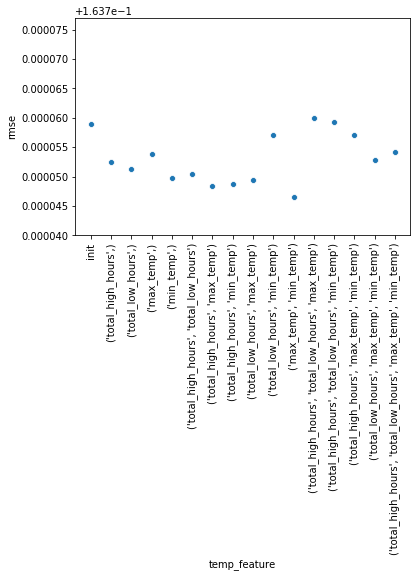

In [39]:
sns.scatterplot(x='temp_feature', y='rmse', data=temp_df)
plt.ylim(0.16374,0.163777)
plt.xticks(rotation='vertical')
plt.show()

In [24]:
def get_importance():
    params = {"objective": "regression", "boosting": "gbdt", "num_leaves": 512, 
              "learning_rate": 0.0021, 'bagging_fraction': 0.85, "reg_lambda": 0.1, 
              'reg_alpha':0.1, "metric": "rmse", 'max_depth': -1, 'min_child_weight': 30,
              'verbose': -1, 'min_split_gain':0.1, 'subsample_freq':1, 'sub_feature':  0.5}
    kf = KFold(n_splits=3)
    feature_importance_df = pd.DataFrame()
    for train_index,test_index in kf.split(features):
        train_features = features.loc[train_index]
        train_target = target.loc[train_index]

        test_features = features.loc[test_index]
        test_target = target.loc[test_index]

        d_training = lgb.Dataset(train_features, label=train_target,
                                 categorical_feature=categories_features, free_raw_data=False)
        d_test = lgb.Dataset(test_features, label=test_target,
                             categorical_feature=categories_features, free_raw_data=False)

        model = lgb.train(params, train_set=d_training, num_boost_round=1000, 
                          valid_sets=[d_training,d_test], verbose_eval=25, early_stopping_rounds=50)
        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = list(features.columns)
        fold_importance_df["importance"] = model.feature_importance()
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    return feature_importance_df

In [25]:
features = df_merge[exist_list].drop(['logerror'], axis = 1)
feature_importance = get_importance()
feature_importance.to_csv('./output/plot_csv/init_feature_importance.csv', index = False)
# feature_importance = pd.read_csv('./output/init_feature_importance.csv')

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164516	valid_1's rmse: 0.1631
[50]	training's rmse: 0.163844	valid_1's rmse: 0.163015
[75]	training's rmse: 0.163183	valid_1's rmse: 0.162936
[100]	training's rmse: 0.162568	valid_1's rmse: 0.162858
[125]	training's rmse: 0.161987	valid_1's rmse: 0.1628
[150]	training's rmse: 0.161413	valid_1's rmse: 0.162738
[175]	training's rmse: 0.160883	valid_1's rmse: 0.16269
[200]	training's rmse: 0.160375	valid_1's rmse: 0.162648
[225]	training's rmse: 0.15988	valid_1's rmse: 0.162608
[250]	training's rmse: 0.159427	valid_1's rmse: 0.162574
[275]	training's rmse: 0.158957	valid_1's rmse: 0.162544
[300]	training's rmse: 0.158518	valid_1's rmse: 0.162519
[325]	training's rmse: 0.158082	valid_1's rmse: 0.162496
[350]	training's rmse: 0.157687	valid_1's rmse: 0.162478
[375]	training's rmse: 0.157312	valid_1's rmse: 0.162453
[400]	training's rmse: 0.156911	valid_1's rmse: 0.16244
[425]	training's rmse: 0.156557	valid

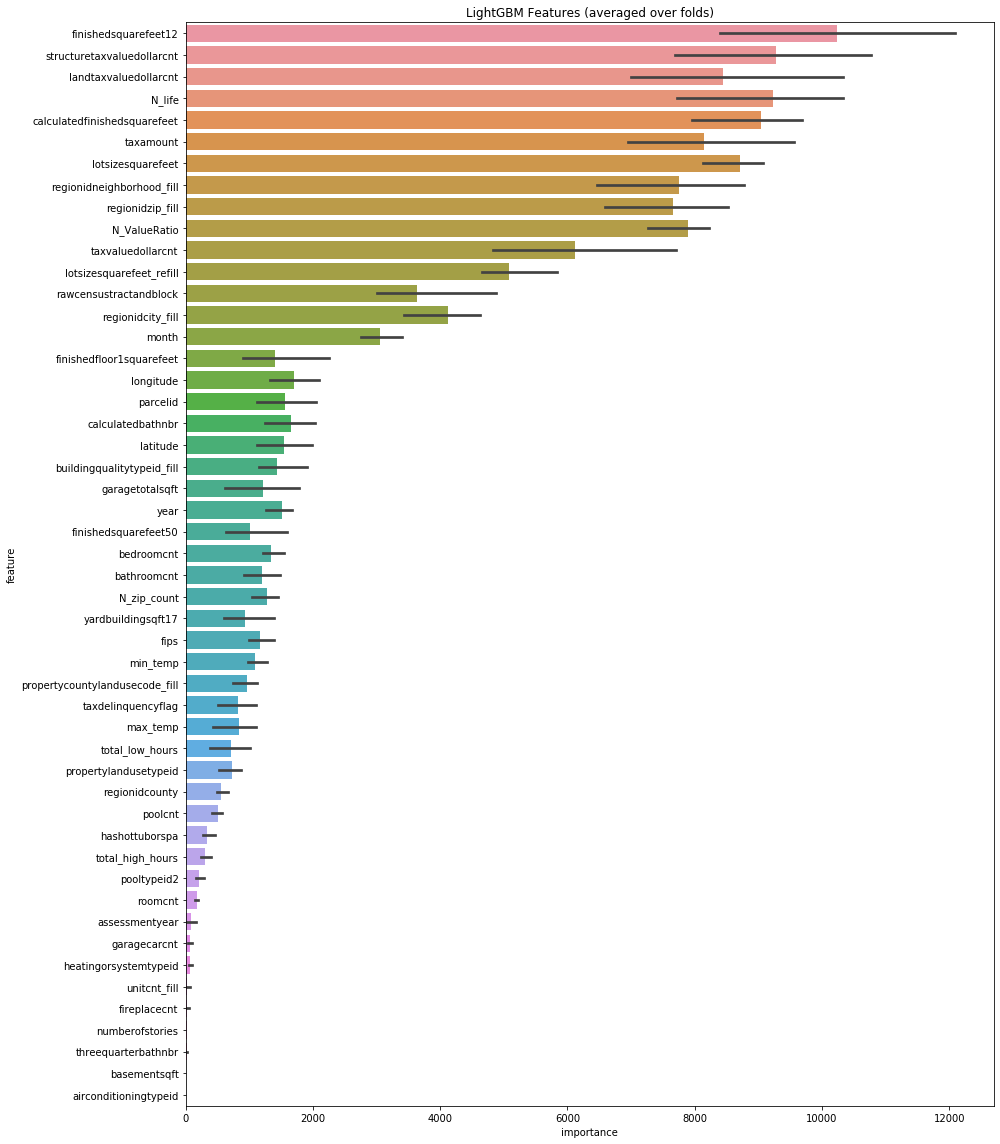

In [26]:
cols = (feature_importance[["feature", "importance"]].groupby("feature").mean()\
        .sort_values(by="importance", ascending=False).index)
best_features = feature_importance.loc[feature_importance.feature.isin(cols)]
plt.figure(figsize=(14,16))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('LightGBM Features (averaged over folds)')
plt.tight_layout()

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
import warnings
def calculate_vif(X):
    variables = list(X.columns)
    vif = {variable:variance_inflation_factor(exog=X.values, exog_idx=ix) for ix,variable in enumerate(list(X.columns))}
    return vif

mergedFilterd = features.fillna(-999)
mergedFilterd.replace([np.inf, -np.inf], -999)

vifDict = calculate_vif(mergedFilterd)

vifDf = pd.DataFrame()
vifDf['variables'] = vifDict.keys()
vifDf['vifScore'] = vifDict.values()
vifDf.sort_values(by=['vifScore'],ascending=False,inplace=True)
vifDf.to_csv('./output/plot_csv/vif.csv', index = False)

[Text(0, 0.5, 'Features'),
 Text(0.5, 0, 'VIF Scores'),
 Text(0.5, 1.0, 'Variables Which Exhibit Multicollinearity')]

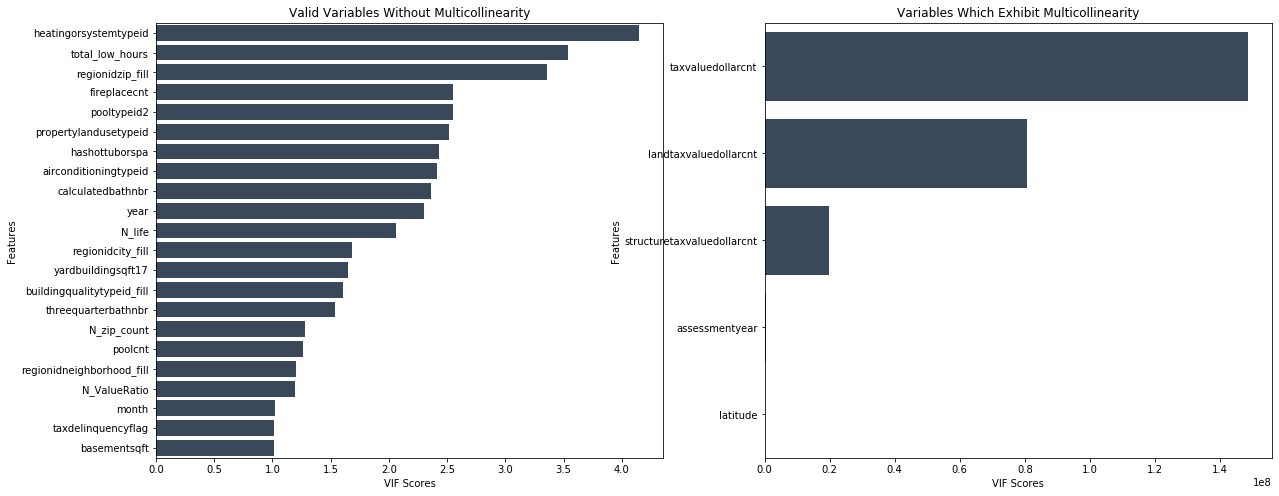

In [28]:
validVariables = vifDf[vifDf["vifScore"]<=5]
variablesWithMC  = vifDf[vifDf["vifScore"]>5]
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20,8)
sns.barplot(data=validVariables,x="vifScore",y="variables",ax=ax1,orient="h",color="#34495e")
sns.barplot(data=variablesWithMC.head(5),x="vifScore",y="variables",ax=ax2,orient="h",color="#34495e")
ax1.set(xlabel='VIF Scores', ylabel='Features',title="Valid Variables Without Multicollinearity")
ax2.set(xlabel='VIF Scores', ylabel='Features',title="Variables Which Exhibit Multicollinearity")

In [29]:
variablesWithMC  = vifDf[vifDf["vifScore"]>10]
large_VIF = list(variablesWithMC.variables)[:10]

In [44]:
feature_list = [x for x in list(features.columns) if x not in ['total_high_hours', 'total_low_hours']]
vif_dict = {'init': check_rmse(feature_list)}
for i in large_VIF:
    features_list = [x for x in feature_list if x != i]
    vif_dict[i] = check_rmse(features_list)
features_list = [x for x in feature_list if x not in ['bathroomcnt', 'assessmentyear']]
vif_dict['tax+asses'] = check_rmse(features_list)
vif_df = pd.DataFrame.from_dict(vif_dict, orient = 'index')
vif_df = vif_df.reset_index()
vif_df = vif_df.rename(columns = {'index': 'vif_feature', 0: 'rmse'})
vif_df.to_csv('./output/plot_csv/vif_delete.csv', index = False)

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164522	valid_1's rmse: 0.163091
[50]	training's rmse: 0.163862	valid_1's rmse: 0.163001
[75]	training's rmse: 0.163233	valid_1's rmse: 0.162933
[100]	training's rmse: 0.162621	valid_1's rmse: 0.162865
[125]	training's rmse: 0.162052	valid_1's rmse: 0.162803
[150]	training's rmse: 0.161502	valid_1's rmse: 0.16275
[175]	training's rmse: 0.160977	valid_1's rmse: 0.162698
[200]	training's rmse: 0.160445	valid_1's rmse: 0.162656
[225]	training's rmse: 0.159967	valid_1's rmse: 0.162615
[250]	training's rmse: 0.159482	valid_1's rmse: 0.162583
[275]	training's rmse: 0.159017	valid_1's rmse: 0.162553
[300]	training's rmse: 0.158557	valid_1's rmse: 0.162525
[325]	training's rmse: 0.158118	valid_1's rmse: 0.1625
[350]	training's rmse: 0.15768	valid_1's rmse: 0.162479
[375]	training's rmse: 0.157278	valid_1's rmse: 0.162462
[400]	training's rmse: 0.156889	valid_1's rmse: 0.162446
[425]	training's rmse: 0.156514	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167645	valid_1's rmse: 0.156577
[50]	training's rmse: 0.166968	valid_1's rmse: 0.156492
[75]	training's rmse: 0.16634	valid_1's rmse: 0.156418
[100]	training's rmse: 0.165714	valid_1's rmse: 0.15635
[125]	training's rmse: 0.165111	valid_1's rmse: 0.156287
[150]	training's rmse: 0.164545	valid_1's rmse: 0.15623
[175]	training's rmse: 0.164004	valid_1's rmse: 0.156185
[200]	training's rmse: 0.163454	valid_1's rmse: 0.156145
[225]	training's rmse: 0.162944	valid_1's rmse: 0.156111
[250]	training's rmse: 0.162466	valid_1's rmse: 0.156079
[275]	training's rmse: 0.161997	valid_1's rmse: 0.156061
[300]	training's rmse: 0.161514	valid_1's rmse: 0.15604
[325]	training's rmse: 0.161072	valid_1's rmse: 0.156023
[350]	training's rmse: 0.160633	valid_1's rmse: 0.156013
[375]	training's rmse: 0.16023	valid_1's rmse: 0.156003
[400]	training's rmse: 0.159835	valid_1's rmse: 0.156001
[425]	training's rmse: 0.15946	vali

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.15942	valid_1's rmse: 0.173342
[50]	training's rmse: 0.158939	valid_1's rmse: 0.17328
[75]	training's rmse: 0.15849	valid_1's rmse: 0.173223
[100]	training's rmse: 0.158032	valid_1's rmse: 0.173169
[125]	training's rmse: 0.157614	valid_1's rmse: 0.173125
[150]	training's rmse: 0.157205	valid_1's rmse: 0.173086
[175]	training's rmse: 0.156808	valid_1's rmse: 0.173052
[200]	training's rmse: 0.156413	valid_1's rmse: 0.17302
[225]	training's rmse: 0.156049	valid_1's rmse: 0.172994
[250]	training's rmse: 0.155701	valid_1's rmse: 0.172969
[275]	training's rmse: 0.15537	valid_1's rmse: 0.172949
[300]	training's rmse: 0.155008	valid_1's rmse: 0.172933
[325]	training's rmse: 0.154677	valid_1's rmse: 0.172922
[350]	training's rmse: 0.154341	valid_1's rmse: 0.17291
[375]	training's rmse: 0.154044	valid_1's rmse: 0.172902
[400]	training's rmse: 0.153757	valid_1's rmse: 0.172894
[425]	training's rmse: 0.153479	vali

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164536	valid_1's rmse: 0.163103
[50]	training's rmse: 0.163877	valid_1's rmse: 0.16302
[75]	training's rmse: 0.163242	valid_1's rmse: 0.162947
[100]	training's rmse: 0.162654	valid_1's rmse: 0.162874
[125]	training's rmse: 0.16208	valid_1's rmse: 0.162812
[150]	training's rmse: 0.161523	valid_1's rmse: 0.162753
[175]	training's rmse: 0.16097	valid_1's rmse: 0.162703
[200]	training's rmse: 0.16045	valid_1's rmse: 0.162663
[225]	training's rmse: 0.159957	valid_1's rmse: 0.162621
[250]	training's rmse: 0.15948	valid_1's rmse: 0.16259
[275]	training's rmse: 0.159001	valid_1's rmse: 0.162564
[300]	training's rmse: 0.158558	valid_1's rmse: 0.162532
[325]	training's rmse: 0.158131	valid_1's rmse: 0.162505
[350]	training's rmse: 0.157708	valid_1's rmse: 0.162486
[375]	training's rmse: 0.15731	valid_1's rmse: 0.162471
[400]	training's rmse: 0.156902	valid_1's rmse: 0.162459
[425]	training's rmse: 0.156517	valid

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167638	valid_1's rmse: 0.156581
[50]	training's rmse: 0.166971	valid_1's rmse: 0.156493
[75]	training's rmse: 0.166331	valid_1's rmse: 0.156412
[100]	training's rmse: 0.165742	valid_1's rmse: 0.156338
[125]	training's rmse: 0.165152	valid_1's rmse: 0.156273
[150]	training's rmse: 0.164585	valid_1's rmse: 0.156222
[175]	training's rmse: 0.16402	valid_1's rmse: 0.156174
[200]	training's rmse: 0.163493	valid_1's rmse: 0.156138
[225]	training's rmse: 0.162983	valid_1's rmse: 0.156099
[250]	training's rmse: 0.162494	valid_1's rmse: 0.156074
[275]	training's rmse: 0.161999	valid_1's rmse: 0.156056
[300]	training's rmse: 0.161545	valid_1's rmse: 0.156042
[325]	training's rmse: 0.161112	valid_1's rmse: 0.15602
[350]	training's rmse: 0.160683	valid_1's rmse: 0.156007
[375]	training's rmse: 0.160263	valid_1's rmse: 0.155995
[400]	training's rmse: 0.159836	valid_1's rmse: 0.155994
[425]	training's rmse: 0.159438	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159432	valid_1's rmse: 0.173341
[50]	training's rmse: 0.158958	valid_1's rmse: 0.173281
[75]	training's rmse: 0.15849	valid_1's rmse: 0.173223
[100]	training's rmse: 0.15804	valid_1's rmse: 0.173174
[125]	training's rmse: 0.157625	valid_1's rmse: 0.17313
[150]	training's rmse: 0.157213	valid_1's rmse: 0.173091
[175]	training's rmse: 0.156799	valid_1's rmse: 0.173054
[200]	training's rmse: 0.156428	valid_1's rmse: 0.173022
[225]	training's rmse: 0.156052	valid_1's rmse: 0.172995
[250]	training's rmse: 0.155692	valid_1's rmse: 0.172973
[275]	training's rmse: 0.155331	valid_1's rmse: 0.172953
[300]	training's rmse: 0.155005	valid_1's rmse: 0.17294
[325]	training's rmse: 0.15468	valid_1's rmse: 0.172927
[350]	training's rmse: 0.154354	valid_1's rmse: 0.17292
[375]	training's rmse: 0.154059	valid_1's rmse: 0.172913
[400]	training's rmse: 0.153752	valid_1's rmse: 0.17291
[425]	training's rmse: 0.15347	valid_

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164565	valid_1's rmse: 0.1631
[50]	training's rmse: 0.163911	valid_1's rmse: 0.163019
[75]	training's rmse: 0.163254	valid_1's rmse: 0.162941
[100]	training's rmse: 0.162649	valid_1's rmse: 0.162871
[125]	training's rmse: 0.162093	valid_1's rmse: 0.162813
[150]	training's rmse: 0.161526	valid_1's rmse: 0.162761
[175]	training's rmse: 0.161012	valid_1's rmse: 0.162713
[200]	training's rmse: 0.160484	valid_1's rmse: 0.162669
[225]	training's rmse: 0.159984	valid_1's rmse: 0.162634
[250]	training's rmse: 0.159507	valid_1's rmse: 0.162604
[275]	training's rmse: 0.159044	valid_1's rmse: 0.162572
[300]	training's rmse: 0.158606	valid_1's rmse: 0.162547
[325]	training's rmse: 0.158182	valid_1's rmse: 0.162523
[350]	training's rmse: 0.157764	valid_1's rmse: 0.162507
[375]	training's rmse: 0.157362	valid_1's rmse: 0.162495
[400]	training's rmse: 0.156978	valid_1's rmse: 0.162479
[425]	training's rmse: 0.156611	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167667	valid_1's rmse: 0.156582
[50]	training's rmse: 0.167013	valid_1's rmse: 0.156496
[75]	training's rmse: 0.166341	valid_1's rmse: 0.156417
[100]	training's rmse: 0.165732	valid_1's rmse: 0.156351
[125]	training's rmse: 0.165159	valid_1's rmse: 0.156288
[150]	training's rmse: 0.164583	valid_1's rmse: 0.156235
[175]	training's rmse: 0.164053	valid_1's rmse: 0.156187
[200]	training's rmse: 0.163532	valid_1's rmse: 0.156148
[225]	training's rmse: 0.163019	valid_1's rmse: 0.156113
[250]	training's rmse: 0.162525	valid_1's rmse: 0.156081
[275]	training's rmse: 0.162051	valid_1's rmse: 0.156058
[300]	training's rmse: 0.161601	valid_1's rmse: 0.156039
[325]	training's rmse: 0.161165	valid_1's rmse: 0.156022
[350]	training's rmse: 0.160735	valid_1's rmse: 0.156012
[375]	training's rmse: 0.160322	valid_1's rmse: 0.156001
[400]	training's rmse: 0.159928	valid_1's rmse: 0.155992
[425]	training's rmse: 0.15955

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159445	valid_1's rmse: 0.173348
[50]	training's rmse: 0.158978	valid_1's rmse: 0.173286
[75]	training's rmse: 0.158484	valid_1's rmse: 0.173231
[100]	training's rmse: 0.158036	valid_1's rmse: 0.173185
[125]	training's rmse: 0.157631	valid_1's rmse: 0.17314
[150]	training's rmse: 0.157212	valid_1's rmse: 0.173096
[175]	training's rmse: 0.15683	valid_1's rmse: 0.173066
[200]	training's rmse: 0.156455	valid_1's rmse: 0.17304
[225]	training's rmse: 0.156092	valid_1's rmse: 0.173016
[250]	training's rmse: 0.155746	valid_1's rmse: 0.172995
[275]	training's rmse: 0.155388	valid_1's rmse: 0.172977
[300]	training's rmse: 0.155071	valid_1's rmse: 0.172963
[325]	training's rmse: 0.154744	valid_1's rmse: 0.172953
[350]	training's rmse: 0.154431	valid_1's rmse: 0.172942
[375]	training's rmse: 0.154135	valid_1's rmse: 0.172936
[400]	training's rmse: 0.153841	valid_1's rmse: 0.17293
[425]	training's rmse: 0.15356	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164544	valid_1's rmse: 0.163099
[50]	training's rmse: 0.163879	valid_1's rmse: 0.163013
[75]	training's rmse: 0.163241	valid_1's rmse: 0.162932
[100]	training's rmse: 0.162643	valid_1's rmse: 0.162859
[125]	training's rmse: 0.162086	valid_1's rmse: 0.162795
[150]	training's rmse: 0.161538	valid_1's rmse: 0.162736
[175]	training's rmse: 0.160989	valid_1's rmse: 0.16268
[200]	training's rmse: 0.160468	valid_1's rmse: 0.162632
[225]	training's rmse: 0.159978	valid_1's rmse: 0.162596
[250]	training's rmse: 0.159507	valid_1's rmse: 0.162562
[275]	training's rmse: 0.159032	valid_1's rmse: 0.162536
[300]	training's rmse: 0.158599	valid_1's rmse: 0.162509
[325]	training's rmse: 0.158178	valid_1's rmse: 0.162482
[350]	training's rmse: 0.157755	valid_1's rmse: 0.162463
[375]	training's rmse: 0.157357	valid_1's rmse: 0.162442
[400]	training's rmse: 0.15696	valid_1's rmse: 0.162424
[425]	training's rmse: 0.156588	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167634	valid_1's rmse: 0.156577
[50]	training's rmse: 0.166973	valid_1's rmse: 0.156484
[75]	training's rmse: 0.166332	valid_1's rmse: 0.156399
[100]	training's rmse: 0.165736	valid_1's rmse: 0.156327
[125]	training's rmse: 0.165149	valid_1's rmse: 0.156266
[150]	training's rmse: 0.164585	valid_1's rmse: 0.156217
[175]	training's rmse: 0.164029	valid_1's rmse: 0.15617
[200]	training's rmse: 0.1635	valid_1's rmse: 0.156129
[225]	training's rmse: 0.163009	valid_1's rmse: 0.156096
[250]	training's rmse: 0.16253	valid_1's rmse: 0.156067
[275]	training's rmse: 0.162039	valid_1's rmse: 0.156046
[300]	training's rmse: 0.161596	valid_1's rmse: 0.15603
[325]	training's rmse: 0.161169	valid_1's rmse: 0.156009
[350]	training's rmse: 0.160749	valid_1's rmse: 0.156
[375]	training's rmse: 0.160334	valid_1's rmse: 0.155988
[400]	training's rmse: 0.159927	valid_1's rmse: 0.15599
[425]	training's rmse: 0.159539	valid_1

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159424	valid_1's rmse: 0.173347
[50]	training's rmse: 0.158944	valid_1's rmse: 0.173285
[75]	training's rmse: 0.158474	valid_1's rmse: 0.17323
[100]	training's rmse: 0.158034	valid_1's rmse: 0.173184
[125]	training's rmse: 0.15763	valid_1's rmse: 0.17314
[150]	training's rmse: 0.157232	valid_1's rmse: 0.173102
[175]	training's rmse: 0.156828	valid_1's rmse: 0.173071
[200]	training's rmse: 0.156459	valid_1's rmse: 0.173043
[225]	training's rmse: 0.156109	valid_1's rmse: 0.17302
[250]	training's rmse: 0.155757	valid_1's rmse: 0.173001
[275]	training's rmse: 0.155395	valid_1's rmse: 0.172982
[300]	training's rmse: 0.155083	valid_1's rmse: 0.172967
[325]	training's rmse: 0.154778	valid_1's rmse: 0.172954
[350]	training's rmse: 0.154468	valid_1's rmse: 0.172948
[375]	training's rmse: 0.154168	valid_1's rmse: 0.172943
[400]	training's rmse: 0.153873	valid_1's rmse: 0.17294
[425]	training's rmse: 0.153604	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164554	valid_1's rmse: 0.163096
[50]	training's rmse: 0.163899	valid_1's rmse: 0.163014
[75]	training's rmse: 0.163237	valid_1's rmse: 0.162935
[100]	training's rmse: 0.162624	valid_1's rmse: 0.162863
[125]	training's rmse: 0.162061	valid_1's rmse: 0.162805
[150]	training's rmse: 0.161501	valid_1's rmse: 0.16275
[175]	training's rmse: 0.160993	valid_1's rmse: 0.162699
[200]	training's rmse: 0.160458	valid_1's rmse: 0.162655
[225]	training's rmse: 0.159929	valid_1's rmse: 0.162616
[250]	training's rmse: 0.159434	valid_1's rmse: 0.162582
[275]	training's rmse: 0.158961	valid_1's rmse: 0.16255
[300]	training's rmse: 0.158522	valid_1's rmse: 0.162525
[325]	training's rmse: 0.158089	valid_1's rmse: 0.162503
[350]	training's rmse: 0.157668	valid_1's rmse: 0.162486
[375]	training's rmse: 0.157257	valid_1's rmse: 0.162468
[400]	training's rmse: 0.156865	valid_1's rmse: 0.162451
[425]	training's rmse: 0.15649	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167664	valid_1's rmse: 0.156584
[50]	training's rmse: 0.167021	valid_1's rmse: 0.156492
[75]	training's rmse: 0.166344	valid_1's rmse: 0.156409
[100]	training's rmse: 0.165727	valid_1's rmse: 0.156345
[125]	training's rmse: 0.165134	valid_1's rmse: 0.156284
[150]	training's rmse: 0.164551	valid_1's rmse: 0.156233
[175]	training's rmse: 0.164021	valid_1's rmse: 0.156183
[200]	training's rmse: 0.163481	valid_1's rmse: 0.156142
[225]	training's rmse: 0.162951	valid_1's rmse: 0.156112
[250]	training's rmse: 0.162458	valid_1's rmse: 0.15608
[275]	training's rmse: 0.161979	valid_1's rmse: 0.156053
[300]	training's rmse: 0.161534	valid_1's rmse: 0.156034
[325]	training's rmse: 0.161095	valid_1's rmse: 0.156017
[350]	training's rmse: 0.160662	valid_1's rmse: 0.156007
[375]	training's rmse: 0.160241	valid_1's rmse: 0.155998
[400]	training's rmse: 0.159846	valid_1's rmse: 0.155993
[425]	training's rmse: 0.159465

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159439	valid_1's rmse: 0.173341
[50]	training's rmse: 0.158968	valid_1's rmse: 0.173286
[75]	training's rmse: 0.158476	valid_1's rmse: 0.173228
[100]	training's rmse: 0.158023	valid_1's rmse: 0.173176
[125]	training's rmse: 0.157614	valid_1's rmse: 0.173133
[150]	training's rmse: 0.157195	valid_1's rmse: 0.173088
[175]	training's rmse: 0.156802	valid_1's rmse: 0.173054
[200]	training's rmse: 0.156406	valid_1's rmse: 0.173023
[225]	training's rmse: 0.156028	valid_1's rmse: 0.172996
[250]	training's rmse: 0.155673	valid_1's rmse: 0.172975
[275]	training's rmse: 0.155306	valid_1's rmse: 0.172958
[300]	training's rmse: 0.154983	valid_1's rmse: 0.172941
[325]	training's rmse: 0.154657	valid_1's rmse: 0.17293
[350]	training's rmse: 0.154338	valid_1's rmse: 0.17292
[375]	training's rmse: 0.15403	valid_1's rmse: 0.172914
[400]	training's rmse: 0.153739	valid_1's rmse: 0.172911
[425]	training's rmse: 0.153451	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164556	valid_1's rmse: 0.163097
[50]	training's rmse: 0.163898	valid_1's rmse: 0.163014
[75]	training's rmse: 0.163229	valid_1's rmse: 0.162935
[100]	training's rmse: 0.162616	valid_1's rmse: 0.162865
[125]	training's rmse: 0.162058	valid_1's rmse: 0.162805
[150]	training's rmse: 0.161485	valid_1's rmse: 0.162756
[175]	training's rmse: 0.16096	valid_1's rmse: 0.162704
[200]	training's rmse: 0.160431	valid_1's rmse: 0.162662
[225]	training's rmse: 0.15992	valid_1's rmse: 0.162622
[250]	training's rmse: 0.15944	valid_1's rmse: 0.162589
[275]	training's rmse: 0.158971	valid_1's rmse: 0.162556
[300]	training's rmse: 0.158531	valid_1's rmse: 0.162532
[325]	training's rmse: 0.158108	valid_1's rmse: 0.162503
[350]	training's rmse: 0.157685	valid_1's rmse: 0.162487
[375]	training's rmse: 0.157275	valid_1's rmse: 0.16247
[400]	training's rmse: 0.156888	valid_1's rmse: 0.162455
[425]	training's rmse: 0.156509	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167665	valid_1's rmse: 0.15658
[50]	training's rmse: 0.167004	valid_1's rmse: 0.15649
[75]	training's rmse: 0.166321	valid_1's rmse: 0.156409
[100]	training's rmse: 0.165717	valid_1's rmse: 0.156344
[125]	training's rmse: 0.165142	valid_1's rmse: 0.156279
[150]	training's rmse: 0.16456	valid_1's rmse: 0.156225
[175]	training's rmse: 0.164027	valid_1's rmse: 0.156176
[200]	training's rmse: 0.1635	valid_1's rmse: 0.156137
[225]	training's rmse: 0.162976	valid_1's rmse: 0.156105
[250]	training's rmse: 0.162483	valid_1's rmse: 0.156074
[275]	training's rmse: 0.162012	valid_1's rmse: 0.156052
[300]	training's rmse: 0.161567	valid_1's rmse: 0.156032
[325]	training's rmse: 0.161126	valid_1's rmse: 0.156015
[350]	training's rmse: 0.160694	valid_1's rmse: 0.156007
[375]	training's rmse: 0.160276	valid_1's rmse: 0.155996
[400]	training's rmse: 0.159878	valid_1's rmse: 0.155988
[425]	training's rmse: 0.159503	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159437	valid_1's rmse: 0.173346
[50]	training's rmse: 0.158964	valid_1's rmse: 0.173286
[75]	training's rmse: 0.158467	valid_1's rmse: 0.173227
[100]	training's rmse: 0.158014	valid_1's rmse: 0.173179
[125]	training's rmse: 0.157609	valid_1's rmse: 0.173134
[150]	training's rmse: 0.157182	valid_1's rmse: 0.173091
[175]	training's rmse: 0.156788	valid_1's rmse: 0.17306
[200]	training's rmse: 0.156401	valid_1's rmse: 0.173035
[225]	training's rmse: 0.156034	valid_1's rmse: 0.17301
[250]	training's rmse: 0.155687	valid_1's rmse: 0.172992
[275]	training's rmse: 0.155323	valid_1's rmse: 0.172977
[300]	training's rmse: 0.155006	valid_1's rmse: 0.172963
[325]	training's rmse: 0.154675	valid_1's rmse: 0.172951
[350]	training's rmse: 0.154361	valid_1's rmse: 0.172941
[375]	training's rmse: 0.154052	valid_1's rmse: 0.172932
[400]	training's rmse: 0.153754	valid_1's rmse: 0.172925
[425]	training's rmse: 0.153467	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164558	valid_1's rmse: 0.163099
[50]	training's rmse: 0.163902	valid_1's rmse: 0.16302
[75]	training's rmse: 0.163235	valid_1's rmse: 0.162941
[100]	training's rmse: 0.162616	valid_1's rmse: 0.162869
[125]	training's rmse: 0.162058	valid_1's rmse: 0.162812
[150]	training's rmse: 0.161481	valid_1's rmse: 0.162763
[175]	training's rmse: 0.160956	valid_1's rmse: 0.162716
[200]	training's rmse: 0.160432	valid_1's rmse: 0.162672
[225]	training's rmse: 0.15992	valid_1's rmse: 0.162636
[250]	training's rmse: 0.159442	valid_1's rmse: 0.162605
[275]	training's rmse: 0.158978	valid_1's rmse: 0.162571
[300]	training's rmse: 0.15854	valid_1's rmse: 0.162545
[325]	training's rmse: 0.158111	valid_1's rmse: 0.162518
[350]	training's rmse: 0.157685	valid_1's rmse: 0.162502
[375]	training's rmse: 0.157271	valid_1's rmse: 0.162486
[400]	training's rmse: 0.156879	valid_1's rmse: 0.162466
[425]	training's rmse: 0.156498	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167662	valid_1's rmse: 0.156579
[50]	training's rmse: 0.167003	valid_1's rmse: 0.156493
[75]	training's rmse: 0.166321	valid_1's rmse: 0.156416
[100]	training's rmse: 0.165717	valid_1's rmse: 0.15635
[125]	training's rmse: 0.165137	valid_1's rmse: 0.156285
[150]	training's rmse: 0.164553	valid_1's rmse: 0.15623
[175]	training's rmse: 0.164018	valid_1's rmse: 0.156181
[200]	training's rmse: 0.163488	valid_1's rmse: 0.156143
[225]	training's rmse: 0.162967	valid_1's rmse: 0.156109
[250]	training's rmse: 0.162469	valid_1's rmse: 0.156075
[275]	training's rmse: 0.161993	valid_1's rmse: 0.156053
[300]	training's rmse: 0.161541	valid_1's rmse: 0.15603
[325]	training's rmse: 0.161098	valid_1's rmse: 0.156015
[350]	training's rmse: 0.160667	valid_1's rmse: 0.156005
[375]	training's rmse: 0.160251	valid_1's rmse: 0.155992
[400]	training's rmse: 0.15985	valid_1's rmse: 0.155982
[425]	training's rmse: 0.159471	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159438	valid_1's rmse: 0.173346
[50]	training's rmse: 0.158966	valid_1's rmse: 0.173286
[75]	training's rmse: 0.158468	valid_1's rmse: 0.17323
[100]	training's rmse: 0.158016	valid_1's rmse: 0.173181
[125]	training's rmse: 0.157612	valid_1's rmse: 0.173137
[150]	training's rmse: 0.157181	valid_1's rmse: 0.173089
[175]	training's rmse: 0.156793	valid_1's rmse: 0.173057
[200]	training's rmse: 0.156408	valid_1's rmse: 0.17303
[225]	training's rmse: 0.156043	valid_1's rmse: 0.173004
[250]	training's rmse: 0.155697	valid_1's rmse: 0.172982
[275]	training's rmse: 0.155331	valid_1's rmse: 0.172966
[300]	training's rmse: 0.155013	valid_1's rmse: 0.172951
[325]	training's rmse: 0.154685	valid_1's rmse: 0.172937
[350]	training's rmse: 0.154367	valid_1's rmse: 0.172926
[375]	training's rmse: 0.15406	valid_1's rmse: 0.172916
[400]	training's rmse: 0.15376	valid_1's rmse: 0.172909
[425]	training's rmse: 0.153473	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164556	valid_1's rmse: 0.163094
[50]	training's rmse: 0.163906	valid_1's rmse: 0.163014
[75]	training's rmse: 0.163248	valid_1's rmse: 0.162936
[100]	training's rmse: 0.162641	valid_1's rmse: 0.162864
[125]	training's rmse: 0.162081	valid_1's rmse: 0.162808
[150]	training's rmse: 0.161523	valid_1's rmse: 0.162748
[175]	training's rmse: 0.16102	valid_1's rmse: 0.1627
[200]	training's rmse: 0.160489	valid_1's rmse: 0.162653
[225]	training's rmse: 0.159965	valid_1's rmse: 0.162614
[250]	training's rmse: 0.15947	valid_1's rmse: 0.162578
[275]	training's rmse: 0.158992	valid_1's rmse: 0.162545
[300]	training's rmse: 0.158556	valid_1's rmse: 0.162523
[325]	training's rmse: 0.158126	valid_1's rmse: 0.162497
[350]	training's rmse: 0.157705	valid_1's rmse: 0.16248
[375]	training's rmse: 0.157292	valid_1's rmse: 0.162461
[400]	training's rmse: 0.156901	valid_1's rmse: 0.162446
[425]	training's rmse: 0.156524	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167664	valid_1's rmse: 0.156581
[50]	training's rmse: 0.167017	valid_1's rmse: 0.15649
[75]	training's rmse: 0.166343	valid_1's rmse: 0.156409
[100]	training's rmse: 0.165721	valid_1's rmse: 0.156346
[125]	training's rmse: 0.165139	valid_1's rmse: 0.156285
[150]	training's rmse: 0.164552	valid_1's rmse: 0.156233
[175]	training's rmse: 0.164019	valid_1's rmse: 0.156185
[200]	training's rmse: 0.163474	valid_1's rmse: 0.156141
[225]	training's rmse: 0.162946	valid_1's rmse: 0.156112
[250]	training's rmse: 0.162452	valid_1's rmse: 0.156082
[275]	training's rmse: 0.161974	valid_1's rmse: 0.156055
[300]	training's rmse: 0.161531	valid_1's rmse: 0.156038
[325]	training's rmse: 0.161095	valid_1's rmse: 0.156023
[350]	training's rmse: 0.160664	valid_1's rmse: 0.156011
[375]	training's rmse: 0.160241	valid_1's rmse: 0.155999
[400]	training's rmse: 0.15985	valid_1's rmse: 0.155989
[425]	training's rmse: 0.159475	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159441	valid_1's rmse: 0.173342
[50]	training's rmse: 0.158971	valid_1's rmse: 0.173287
[75]	training's rmse: 0.158478	valid_1's rmse: 0.173229
[100]	training's rmse: 0.158027	valid_1's rmse: 0.173178
[125]	training's rmse: 0.157617	valid_1's rmse: 0.173133
[150]	training's rmse: 0.157201	valid_1's rmse: 0.173088
[175]	training's rmse: 0.156812	valid_1's rmse: 0.173052
[200]	training's rmse: 0.156415	valid_1's rmse: 0.173021
[225]	training's rmse: 0.156041	valid_1's rmse: 0.172996
[250]	training's rmse: 0.155684	valid_1's rmse: 0.172973
[275]	training's rmse: 0.155318	valid_1's rmse: 0.172958
[300]	training's rmse: 0.154997	valid_1's rmse: 0.172943
[325]	training's rmse: 0.154672	valid_1's rmse: 0.17293
[350]	training's rmse: 0.154356	valid_1's rmse: 0.172919
[375]	training's rmse: 0.154049	valid_1's rmse: 0.17291
[400]	training's rmse: 0.153751	valid_1's rmse: 0.172906
[425]	training's rmse: 0.153466	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164558	valid_1's rmse: 0.163096
[50]	training's rmse: 0.163902	valid_1's rmse: 0.163019
[75]	training's rmse: 0.163244	valid_1's rmse: 0.162939
[100]	training's rmse: 0.162629	valid_1's rmse: 0.16287
[125]	training's rmse: 0.162068	valid_1's rmse: 0.162814
[150]	training's rmse: 0.16151	valid_1's rmse: 0.162759
[175]	training's rmse: 0.161	valid_1's rmse: 0.162711
[200]	training's rmse: 0.160463	valid_1's rmse: 0.162665
[225]	training's rmse: 0.159942	valid_1's rmse: 0.162625
[250]	training's rmse: 0.159452	valid_1's rmse: 0.162594
[275]	training's rmse: 0.158982	valid_1's rmse: 0.162563
[300]	training's rmse: 0.158545	valid_1's rmse: 0.16254
[325]	training's rmse: 0.158113	valid_1's rmse: 0.162515
[350]	training's rmse: 0.157695	valid_1's rmse: 0.1625
[375]	training's rmse: 0.157278	valid_1's rmse: 0.162479
[400]	training's rmse: 0.156886	valid_1's rmse: 0.162463
[425]	training's rmse: 0.15651	valid_1

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167665	valid_1's rmse: 0.156583
[50]	training's rmse: 0.167015	valid_1's rmse: 0.156492
[75]	training's rmse: 0.166344	valid_1's rmse: 0.156408
[100]	training's rmse: 0.165723	valid_1's rmse: 0.15634
[125]	training's rmse: 0.165142	valid_1's rmse: 0.15628
[150]	training's rmse: 0.164561	valid_1's rmse: 0.156231
[175]	training's rmse: 0.164028	valid_1's rmse: 0.156181
[200]	training's rmse: 0.163494	valid_1's rmse: 0.156137
[225]	training's rmse: 0.162967	valid_1's rmse: 0.156105
[250]	training's rmse: 0.16247	valid_1's rmse: 0.156077
[275]	training's rmse: 0.161992	valid_1's rmse: 0.15605
[300]	training's rmse: 0.161552	valid_1's rmse: 0.156029
[325]	training's rmse: 0.161116	valid_1's rmse: 0.156011
[350]	training's rmse: 0.160684	valid_1's rmse: 0.155999
[375]	training's rmse: 0.160263	valid_1's rmse: 0.155988
[400]	training's rmse: 0.159865	valid_1's rmse: 0.155979
[425]	training's rmse: 0.159491	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159442	valid_1's rmse: 0.173345
[50]	training's rmse: 0.158976	valid_1's rmse: 0.173289
[75]	training's rmse: 0.158487	valid_1's rmse: 0.173234
[100]	training's rmse: 0.158036	valid_1's rmse: 0.173185
[125]	training's rmse: 0.157627	valid_1's rmse: 0.173142
[150]	training's rmse: 0.157217	valid_1's rmse: 0.173099
[175]	training's rmse: 0.156825	valid_1's rmse: 0.173064
[200]	training's rmse: 0.156427	valid_1's rmse: 0.173034
[225]	training's rmse: 0.156049	valid_1's rmse: 0.17301
[250]	training's rmse: 0.155692	valid_1's rmse: 0.17299
[275]	training's rmse: 0.155323	valid_1's rmse: 0.172978
[300]	training's rmse: 0.155002	valid_1's rmse: 0.172963
[325]	training's rmse: 0.154678	valid_1's rmse: 0.172953
[350]	training's rmse: 0.154362	valid_1's rmse: 0.172943
[375]	training's rmse: 0.154057	valid_1's rmse: 0.172938
[400]	training's rmse: 0.153763	valid_1's rmse: 0.172931
[425]	training's rmse: 0.15348	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164534	valid_1's rmse: 0.163099
[50]	training's rmse: 0.163859	valid_1's rmse: 0.163018
[75]	training's rmse: 0.163209	valid_1's rmse: 0.16294
[100]	training's rmse: 0.162602	valid_1's rmse: 0.162868
[125]	training's rmse: 0.162015	valid_1's rmse: 0.162805
[150]	training's rmse: 0.161451	valid_1's rmse: 0.162745
[175]	training's rmse: 0.160885	valid_1's rmse: 0.162689
[200]	training's rmse: 0.160357	valid_1's rmse: 0.162642
[225]	training's rmse: 0.159853	valid_1's rmse: 0.1626
[250]	training's rmse: 0.159363	valid_1's rmse: 0.162569
[275]	training's rmse: 0.158873	valid_1's rmse: 0.162541
[300]	training's rmse: 0.158434	valid_1's rmse: 0.162513
[325]	training's rmse: 0.158005	valid_1's rmse: 0.162485
[350]	training's rmse: 0.157578	valid_1's rmse: 0.162467
[375]	training's rmse: 0.157165	valid_1's rmse: 0.162452
[400]	training's rmse: 0.156758	valid_1's rmse: 0.162436
[425]	training's rmse: 0.156373	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167623	valid_1's rmse: 0.15658
[50]	training's rmse: 0.166948	valid_1's rmse: 0.156487
[75]	training's rmse: 0.166297	valid_1's rmse: 0.156404
[100]	training's rmse: 0.16569	valid_1's rmse: 0.156335
[125]	training's rmse: 0.165084	valid_1's rmse: 0.156272
[150]	training's rmse: 0.164508	valid_1's rmse: 0.156223
[175]	training's rmse: 0.163933	valid_1's rmse: 0.156176
[200]	training's rmse: 0.163392	valid_1's rmse: 0.156137
[225]	training's rmse: 0.162889	valid_1's rmse: 0.156101
[250]	training's rmse: 0.162395	valid_1's rmse: 0.156073
[275]	training's rmse: 0.161894	valid_1's rmse: 0.15605
[300]	training's rmse: 0.161443	valid_1's rmse: 0.156036
[325]	training's rmse: 0.161005	valid_1's rmse: 0.156015
[350]	training's rmse: 0.160581	valid_1's rmse: 0.156005
[375]	training's rmse: 0.160156	valid_1's rmse: 0.155996
[400]	training's rmse: 0.159736	valid_1's rmse: 0.155998
[425]	training's rmse: 0.159342	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159417	valid_1's rmse: 0.173344
[50]	training's rmse: 0.158926	valid_1's rmse: 0.173278
[75]	training's rmse: 0.158444	valid_1's rmse: 0.173224
[100]	training's rmse: 0.157992	valid_1's rmse: 0.173179
[125]	training's rmse: 0.157569	valid_1's rmse: 0.173133
[150]	training's rmse: 0.157144	valid_1's rmse: 0.173091
[175]	training's rmse: 0.156724	valid_1's rmse: 0.173056
[200]	training's rmse: 0.156342	valid_1's rmse: 0.173025
[225]	training's rmse: 0.155977	valid_1's rmse: 0.173
[250]	training's rmse: 0.155615	valid_1's rmse: 0.172978
[275]	training's rmse: 0.155244	valid_1's rmse: 0.172958
[300]	training's rmse: 0.15492	valid_1's rmse: 0.172943
[325]	training's rmse: 0.154599	valid_1's rmse: 0.172927
[350]	training's rmse: 0.154278	valid_1's rmse: 0.172917
[375]	training's rmse: 0.153967	valid_1's rmse: 0.172912
[400]	training's rmse: 0.153655	valid_1's rmse: 0.172908
[425]	training's rmse: 0.15337	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.16453	valid_1's rmse: 0.163105
[50]	training's rmse: 0.163861	valid_1's rmse: 0.163016
[75]	training's rmse: 0.163223	valid_1's rmse: 0.162943
[100]	training's rmse: 0.162626	valid_1's rmse: 0.162869
[125]	training's rmse: 0.162043	valid_1's rmse: 0.162806
[150]	training's rmse: 0.161479	valid_1's rmse: 0.162747
[175]	training's rmse: 0.160914	valid_1's rmse: 0.162693
[200]	training's rmse: 0.160387	valid_1's rmse: 0.162647
[225]	training's rmse: 0.15989	valid_1's rmse: 0.162604
[250]	training's rmse: 0.159411	valid_1's rmse: 0.162575
[275]	training's rmse: 0.158922	valid_1's rmse: 0.162548
[300]	training's rmse: 0.158468	valid_1's rmse: 0.162516
[325]	training's rmse: 0.158044	valid_1's rmse: 0.162487
[350]	training's rmse: 0.15761	valid_1's rmse: 0.162466
[375]	training's rmse: 0.157211	valid_1's rmse: 0.162448
[400]	training's rmse: 0.156802	valid_1's rmse: 0.162438
[425]	training's rmse: 0.156417	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167627	valid_1's rmse: 0.156578
[50]	training's rmse: 0.166953	valid_1's rmse: 0.156491
[75]	training's rmse: 0.166309	valid_1's rmse: 0.156409
[100]	training's rmse: 0.165711	valid_1's rmse: 0.156337
[125]	training's rmse: 0.16511	valid_1's rmse: 0.156267
[150]	training's rmse: 0.164536	valid_1's rmse: 0.156215
[175]	training's rmse: 0.163964	valid_1's rmse: 0.156169
[200]	training's rmse: 0.163431	valid_1's rmse: 0.156131
[225]	training's rmse: 0.162922	valid_1's rmse: 0.156098
[250]	training's rmse: 0.162428	valid_1's rmse: 0.156069
[275]	training's rmse: 0.161929	valid_1's rmse: 0.156049
[300]	training's rmse: 0.161468	valid_1's rmse: 0.156034
[325]	training's rmse: 0.161027	valid_1's rmse: 0.156014
[350]	training's rmse: 0.16059	valid_1's rmse: 0.156002
[375]	training's rmse: 0.160169	valid_1's rmse: 0.155989
[400]	training's rmse: 0.159741	valid_1's rmse: 0.155991
[425]	training's rmse: 0.15934	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.15942	valid_1's rmse: 0.173341
[50]	training's rmse: 0.158935	valid_1's rmse: 0.17328
[75]	training's rmse: 0.158465	valid_1's rmse: 0.173224
[100]	training's rmse: 0.158011	valid_1's rmse: 0.173172
[125]	training's rmse: 0.157593	valid_1's rmse: 0.173127
[150]	training's rmse: 0.157171	valid_1's rmse: 0.173085
[175]	training's rmse: 0.156745	valid_1's rmse: 0.17305
[200]	training's rmse: 0.156369	valid_1's rmse: 0.17302
[225]	training's rmse: 0.155995	valid_1's rmse: 0.172997
[250]	training's rmse: 0.155635	valid_1's rmse: 0.172976
[275]	training's rmse: 0.155266	valid_1's rmse: 0.172957
[300]	training's rmse: 0.15494	valid_1's rmse: 0.172943
[325]	training's rmse: 0.154613	valid_1's rmse: 0.172929
[350]	training's rmse: 0.154282	valid_1's rmse: 0.17292
[375]	training's rmse: 0.153978	valid_1's rmse: 0.172913
[400]	training's rmse: 0.153663	valid_1's rmse: 0.172907
[425]	training's rmse: 0.153377	vali

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164558	valid_1's rmse: 0.163106
[50]	training's rmse: 0.163922	valid_1's rmse: 0.16302
[75]	training's rmse: 0.163288	valid_1's rmse: 0.162946
[100]	training's rmse: 0.162706	valid_1's rmse: 0.162872
[125]	training's rmse: 0.162115	valid_1's rmse: 0.162807
[150]	training's rmse: 0.161586	valid_1's rmse: 0.162752
[175]	training's rmse: 0.161069	valid_1's rmse: 0.162701
[200]	training's rmse: 0.160552	valid_1's rmse: 0.162651
[225]	training's rmse: 0.160051	valid_1's rmse: 0.162615
[250]	training's rmse: 0.159567	valid_1's rmse: 0.16258
[275]	training's rmse: 0.159095	valid_1's rmse: 0.162549
[300]	training's rmse: 0.158651	valid_1's rmse: 0.162521
[325]	training's rmse: 0.158252	valid_1's rmse: 0.162498
[350]	training's rmse: 0.157855	valid_1's rmse: 0.162476
[375]	training's rmse: 0.157455	valid_1's rmse: 0.162459
[400]	training's rmse: 0.157083	valid_1's rmse: 0.162443
[425]	training's rmse: 0.156721	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167676	valid_1's rmse: 0.156577
[50]	training's rmse: 0.167027	valid_1's rmse: 0.156489
[75]	training's rmse: 0.16639	valid_1's rmse: 0.156411
[100]	training's rmse: 0.1658	valid_1's rmse: 0.156344
[125]	training's rmse: 0.165205	valid_1's rmse: 0.15628
[150]	training's rmse: 0.164678	valid_1's rmse: 0.156228
[175]	training's rmse: 0.164141	valid_1's rmse: 0.156178
[200]	training's rmse: 0.163622	valid_1's rmse: 0.15614
[225]	training's rmse: 0.163103	valid_1's rmse: 0.156113
[250]	training's rmse: 0.162615	valid_1's rmse: 0.156086
[275]	training's rmse: 0.16213	valid_1's rmse: 0.156066
[300]	training's rmse: 0.161676	valid_1's rmse: 0.156045
[325]	training's rmse: 0.161269	valid_1's rmse: 0.156028
[350]	training's rmse: 0.160863	valid_1's rmse: 0.156013
[375]	training's rmse: 0.160447	valid_1's rmse: 0.156003
[400]	training's rmse: 0.160059	valid_1's rmse: 0.155994
[425]	training's rmse: 0.15969	valid

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159453	valid_1's rmse: 0.173345
[50]	training's rmse: 0.158994	valid_1's rmse: 0.173282
[75]	training's rmse: 0.158532	valid_1's rmse: 0.173224
[100]	training's rmse: 0.1581	valid_1's rmse: 0.173176
[125]	training's rmse: 0.157668	valid_1's rmse: 0.173131
[150]	training's rmse: 0.157278	valid_1's rmse: 0.173094
[175]	training's rmse: 0.156891	valid_1's rmse: 0.173058
[200]	training's rmse: 0.156504	valid_1's rmse: 0.173027
[225]	training's rmse: 0.156143	valid_1's rmse: 0.173002
[250]	training's rmse: 0.15579	valid_1's rmse: 0.172978
[275]	training's rmse: 0.155435	valid_1's rmse: 0.17296
[300]	training's rmse: 0.155101	valid_1's rmse: 0.172945
[325]	training's rmse: 0.154806	valid_1's rmse: 0.172929
[350]	training's rmse: 0.154515	valid_1's rmse: 0.172916
[375]	training's rmse: 0.154203	valid_1's rmse: 0.172908
[400]	training's rmse: 0.153927	valid_1's rmse: 0.172898
[425]	training's rmse: 0.153654	va

In [47]:
features_list = [x for x in feature_list if x not in ['bathroomcnt', 'assessmentyear']]
vif_dict['bath+asses'] = check_rmse(features_list)

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164504	valid_1's rmse: 0.163095
[50]	training's rmse: 0.163848	valid_1's rmse: 0.163005
[75]	training's rmse: 0.163209	valid_1's rmse: 0.162926
[100]	training's rmse: 0.162599	valid_1's rmse: 0.162857
[125]	training's rmse: 0.161999	valid_1's rmse: 0.16279
[150]	training's rmse: 0.16145	valid_1's rmse: 0.162729
[175]	training's rmse: 0.160929	valid_1's rmse: 0.162682
[200]	training's rmse: 0.160403	valid_1's rmse: 0.162641
[225]	training's rmse: 0.159894	valid_1's rmse: 0.162603
[250]	training's rmse: 0.159419	valid_1's rmse: 0.162565
[275]	training's rmse: 0.158985	valid_1's rmse: 0.162534
[300]	training's rmse: 0.158545	valid_1's rmse: 0.162509
[325]	training's rmse: 0.158115	valid_1's rmse: 0.16248
[350]	training's rmse: 0.157685	valid_1's rmse: 0.162456
[375]	training's rmse: 0.157312	valid_1's rmse: 0.162441
[400]	training's rmse: 0.156925	valid_1's rmse: 0.162422
[425]	training's rmse: 0.156553	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167602	valid_1's rmse: 0.156574
[50]	training's rmse: 0.166933	valid_1's rmse: 0.156495
[75]	training's rmse: 0.166297	valid_1's rmse: 0.156418
[100]	training's rmse: 0.165689	valid_1's rmse: 0.156348
[125]	training's rmse: 0.165075	valid_1's rmse: 0.156282
[150]	training's rmse: 0.164519	valid_1's rmse: 0.156228
[175]	training's rmse: 0.163992	valid_1's rmse: 0.156177
[200]	training's rmse: 0.16346	valid_1's rmse: 0.156139
[225]	training's rmse: 0.162931	valid_1's rmse: 0.156107
[250]	training's rmse: 0.162461	valid_1's rmse: 0.15608
[275]	training's rmse: 0.162007	valid_1's rmse: 0.156057
[300]	training's rmse: 0.16157	valid_1's rmse: 0.156039
[325]	training's rmse: 0.161132	valid_1's rmse: 0.156024
[350]	training's rmse: 0.160698	valid_1's rmse: 0.15601
[375]	training's rmse: 0.160311	valid_1's rmse: 0.156
[400]	training's rmse: 0.15993	valid_1's rmse: 0.155995
[425]	training's rmse: 0.159557	valid_

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159397	valid_1's rmse: 0.173341
[50]	training's rmse: 0.158925	valid_1's rmse: 0.17328
[75]	training's rmse: 0.158453	valid_1's rmse: 0.173223
[100]	training's rmse: 0.158004	valid_1's rmse: 0.173175
[125]	training's rmse: 0.157576	valid_1's rmse: 0.17313
[150]	training's rmse: 0.157165	valid_1's rmse: 0.17309
[175]	training's rmse: 0.156782	valid_1's rmse: 0.173059
[200]	training's rmse: 0.156396	valid_1's rmse: 0.173029
[225]	training's rmse: 0.15602	valid_1's rmse: 0.173002
[250]	training's rmse: 0.15566	valid_1's rmse: 0.172976
[275]	training's rmse: 0.155339	valid_1's rmse: 0.172955
[300]	training's rmse: 0.15501	valid_1's rmse: 0.172939
[325]	training's rmse: 0.154693	valid_1's rmse: 0.172923
[350]	training's rmse: 0.154376	valid_1's rmse: 0.172908
[375]	training's rmse: 0.1541	valid_1's rmse: 0.1729
[400]	training's rmse: 0.153818	valid_1's rmse: 0.17289
[425]	training's rmse: 0.153541	valid_1's

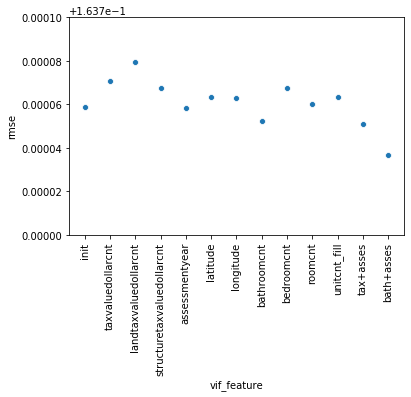

In [49]:
vif_df = pd.DataFrame.from_dict(vif_dict, orient = 'index')
vif_df = vif_df.reset_index()
vif_df = vif_df.rename(columns = {'index': 'vif_feature', 0: 'rmse'})
vif_df.to_csv('./output/plot_csv/vif_delete.csv', index = False)
sns.scatterplot(x='vif_feature', y='rmse', data=vif_df)
plt.ylim(0.1637,0.1638)
plt.xticks(rotation='vertical')
plt.show()

In [50]:
vif_df

,vif_feature,rmse
0,init,0.163759
1,taxvaluedollarcnt,0.163771
2,landtaxvaluedollarcnt,0.163780
3,structuretaxvaluedollarcnt,0.163767
4,assessmentyear,0.163758
5,latitude,0.163764
6,longitude,0.163763
7,bathroomcnt,0.163753
8,bedroomcnt,0.163768
9,roomcnt,0.163760


In [64]:
imp_list = best_features.groupby('feature').mean().reset_index().sort_values('importance').feature.to_list()
feature_list = features_list
imp_dict = {'init': check_rmse(feature_list)}
del_feature = [x for x in imp_list[:15] if x in feature_list][:10]
for i in del_feature:
    features_list = [x for x in feature_list if x != i]
    imp_dict[i] = check_rmse(features_list)


/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164504	valid_1's rmse: 0.163095
[50]	training's rmse: 0.163848	valid_1's rmse: 0.163005
[75]	training's rmse: 0.163209	valid_1's rmse: 0.162926
[100]	training's rmse: 0.162599	valid_1's rmse: 0.162857
[125]	training's rmse: 0.161999	valid_1's rmse: 0.16279
[150]	training's rmse: 0.16145	valid_1's rmse: 0.162729
[175]	training's rmse: 0.160929	valid_1's rmse: 0.162682
[200]	training's rmse: 0.160403	valid_1's rmse: 0.162641
[225]	training's rmse: 0.159894	valid_1's rmse: 0.162603
[250]	training's rmse: 0.159419	valid_1's rmse: 0.162565
[275]	training's rmse: 0.158985	valid_1's rmse: 0.162534
[300]	training's rmse: 0.158545	valid_1's rmse: 0.162509
[325]	training's rmse: 0.158115	valid_1's rmse: 0.16248
[350]	training's rmse: 0.157685	valid_1's rmse: 0.162456
[375]	training's rmse: 0.157312	valid_1's rmse: 0.162441
[400]	training's rmse: 0.156925	valid_1's rmse: 0.162422
[425]	training's rmse: 0.156553	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167602	valid_1's rmse: 0.156574
[50]	training's rmse: 0.166933	valid_1's rmse: 0.156495
[75]	training's rmse: 0.166297	valid_1's rmse: 0.156418
[100]	training's rmse: 0.165689	valid_1's rmse: 0.156348
[125]	training's rmse: 0.165075	valid_1's rmse: 0.156282
[150]	training's rmse: 0.164519	valid_1's rmse: 0.156228
[175]	training's rmse: 0.163992	valid_1's rmse: 0.156177
[200]	training's rmse: 0.16346	valid_1's rmse: 0.156139
[225]	training's rmse: 0.162931	valid_1's rmse: 0.156107
[250]	training's rmse: 0.162461	valid_1's rmse: 0.15608
[275]	training's rmse: 0.162007	valid_1's rmse: 0.156057
[300]	training's rmse: 0.16157	valid_1's rmse: 0.156039
[325]	training's rmse: 0.161132	valid_1's rmse: 0.156024
[350]	training's rmse: 0.160698	valid_1's rmse: 0.15601
[375]	training's rmse: 0.160311	valid_1's rmse: 0.156
[400]	training's rmse: 0.15993	valid_1's rmse: 0.155995
[425]	training's rmse: 0.159557	valid_

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159397	valid_1's rmse: 0.173341
[50]	training's rmse: 0.158925	valid_1's rmse: 0.17328
[75]	training's rmse: 0.158453	valid_1's rmse: 0.173223
[100]	training's rmse: 0.158004	valid_1's rmse: 0.173175
[125]	training's rmse: 0.157576	valid_1's rmse: 0.17313
[150]	training's rmse: 0.157165	valid_1's rmse: 0.17309
[175]	training's rmse: 0.156782	valid_1's rmse: 0.173059
[200]	training's rmse: 0.156396	valid_1's rmse: 0.173029
[225]	training's rmse: 0.15602	valid_1's rmse: 0.173002
[250]	training's rmse: 0.15566	valid_1's rmse: 0.172976
[275]	training's rmse: 0.155339	valid_1's rmse: 0.172955
[300]	training's rmse: 0.15501	valid_1's rmse: 0.172939
[325]	training's rmse: 0.154693	valid_1's rmse: 0.172923
[350]	training's rmse: 0.154376	valid_1's rmse: 0.172908
[375]	training's rmse: 0.1541	valid_1's rmse: 0.1729
[400]	training's rmse: 0.153818	valid_1's rmse: 0.17289
[425]	training's rmse: 0.153541	valid_1's

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164534	valid_1's rmse: 0.163101
[50]	training's rmse: 0.16387	valid_1's rmse: 0.163015
[75]	training's rmse: 0.163243	valid_1's rmse: 0.162939
[100]	training's rmse: 0.162644	valid_1's rmse: 0.16286
[125]	training's rmse: 0.162067	valid_1's rmse: 0.162798
[150]	training's rmse: 0.161527	valid_1's rmse: 0.162744
[175]	training's rmse: 0.161	valid_1's rmse: 0.162692
[200]	training's rmse: 0.160483	valid_1's rmse: 0.162643
[225]	training's rmse: 0.159997	valid_1's rmse: 0.162605
[250]	training's rmse: 0.159512	valid_1's rmse: 0.162571
[275]	training's rmse: 0.15903	valid_1's rmse: 0.162538
[300]	training's rmse: 0.15861	valid_1's rmse: 0.162511
[325]	training's rmse: 0.158183	valid_1's rmse: 0.162489
[350]	training's rmse: 0.157763	valid_1's rmse: 0.162468
[375]	training's rmse: 0.157357	valid_1's rmse: 0.162446
[400]	training's rmse: 0.15696	valid_1's rmse: 0.162435
[425]	training's rmse: 0.156576	valid_

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167644	valid_1's rmse: 0.156585
[50]	training's rmse: 0.166967	valid_1's rmse: 0.156494
[75]	training's rmse: 0.16633	valid_1's rmse: 0.156414
[100]	training's rmse: 0.165726	valid_1's rmse: 0.156342
[125]	training's rmse: 0.165132	valid_1's rmse: 0.156282
[150]	training's rmse: 0.164596	valid_1's rmse: 0.156224
[175]	training's rmse: 0.16405	valid_1's rmse: 0.156174
[200]	training's rmse: 0.163524	valid_1's rmse: 0.156131
[225]	training's rmse: 0.163023	valid_1's rmse: 0.1561
[250]	training's rmse: 0.16254	valid_1's rmse: 0.156079
[275]	training's rmse: 0.16204	valid_1's rmse: 0.156055
[300]	training's rmse: 0.161604	valid_1's rmse: 0.156042
[325]	training's rmse: 0.161155	valid_1's rmse: 0.156028
[350]	training's rmse: 0.160732	valid_1's rmse: 0.156011
[375]	training's rmse: 0.160314	valid_1's rmse: 0.156004
[400]	training's rmse: 0.159911	valid_1's rmse: 0.155995
[425]	training's rmse: 0.159511	vali

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159412	valid_1's rmse: 0.173345
[50]	training's rmse: 0.158924	valid_1's rmse: 0.173281
[75]	training's rmse: 0.158458	valid_1's rmse: 0.173229
[100]	training's rmse: 0.158006	valid_1's rmse: 0.173177
[125]	training's rmse: 0.157589	valid_1's rmse: 0.173124
[150]	training's rmse: 0.157195	valid_1's rmse: 0.17309
[175]	training's rmse: 0.156792	valid_1's rmse: 0.173056
[200]	training's rmse: 0.156409	valid_1's rmse: 0.173026
[225]	training's rmse: 0.156054	valid_1's rmse: 0.173006
[250]	training's rmse: 0.155705	valid_1's rmse: 0.172981
[275]	training's rmse: 0.155354	valid_1's rmse: 0.172962
[300]	training's rmse: 0.155035	valid_1's rmse: 0.172947
[325]	training's rmse: 0.154702	valid_1's rmse: 0.172936
[350]	training's rmse: 0.154375	valid_1's rmse: 0.172929
[375]	training's rmse: 0.154064	valid_1's rmse: 0.172922
[400]	training's rmse: 0.153771	valid_1's rmse: 0.172914
[425]	training's rmse: 0.153478

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164534	valid_1's rmse: 0.163101
[50]	training's rmse: 0.16387	valid_1's rmse: 0.163015
[75]	training's rmse: 0.163243	valid_1's rmse: 0.162939
[100]	training's rmse: 0.162644	valid_1's rmse: 0.16286
[125]	training's rmse: 0.162067	valid_1's rmse: 0.162798
[150]	training's rmse: 0.161527	valid_1's rmse: 0.162744
[175]	training's rmse: 0.161	valid_1's rmse: 0.162692
[200]	training's rmse: 0.160483	valid_1's rmse: 0.162643
[225]	training's rmse: 0.159997	valid_1's rmse: 0.162605
[250]	training's rmse: 0.159512	valid_1's rmse: 0.162571
[275]	training's rmse: 0.15903	valid_1's rmse: 0.162539
[300]	training's rmse: 0.158609	valid_1's rmse: 0.162513
[325]	training's rmse: 0.158176	valid_1's rmse: 0.16249
[350]	training's rmse: 0.157757	valid_1's rmse: 0.162468
[375]	training's rmse: 0.157347	valid_1's rmse: 0.162447
[400]	training's rmse: 0.156952	valid_1's rmse: 0.162433
[425]	training's rmse: 0.156565	valid

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167644	valid_1's rmse: 0.156585
[50]	training's rmse: 0.166967	valid_1's rmse: 0.156494
[75]	training's rmse: 0.166332	valid_1's rmse: 0.156415
[100]	training's rmse: 0.165728	valid_1's rmse: 0.156342
[125]	training's rmse: 0.165135	valid_1's rmse: 0.156281
[150]	training's rmse: 0.164599	valid_1's rmse: 0.156222
[175]	training's rmse: 0.164053	valid_1's rmse: 0.156173
[200]	training's rmse: 0.163529	valid_1's rmse: 0.156131
[225]	training's rmse: 0.163029	valid_1's rmse: 0.156098
[250]	training's rmse: 0.162543	valid_1's rmse: 0.156075
[275]	training's rmse: 0.162046	valid_1's rmse: 0.15605
[300]	training's rmse: 0.161609	valid_1's rmse: 0.156035
[325]	training's rmse: 0.161159	valid_1's rmse: 0.15602
[350]	training's rmse: 0.160736	valid_1's rmse: 0.156003
[375]	training's rmse: 0.160325	valid_1's rmse: 0.155998
[400]	training's rmse: 0.159922	valid_1's rmse: 0.155989
[425]	training's rmse: 0.159524	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159412	valid_1's rmse: 0.173345
[50]	training's rmse: 0.158924	valid_1's rmse: 0.173281
[75]	training's rmse: 0.158458	valid_1's rmse: 0.173229
[100]	training's rmse: 0.158006	valid_1's rmse: 0.173177
[125]	training's rmse: 0.157589	valid_1's rmse: 0.173124
[150]	training's rmse: 0.157195	valid_1's rmse: 0.17309
[175]	training's rmse: 0.156792	valid_1's rmse: 0.173056
[200]	training's rmse: 0.156409	valid_1's rmse: 0.173026
[225]	training's rmse: 0.156054	valid_1's rmse: 0.173006
[250]	training's rmse: 0.155705	valid_1's rmse: 0.172981
[275]	training's rmse: 0.155354	valid_1's rmse: 0.172962
[300]	training's rmse: 0.155035	valid_1's rmse: 0.172947
[325]	training's rmse: 0.154702	valid_1's rmse: 0.172936
[350]	training's rmse: 0.154375	valid_1's rmse: 0.172929
[375]	training's rmse: 0.154064	valid_1's rmse: 0.172922
[400]	training's rmse: 0.153771	valid_1's rmse: 0.172914
[425]	training's rmse: 0.153478

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164561	valid_1's rmse: 0.1631
[50]	training's rmse: 0.163928	valid_1's rmse: 0.163015
[75]	training's rmse: 0.163264	valid_1's rmse: 0.162936
[100]	training's rmse: 0.162663	valid_1's rmse: 0.162865
[125]	training's rmse: 0.162069	valid_1's rmse: 0.162802
[150]	training's rmse: 0.161526	valid_1's rmse: 0.162741
[175]	training's rmse: 0.160969	valid_1's rmse: 0.162687
[200]	training's rmse: 0.160451	valid_1's rmse: 0.162641
[225]	training's rmse: 0.159946	valid_1's rmse: 0.162605
[250]	training's rmse: 0.159492	valid_1's rmse: 0.162573
[275]	training's rmse: 0.159016	valid_1's rmse: 0.162546
[300]	training's rmse: 0.158576	valid_1's rmse: 0.16252
[325]	training's rmse: 0.158138	valid_1's rmse: 0.162497
[350]	training's rmse: 0.157737	valid_1's rmse: 0.162473
[375]	training's rmse: 0.157326	valid_1's rmse: 0.162456
[400]	training's rmse: 0.156932	valid_1's rmse: 0.162435
[425]	training's rmse: 0.156565	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167676	valid_1's rmse: 0.156585
[50]	training's rmse: 0.167042	valid_1's rmse: 0.156492
[75]	training's rmse: 0.166375	valid_1's rmse: 0.156414
[100]	training's rmse: 0.165765	valid_1's rmse: 0.156343
[125]	training's rmse: 0.165149	valid_1's rmse: 0.156281
[150]	training's rmse: 0.164595	valid_1's rmse: 0.15623
[175]	training's rmse: 0.164025	valid_1's rmse: 0.156183
[200]	training's rmse: 0.163498	valid_1's rmse: 0.156143
[225]	training's rmse: 0.162982	valid_1's rmse: 0.15611
[250]	training's rmse: 0.162518	valid_1's rmse: 0.156079
[275]	training's rmse: 0.162027	valid_1's rmse: 0.156058
[300]	training's rmse: 0.161578	valid_1's rmse: 0.156031
[325]	training's rmse: 0.161123	valid_1's rmse: 0.156015
[350]	training's rmse: 0.160705	valid_1's rmse: 0.156001
[375]	training's rmse: 0.160287	valid_1's rmse: 0.155993
[400]	training's rmse: 0.159891	valid_1's rmse: 0.155983
[425]	training's rmse: 0.159519	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159449	valid_1's rmse: 0.173349
[50]	training's rmse: 0.158985	valid_1's rmse: 0.173287
[75]	training's rmse: 0.158499	valid_1's rmse: 0.173227
[100]	training's rmse: 0.158045	valid_1's rmse: 0.173174
[125]	training's rmse: 0.157602	valid_1's rmse: 0.173124
[150]	training's rmse: 0.157202	valid_1's rmse: 0.173083
[175]	training's rmse: 0.156794	valid_1's rmse: 0.17305
[200]	training's rmse: 0.15641	valid_1's rmse: 0.17302
[225]	training's rmse: 0.156044	valid_1's rmse: 0.172995
[250]	training's rmse: 0.1557	valid_1's rmse: 0.172969
[275]	training's rmse: 0.155339	valid_1's rmse: 0.17295
[300]	training's rmse: 0.154998	valid_1's rmse: 0.172933
[325]	training's rmse: 0.15467	valid_1's rmse: 0.17292
[350]	training's rmse: 0.154371	valid_1's rmse: 0.172913
[375]	training's rmse: 0.154063	valid_1's rmse: 0.172905
[400]	training's rmse: 0.153769	valid_1's rmse: 0.172902
[425]	training's rmse: 0.153499	valid_

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164548	valid_1's rmse: 0.163101
[50]	training's rmse: 0.163883	valid_1's rmse: 0.163017
[75]	training's rmse: 0.163242	valid_1's rmse: 0.162938
[100]	training's rmse: 0.162649	valid_1's rmse: 0.162865
[125]	training's rmse: 0.162078	valid_1's rmse: 0.162801
[150]	training's rmse: 0.16152	valid_1's rmse: 0.162746
[175]	training's rmse: 0.160988	valid_1's rmse: 0.162694
[200]	training's rmse: 0.16048	valid_1's rmse: 0.162652
[225]	training's rmse: 0.159985	valid_1's rmse: 0.162609
[250]	training's rmse: 0.15951	valid_1's rmse: 0.162573
[275]	training's rmse: 0.159032	valid_1's rmse: 0.162544
[300]	training's rmse: 0.158581	valid_1's rmse: 0.162513
[325]	training's rmse: 0.158138	valid_1's rmse: 0.16249
[350]	training's rmse: 0.157707	valid_1's rmse: 0.162465
[375]	training's rmse: 0.157311	valid_1's rmse: 0.162443
[400]	training's rmse: 0.156917	valid_1's rmse: 0.162424
[425]	training's rmse: 0.156544	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.16767	valid_1's rmse: 0.156583
[50]	training's rmse: 0.166991	valid_1's rmse: 0.156494
[75]	training's rmse: 0.166347	valid_1's rmse: 0.156413
[100]	training's rmse: 0.165748	valid_1's rmse: 0.156345
[125]	training's rmse: 0.16515	valid_1's rmse: 0.156279
[150]	training's rmse: 0.164599	valid_1's rmse: 0.156222
[175]	training's rmse: 0.164046	valid_1's rmse: 0.156172
[200]	training's rmse: 0.163526	valid_1's rmse: 0.156129
[225]	training's rmse: 0.163017	valid_1's rmse: 0.156093
[250]	training's rmse: 0.162527	valid_1's rmse: 0.156069
[275]	training's rmse: 0.162025	valid_1's rmse: 0.156043
[300]	training's rmse: 0.161568	valid_1's rmse: 0.156024
[325]	training's rmse: 0.161115	valid_1's rmse: 0.156015
[350]	training's rmse: 0.160685	valid_1's rmse: 0.156
[375]	training's rmse: 0.160279	valid_1's rmse: 0.155993
[400]	training's rmse: 0.159881	valid_1's rmse: 0.155989
[425]	training's rmse: 0.159495	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159431	valid_1's rmse: 0.173351
[50]	training's rmse: 0.158934	valid_1's rmse: 0.173286
[75]	training's rmse: 0.158464	valid_1's rmse: 0.173229
[100]	training's rmse: 0.158019	valid_1's rmse: 0.173177
[125]	training's rmse: 0.157602	valid_1's rmse: 0.173139
[150]	training's rmse: 0.1572	valid_1's rmse: 0.173102
[175]	training's rmse: 0.156793	valid_1's rmse: 0.173066
[200]	training's rmse: 0.156406	valid_1's rmse: 0.173039
[225]	training's rmse: 0.156047	valid_1's rmse: 0.173016
[250]	training's rmse: 0.155692	valid_1's rmse: 0.172987
[275]	training's rmse: 0.155338	valid_1's rmse: 0.172969
[300]	training's rmse: 0.155008	valid_1's rmse: 0.172954
[325]	training's rmse: 0.154671	valid_1's rmse: 0.172939
[350]	training's rmse: 0.154349	valid_1's rmse: 0.172928
[375]	training's rmse: 0.154045	valid_1's rmse: 0.172921
[400]	training's rmse: 0.153748	valid_1's rmse: 0.172912
[425]	training's rmse: 0.153467	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164542	valid_1's rmse: 0.163102
[50]	training's rmse: 0.163871	valid_1's rmse: 0.163017
[75]	training's rmse: 0.163244	valid_1's rmse: 0.16294
[100]	training's rmse: 0.162653	valid_1's rmse: 0.162868
[125]	training's rmse: 0.162076	valid_1's rmse: 0.162808
[150]	training's rmse: 0.161522	valid_1's rmse: 0.162752
[175]	training's rmse: 0.160997	valid_1's rmse: 0.1627
[200]	training's rmse: 0.160479	valid_1's rmse: 0.162655
[225]	training's rmse: 0.159999	valid_1's rmse: 0.162612
[250]	training's rmse: 0.159518	valid_1's rmse: 0.162577
[275]	training's rmse: 0.159036	valid_1's rmse: 0.162547
[300]	training's rmse: 0.158594	valid_1's rmse: 0.162517
[325]	training's rmse: 0.158161	valid_1's rmse: 0.162494
[350]	training's rmse: 0.15773	valid_1's rmse: 0.162472
[375]	training's rmse: 0.15734	valid_1's rmse: 0.162454
[400]	training's rmse: 0.156947	valid_1's rmse: 0.162437
[425]	training's rmse: 0.156564	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167657	valid_1's rmse: 0.156578
[50]	training's rmse: 0.166983	valid_1's rmse: 0.156492
[75]	training's rmse: 0.166329	valid_1's rmse: 0.156409
[100]	training's rmse: 0.16574	valid_1's rmse: 0.156342
[125]	training's rmse: 0.165142	valid_1's rmse: 0.156279
[150]	training's rmse: 0.1646	valid_1's rmse: 0.156217
[175]	training's rmse: 0.164051	valid_1's rmse: 0.156167
[200]	training's rmse: 0.163519	valid_1's rmse: 0.156121
[225]	training's rmse: 0.163011	valid_1's rmse: 0.156086
[250]	training's rmse: 0.162523	valid_1's rmse: 0.156059
[275]	training's rmse: 0.162019	valid_1's rmse: 0.156034
[300]	training's rmse: 0.161558	valid_1's rmse: 0.156016
[325]	training's rmse: 0.161112	valid_1's rmse: 0.156005
[350]	training's rmse: 0.160683	valid_1's rmse: 0.155986
[375]	training's rmse: 0.16027	valid_1's rmse: 0.155978
[400]	training's rmse: 0.159879	valid_1's rmse: 0.155972
[425]	training's rmse: 0.159491	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159418	valid_1's rmse: 0.17335
[50]	training's rmse: 0.158928	valid_1's rmse: 0.173284
[75]	training's rmse: 0.158457	valid_1's rmse: 0.173229
[100]	training's rmse: 0.158015	valid_1's rmse: 0.173182
[125]	training's rmse: 0.157596	valid_1's rmse: 0.173137
[150]	training's rmse: 0.157198	valid_1's rmse: 0.1731
[175]	training's rmse: 0.156799	valid_1's rmse: 0.173067
[200]	training's rmse: 0.156411	valid_1's rmse: 0.173039
[225]	training's rmse: 0.156051	valid_1's rmse: 0.173019
[250]	training's rmse: 0.155702	valid_1's rmse: 0.17299
[275]	training's rmse: 0.155347	valid_1's rmse: 0.172973
[300]	training's rmse: 0.155015	valid_1's rmse: 0.172958
[325]	training's rmse: 0.154687	valid_1's rmse: 0.172945
[350]	training's rmse: 0.154364	valid_1's rmse: 0.172935
[375]	training's rmse: 0.154059	valid_1's rmse: 0.172929
[400]	training's rmse: 0.153764	valid_1's rmse: 0.172919
[425]	training's rmse: 0.153481	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164559	valid_1's rmse: 0.1631
[50]	training's rmse: 0.163925	valid_1's rmse: 0.163013
[75]	training's rmse: 0.163257	valid_1's rmse: 0.162934
[100]	training's rmse: 0.162657	valid_1's rmse: 0.162864
[125]	training's rmse: 0.162064	valid_1's rmse: 0.1628
[150]	training's rmse: 0.161522	valid_1's rmse: 0.162741
[175]	training's rmse: 0.160967	valid_1's rmse: 0.162687
[200]	training's rmse: 0.160451	valid_1's rmse: 0.162641
[225]	training's rmse: 0.159948	valid_1's rmse: 0.162606
[250]	training's rmse: 0.159494	valid_1's rmse: 0.162575
[275]	training's rmse: 0.159022	valid_1's rmse: 0.162547
[300]	training's rmse: 0.15858	valid_1's rmse: 0.162522
[325]	training's rmse: 0.158143	valid_1's rmse: 0.162494
[350]	training's rmse: 0.157741	valid_1's rmse: 0.162474
[375]	training's rmse: 0.157329	valid_1's rmse: 0.162459
[400]	training's rmse: 0.156931	valid_1's rmse: 0.162439
[425]	training's rmse: 0.156564	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167677	valid_1's rmse: 0.156585
[50]	training's rmse: 0.16704	valid_1's rmse: 0.156493
[75]	training's rmse: 0.166371	valid_1's rmse: 0.156413
[100]	training's rmse: 0.165757	valid_1's rmse: 0.156344
[125]	training's rmse: 0.16514	valid_1's rmse: 0.156283
[150]	training's rmse: 0.164589	valid_1's rmse: 0.15623
[175]	training's rmse: 0.164019	valid_1's rmse: 0.156183
[200]	training's rmse: 0.163486	valid_1's rmse: 0.15614
[225]	training's rmse: 0.162965	valid_1's rmse: 0.156108
[250]	training's rmse: 0.162505	valid_1's rmse: 0.156077
[275]	training's rmse: 0.162018	valid_1's rmse: 0.156052
[300]	training's rmse: 0.16157	valid_1's rmse: 0.156024
[325]	training's rmse: 0.161113	valid_1's rmse: 0.156008
[350]	training's rmse: 0.160691	valid_1's rmse: 0.155993
[375]	training's rmse: 0.160276	valid_1's rmse: 0.155986
[400]	training's rmse: 0.159882	valid_1's rmse: 0.155979
[425]	training's rmse: 0.159502	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159449	valid_1's rmse: 0.173349
[50]	training's rmse: 0.158984	valid_1's rmse: 0.173287
[75]	training's rmse: 0.158498	valid_1's rmse: 0.173226
[100]	training's rmse: 0.158045	valid_1's rmse: 0.173174
[125]	training's rmse: 0.157603	valid_1's rmse: 0.173125
[150]	training's rmse: 0.1572	valid_1's rmse: 0.173085
[175]	training's rmse: 0.156792	valid_1's rmse: 0.173053
[200]	training's rmse: 0.15641	valid_1's rmse: 0.173024
[225]	training's rmse: 0.156038	valid_1's rmse: 0.173003
[250]	training's rmse: 0.155699	valid_1's rmse: 0.172978
[275]	training's rmse: 0.155339	valid_1's rmse: 0.172957
[300]	training's rmse: 0.154997	valid_1's rmse: 0.172941
[325]	training's rmse: 0.154668	valid_1's rmse: 0.172926
[350]	training's rmse: 0.154369	valid_1's rmse: 0.172921
[375]	training's rmse: 0.154058	valid_1's rmse: 0.172911
[400]	training's rmse: 0.153763	valid_1's rmse: 0.172907
[425]	training's rmse: 0.153493	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164541	valid_1's rmse: 0.163101
[50]	training's rmse: 0.163873	valid_1's rmse: 0.163021
[75]	training's rmse: 0.163246	valid_1's rmse: 0.162946
[100]	training's rmse: 0.162658	valid_1's rmse: 0.162876
[125]	training's rmse: 0.162079	valid_1's rmse: 0.162816
[150]	training's rmse: 0.161524	valid_1's rmse: 0.162761
[175]	training's rmse: 0.160994	valid_1's rmse: 0.16271
[200]	training's rmse: 0.160479	valid_1's rmse: 0.162665
[225]	training's rmse: 0.159995	valid_1's rmse: 0.162621
[250]	training's rmse: 0.159519	valid_1's rmse: 0.162584
[275]	training's rmse: 0.159035	valid_1's rmse: 0.162552
[300]	training's rmse: 0.158591	valid_1's rmse: 0.162522
[325]	training's rmse: 0.158155	valid_1's rmse: 0.1625
[350]	training's rmse: 0.157729	valid_1's rmse: 0.162479
[375]	training's rmse: 0.157329	valid_1's rmse: 0.16246
[400]	training's rmse: 0.156933	valid_1's rmse: 0.162442
[425]	training's rmse: 0.156553	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167657	valid_1's rmse: 0.156579
[50]	training's rmse: 0.166984	valid_1's rmse: 0.156494
[75]	training's rmse: 0.166334	valid_1's rmse: 0.156414
[100]	training's rmse: 0.165744	valid_1's rmse: 0.156346
[125]	training's rmse: 0.165145	valid_1's rmse: 0.156284
[150]	training's rmse: 0.164601	valid_1's rmse: 0.156225
[175]	training's rmse: 0.164052	valid_1's rmse: 0.156176
[200]	training's rmse: 0.163522	valid_1's rmse: 0.156131
[225]	training's rmse: 0.16302	valid_1's rmse: 0.156097
[250]	training's rmse: 0.162538	valid_1's rmse: 0.156071
[275]	training's rmse: 0.162036	valid_1's rmse: 0.156043
[300]	training's rmse: 0.161577	valid_1's rmse: 0.156026
[325]	training's rmse: 0.161129	valid_1's rmse: 0.156016
[350]	training's rmse: 0.160692	valid_1's rmse: 0.156
[375]	training's rmse: 0.160281	valid_1's rmse: 0.155995
[400]	training's rmse: 0.159885	valid_1's rmse: 0.15599
[425]	training's rmse: 0.159501	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159418	valid_1's rmse: 0.173351
[50]	training's rmse: 0.158927	valid_1's rmse: 0.173287
[75]	training's rmse: 0.158456	valid_1's rmse: 0.173234
[100]	training's rmse: 0.158015	valid_1's rmse: 0.173186
[125]	training's rmse: 0.157593	valid_1's rmse: 0.173141
[150]	training's rmse: 0.157195	valid_1's rmse: 0.173104
[175]	training's rmse: 0.156799	valid_1's rmse: 0.17307
[200]	training's rmse: 0.156411	valid_1's rmse: 0.173042
[225]	training's rmse: 0.156056	valid_1's rmse: 0.173022
[250]	training's rmse: 0.15571	valid_1's rmse: 0.172994
[275]	training's rmse: 0.155355	valid_1's rmse: 0.172979
[300]	training's rmse: 0.155024	valid_1's rmse: 0.172965
[325]	training's rmse: 0.154695	valid_1's rmse: 0.172951
[350]	training's rmse: 0.154373	valid_1's rmse: 0.172943
[375]	training's rmse: 0.154068	valid_1's rmse: 0.172935
[400]	training's rmse: 0.15377	valid_1's rmse: 0.172928
[425]	training's rmse: 0.153489	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164541	valid_1's rmse: 0.163102
[50]	training's rmse: 0.163869	valid_1's rmse: 0.163017
[75]	training's rmse: 0.163237	valid_1's rmse: 0.162942
[100]	training's rmse: 0.162645	valid_1's rmse: 0.162871
[125]	training's rmse: 0.162064	valid_1's rmse: 0.162813
[150]	training's rmse: 0.161507	valid_1's rmse: 0.162757
[175]	training's rmse: 0.160987	valid_1's rmse: 0.162707
[200]	training's rmse: 0.160477	valid_1's rmse: 0.162664
[225]	training's rmse: 0.15999	valid_1's rmse: 0.162621
[250]	training's rmse: 0.15951	valid_1's rmse: 0.162587
[275]	training's rmse: 0.159034	valid_1's rmse: 0.162556
[300]	training's rmse: 0.158594	valid_1's rmse: 0.162527
[325]	training's rmse: 0.158156	valid_1's rmse: 0.162509
[350]	training's rmse: 0.157729	valid_1's rmse: 0.162488
[375]	training's rmse: 0.157335	valid_1's rmse: 0.162466
[400]	training's rmse: 0.156944	valid_1's rmse: 0.162448
[425]	training's rmse: 0.156557	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167659	valid_1's rmse: 0.156578
[50]	training's rmse: 0.166985	valid_1's rmse: 0.156491
[75]	training's rmse: 0.166332	valid_1's rmse: 0.156409
[100]	training's rmse: 0.165741	valid_1's rmse: 0.156342
[125]	training's rmse: 0.165146	valid_1's rmse: 0.156278
[150]	training's rmse: 0.164604	valid_1's rmse: 0.156217
[175]	training's rmse: 0.164055	valid_1's rmse: 0.156168
[200]	training's rmse: 0.163526	valid_1's rmse: 0.156122
[225]	training's rmse: 0.163023	valid_1's rmse: 0.156086
[250]	training's rmse: 0.162534	valid_1's rmse: 0.15606
[275]	training's rmse: 0.16203	valid_1's rmse: 0.156031
[300]	training's rmse: 0.161568	valid_1's rmse: 0.156013
[325]	training's rmse: 0.161119	valid_1's rmse: 0.156004
[350]	training's rmse: 0.160689	valid_1's rmse: 0.155989
[375]	training's rmse: 0.160276	valid_1's rmse: 0.15598
[400]	training's rmse: 0.159883	valid_1's rmse: 0.155974
[425]	training's rmse: 0.159499	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159418	valid_1's rmse: 0.17335
[50]	training's rmse: 0.158928	valid_1's rmse: 0.173284
[75]	training's rmse: 0.158459	valid_1's rmse: 0.173229
[100]	training's rmse: 0.158016	valid_1's rmse: 0.173181
[125]	training's rmse: 0.157595	valid_1's rmse: 0.173138
[150]	training's rmse: 0.157197	valid_1's rmse: 0.173101
[175]	training's rmse: 0.156795	valid_1's rmse: 0.173068
[200]	training's rmse: 0.156409	valid_1's rmse: 0.17304
[225]	training's rmse: 0.156049	valid_1's rmse: 0.173021
[250]	training's rmse: 0.1557	valid_1's rmse: 0.172993
[275]	training's rmse: 0.15535	valid_1's rmse: 0.172977
[300]	training's rmse: 0.155019	valid_1's rmse: 0.172962
[325]	training's rmse: 0.154691	valid_1's rmse: 0.17295
[350]	training's rmse: 0.154364	valid_1's rmse: 0.17294
[375]	training's rmse: 0.154059	valid_1's rmse: 0.172932
[400]	training's rmse: 0.153764	valid_1's rmse: 0.172923
[425]	training's rmse: 0.153475	valid

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.16455	valid_1's rmse: 0.163099
[50]	training's rmse: 0.163919	valid_1's rmse: 0.163017
[75]	training's rmse: 0.163276	valid_1's rmse: 0.162937
[100]	training's rmse: 0.162673	valid_1's rmse: 0.162861
[125]	training's rmse: 0.162081	valid_1's rmse: 0.162797
[150]	training's rmse: 0.161537	valid_1's rmse: 0.162741
[175]	training's rmse: 0.160981	valid_1's rmse: 0.16269
[200]	training's rmse: 0.160465	valid_1's rmse: 0.162646
[225]	training's rmse: 0.159952	valid_1's rmse: 0.162606
[250]	training's rmse: 0.159498	valid_1's rmse: 0.162576
[275]	training's rmse: 0.159031	valid_1's rmse: 0.162544
[300]	training's rmse: 0.158593	valid_1's rmse: 0.162521
[325]	training's rmse: 0.158151	valid_1's rmse: 0.162492
[350]	training's rmse: 0.157751	valid_1's rmse: 0.162472
[375]	training's rmse: 0.15734	valid_1's rmse: 0.162457
[400]	training's rmse: 0.156938	valid_1's rmse: 0.16244
[425]	training's rmse: 0.156571	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167668	valid_1's rmse: 0.156584
[50]	training's rmse: 0.167032	valid_1's rmse: 0.156495
[75]	training's rmse: 0.166373	valid_1's rmse: 0.156412
[100]	training's rmse: 0.165762	valid_1's rmse: 0.156339
[125]	training's rmse: 0.165152	valid_1's rmse: 0.156277
[150]	training's rmse: 0.164606	valid_1's rmse: 0.156227
[175]	training's rmse: 0.164012	valid_1's rmse: 0.156177
[200]	training's rmse: 0.163486	valid_1's rmse: 0.156136
[225]	training's rmse: 0.16297	valid_1's rmse: 0.156104
[250]	training's rmse: 0.162509	valid_1's rmse: 0.156075
[275]	training's rmse: 0.162031	valid_1's rmse: 0.156052
[300]	training's rmse: 0.161586	valid_1's rmse: 0.156029
[325]	training's rmse: 0.161138	valid_1's rmse: 0.156015
[350]	training's rmse: 0.160716	valid_1's rmse: 0.156003
[375]	training's rmse: 0.160289	valid_1's rmse: 0.155993
[400]	training's rmse: 0.159891	valid_1's rmse: 0.15599
[425]	training's rmse: 0.159503	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159434	valid_1's rmse: 0.173345
[50]	training's rmse: 0.158972	valid_1's rmse: 0.173281
[75]	training's rmse: 0.15849	valid_1's rmse: 0.173227
[100]	training's rmse: 0.158026	valid_1's rmse: 0.173172
[125]	training's rmse: 0.157602	valid_1's rmse: 0.17313
[150]	training's rmse: 0.157205	valid_1's rmse: 0.173091
[175]	training's rmse: 0.156781	valid_1's rmse: 0.173056
[200]	training's rmse: 0.156396	valid_1's rmse: 0.17303
[225]	training's rmse: 0.156026	valid_1's rmse: 0.173004
[250]	training's rmse: 0.155692	valid_1's rmse: 0.172977
[275]	training's rmse: 0.155351	valid_1's rmse: 0.172959
[300]	training's rmse: 0.155004	valid_1's rmse: 0.172942
[325]	training's rmse: 0.154681	valid_1's rmse: 0.172927
[350]	training's rmse: 0.154379	valid_1's rmse: 0.172917
[375]	training's rmse: 0.154067	valid_1's rmse: 0.172908
[400]	training's rmse: 0.153766	valid_1's rmse: 0.172903
[425]	training's rmse: 0.153485	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164547	valid_1's rmse: 0.163102
[50]	training's rmse: 0.163878	valid_1's rmse: 0.163018
[75]	training's rmse: 0.163242	valid_1's rmse: 0.162941
[100]	training's rmse: 0.162642	valid_1's rmse: 0.162867
[125]	training's rmse: 0.162074	valid_1's rmse: 0.162803
[150]	training's rmse: 0.161517	valid_1's rmse: 0.162745
[175]	training's rmse: 0.160982	valid_1's rmse: 0.162694
[200]	training's rmse: 0.160479	valid_1's rmse: 0.162654
[225]	training's rmse: 0.159988	valid_1's rmse: 0.162612
[250]	training's rmse: 0.159507	valid_1's rmse: 0.162576
[275]	training's rmse: 0.159028	valid_1's rmse: 0.162546
[300]	training's rmse: 0.158574	valid_1's rmse: 0.162516
[325]	training's rmse: 0.158141	valid_1's rmse: 0.16249
[350]	training's rmse: 0.157713	valid_1's rmse: 0.162466
[375]	training's rmse: 0.157323	valid_1's rmse: 0.162445
[400]	training's rmse: 0.15693	valid_1's rmse: 0.162428
[425]	training's rmse: 0.156554	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167669	valid_1's rmse: 0.156583
[50]	training's rmse: 0.166995	valid_1's rmse: 0.156494
[75]	training's rmse: 0.166349	valid_1's rmse: 0.156414
[100]	training's rmse: 0.165745	valid_1's rmse: 0.156343
[125]	training's rmse: 0.165152	valid_1's rmse: 0.156278
[150]	training's rmse: 0.164611	valid_1's rmse: 0.156218
[175]	training's rmse: 0.164062	valid_1's rmse: 0.156166
[200]	training's rmse: 0.163541	valid_1's rmse: 0.156124
[225]	training's rmse: 0.163032	valid_1's rmse: 0.156089
[250]	training's rmse: 0.162546	valid_1's rmse: 0.156062
[275]	training's rmse: 0.162045	valid_1's rmse: 0.156034
[300]	training's rmse: 0.161586	valid_1's rmse: 0.156013
[325]	training's rmse: 0.16113	valid_1's rmse: 0.156001
[350]	training's rmse: 0.160693	valid_1's rmse: 0.155987
[375]	training's rmse: 0.160285	valid_1's rmse: 0.15598
[400]	training's rmse: 0.159894	valid_1's rmse: 0.155975
[425]	training's rmse: 0.15951	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159433	valid_1's rmse: 0.173349
[50]	training's rmse: 0.158939	valid_1's rmse: 0.173285
[75]	training's rmse: 0.158467	valid_1's rmse: 0.173227
[100]	training's rmse: 0.158022	valid_1's rmse: 0.173177
[125]	training's rmse: 0.15761	valid_1's rmse: 0.173134
[150]	training's rmse: 0.157211	valid_1's rmse: 0.173094
[175]	training's rmse: 0.156805	valid_1's rmse: 0.173061
[200]	training's rmse: 0.156419	valid_1's rmse: 0.173034
[225]	training's rmse: 0.156055	valid_1's rmse: 0.173011
[250]	training's rmse: 0.155706	valid_1's rmse: 0.172983
[275]	training's rmse: 0.155353	valid_1's rmse: 0.172965
[300]	training's rmse: 0.155022	valid_1's rmse: 0.17295
[325]	training's rmse: 0.154683	valid_1's rmse: 0.172939
[350]	training's rmse: 0.154356	valid_1's rmse: 0.172928
[375]	training's rmse: 0.154052	valid_1's rmse: 0.172921
[400]	training's rmse: 0.153756	valid_1's rmse: 0.172912
[425]	training's rmse: 0.153468	

AttributeError: 'list' object has no attribute 'values'

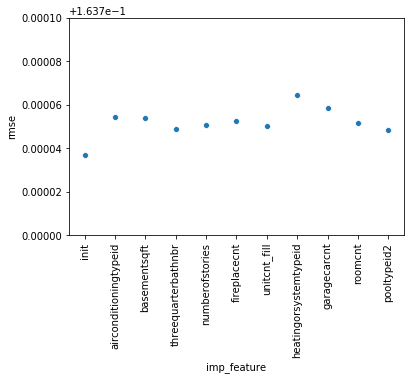

In [67]:
del_feature = pd.DataFrame.from_dict(imp_dict, orient = 'index')
del_feature = del_feature.reset_index()
del_feature = del_feature.rename(columns = {'index': 'imp_feature', 0: 'rmse'})
del_feature.to_csv('./output/plot_csv/del_feature.csv', index = False)
sns.scatterplot(x='imp_feature', y='rmse', data=del_feature)
plt.ylim(0.1637,0.1638)
plt.xticks(rotation='vertical')
plt.show()

In [10]:
from itertools import combinations
temp_list = ['total_high_hours', 'total_low_hours','max_temp','min_temp']
exist_list = [x for x in list(df_merge.columns) if x not in list(set(total_delete(df_merge) + extra_list))]
prop_list = [x for x in exist_list if x not in temp_list + ['logerror']]
target = df_merge.logerror

In [11]:
features = df_merge[exist_list].drop(['logerror'], axis = 1)

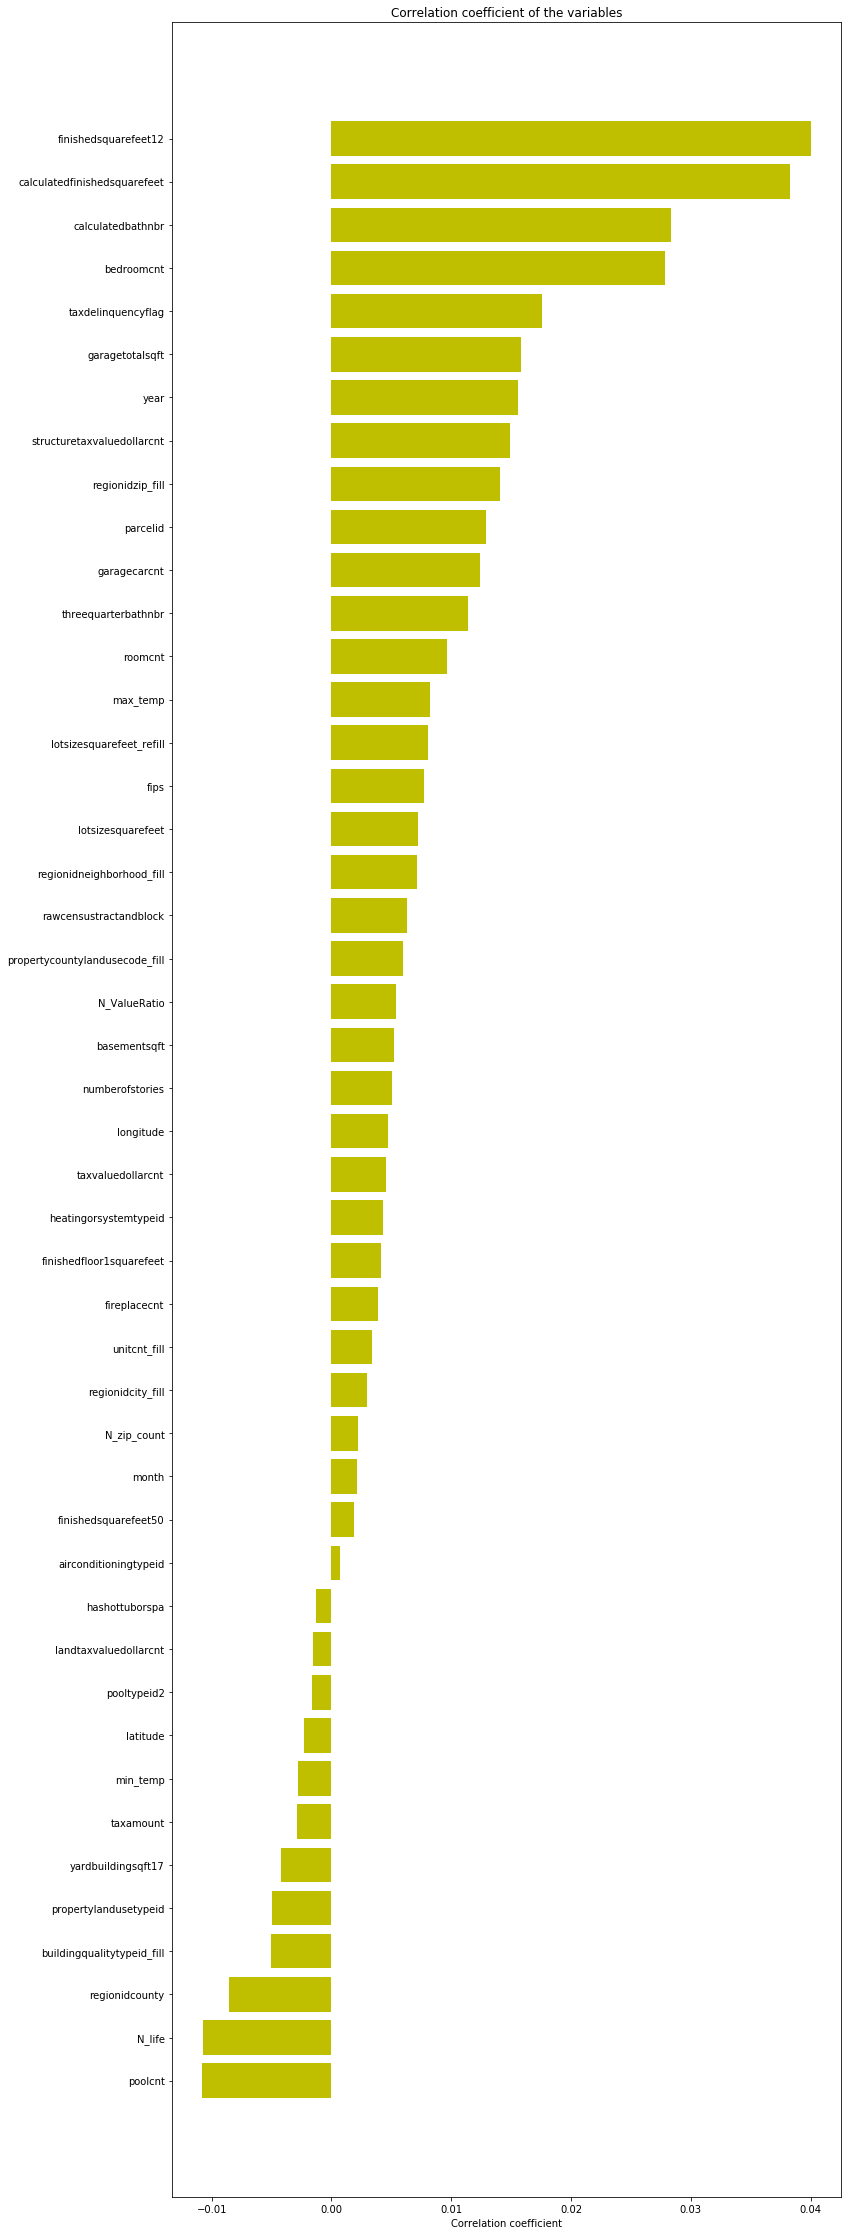

In [12]:
mean_values = df_merge.mean(axis=0)
features = df_merge[exist_list].drop(['logerror'], axis = 1)
feature_list = [x for x in list(features.columns) if x not in ['total_high_hours', 'total_low_hours']]
feature_list = [x for x in feature_list if x not in ['bathroomcnt', 'assessmentyear']]
merge_df_filled = df_merge[feature_list + ['logerror']].fillna(mean_values)
# correlation different features and logerror
x_cols = list(merge_df_filled.columns)
x_cols.remove('logerror')
labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(merge_df_filled[col].values, merge_df_filled.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()

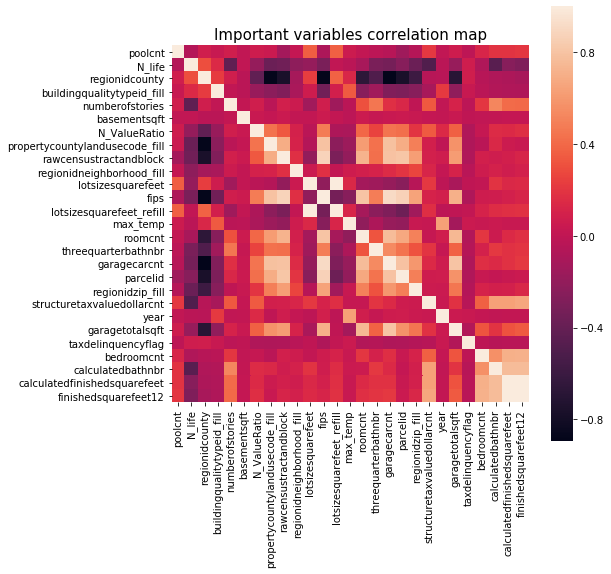

In [13]:
corr_df_sel = corr_df.loc[(corr_df['corr_values']>0.005) | (corr_df['corr_values'] < -0.005)]
cols_to_use = corr_df_sel.col_labels.tolist()
corr_df.to_csv('./output/plot_csv/corr_logerror.csv', index = False)
temp_df = df_merge[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))
corrmat.to_csv('./output/plot_csv/corr_key.csv', index = False)
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

In [14]:
cor_list = []
corrmat1 = df_merge.corr(method='spearman')
for i in list(feature_list):
    temp = corrmat1.sort_values(i)[i]
    temp1 = temp[abs(temp) > 0.5]
    cor_list += list(temp1.index)
cor_list = list(set(cor_list))

In [15]:
cor_dict = {'init': check_rmse(feature_list)}
cor_list = [x for x in cor_list if x in feature_list]
for i in cor_list:
    features_list = [x for x in feature_list if x != i]
    cor_dict[i] = check_rmse(features_list)
cor_del_df = pd.DataFrame.from_dict(cor_dict, orient = 'index')
cor_del_df = cor_del_df.reset_index().rename(columns = {'index': 'cor_feature', 0: 'rmse'})
cor_del_df.to_csv('./output/plot_csv/cor_delete_rmse.csv', index = False)

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164504	valid_1's rmse: 0.163095
[50]	training's rmse: 0.163848	valid_1's rmse: 0.163005
[75]	training's rmse: 0.163209	valid_1's rmse: 0.162926
[100]	training's rmse: 0.162599	valid_1's rmse: 0.162857
[125]	training's rmse: 0.161999	valid_1's rmse: 0.16279
[150]	training's rmse: 0.16145	valid_1's rmse: 0.162729
[175]	training's rmse: 0.160929	valid_1's rmse: 0.162682
[200]	training's rmse: 0.160403	valid_1's rmse: 0.162641
[225]	training's rmse: 0.159894	valid_1's rmse: 0.162603
[250]	training's rmse: 0.159419	valid_1's rmse: 0.162565
[275]	training's rmse: 0.158985	valid_1's rmse: 0.162534
[300]	training's rmse: 0.158545	valid_1's rmse: 0.162509
[325]	training's rmse: 0.158115	valid_1's rmse: 0.16248
[350]	training's rmse: 0.157685	valid_1's rmse: 0.162456
[375]	training's rmse: 0.157312	valid_1's rmse: 0.162441
[400]	training's rmse: 0.156925	valid_1's rmse: 0.162422
[425]	training's rmse: 0.156553	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167602	valid_1's rmse: 0.156574
[50]	training's rmse: 0.166933	valid_1's rmse: 0.156495
[75]	training's rmse: 0.166297	valid_1's rmse: 0.156418
[100]	training's rmse: 0.165689	valid_1's rmse: 0.156348
[125]	training's rmse: 0.165075	valid_1's rmse: 0.156282
[150]	training's rmse: 0.164519	valid_1's rmse: 0.156228
[175]	training's rmse: 0.163992	valid_1's rmse: 0.156177
[200]	training's rmse: 0.16346	valid_1's rmse: 0.156139
[225]	training's rmse: 0.162931	valid_1's rmse: 0.156107
[250]	training's rmse: 0.162461	valid_1's rmse: 0.15608
[275]	training's rmse: 0.162007	valid_1's rmse: 0.156057
[300]	training's rmse: 0.16157	valid_1's rmse: 0.156039
[325]	training's rmse: 0.161132	valid_1's rmse: 0.156024
[350]	training's rmse: 0.160698	valid_1's rmse: 0.15601
[375]	training's rmse: 0.160311	valid_1's rmse: 0.156
[400]	training's rmse: 0.15993	valid_1's rmse: 0.155995
[425]	training's rmse: 0.159557	valid_

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159397	valid_1's rmse: 0.173341
[50]	training's rmse: 0.158925	valid_1's rmse: 0.17328
[75]	training's rmse: 0.158453	valid_1's rmse: 0.173223
[100]	training's rmse: 0.158004	valid_1's rmse: 0.173175
[125]	training's rmse: 0.157576	valid_1's rmse: 0.17313
[150]	training's rmse: 0.157165	valid_1's rmse: 0.17309
[175]	training's rmse: 0.156782	valid_1's rmse: 0.173059
[200]	training's rmse: 0.156396	valid_1's rmse: 0.173029
[225]	training's rmse: 0.15602	valid_1's rmse: 0.173002
[250]	training's rmse: 0.15566	valid_1's rmse: 0.172976
[275]	training's rmse: 0.155339	valid_1's rmse: 0.172955
[300]	training's rmse: 0.15501	valid_1's rmse: 0.172939
[325]	training's rmse: 0.154693	valid_1's rmse: 0.172923
[350]	training's rmse: 0.154376	valid_1's rmse: 0.172908
[375]	training's rmse: 0.1541	valid_1's rmse: 0.1729
[400]	training's rmse: 0.153818	valid_1's rmse: 0.17289
[425]	training's rmse: 0.153541	valid_1's

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164593	valid_1's rmse: 0.163111
[50]	training's rmse: 0.163984	valid_1's rmse: 0.163037
[75]	training's rmse: 0.163381	valid_1's rmse: 0.162965
[100]	training's rmse: 0.162831	valid_1's rmse: 0.162903
[125]	training's rmse: 0.162291	valid_1's rmse: 0.162846
[150]	training's rmse: 0.161773	valid_1's rmse: 0.162797
[175]	training's rmse: 0.161284	valid_1's rmse: 0.162746
[200]	training's rmse: 0.160808	valid_1's rmse: 0.162703
[225]	training's rmse: 0.160353	valid_1's rmse: 0.162665
[250]	training's rmse: 0.159919	valid_1's rmse: 0.16263
[275]	training's rmse: 0.15947	valid_1's rmse: 0.162601
[300]	training's rmse: 0.15905	valid_1's rmse: 0.162568
[325]	training's rmse: 0.158631	valid_1's rmse: 0.162546
[350]	training's rmse: 0.158248	valid_1's rmse: 0.16252
[375]	training's rmse: 0.157883	valid_1's rmse: 0.162503
[400]	training's rmse: 0.157528	valid_1's rmse: 0.162488
[425]	training's rmse: 0.157181	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167717	valid_1's rmse: 0.156585
[50]	training's rmse: 0.167108	valid_1's rmse: 0.156497
[75]	training's rmse: 0.1665	valid_1's rmse: 0.156419
[100]	training's rmse: 0.165959	valid_1's rmse: 0.156349
[125]	training's rmse: 0.165398	valid_1's rmse: 0.156287
[150]	training's rmse: 0.164889	valid_1's rmse: 0.156236
[175]	training's rmse: 0.164393	valid_1's rmse: 0.156188
[200]	training's rmse: 0.163909	valid_1's rmse: 0.156147
[225]	training's rmse: 0.163445	valid_1's rmse: 0.156113
[250]	training's rmse: 0.163008	valid_1's rmse: 0.156082
[275]	training's rmse: 0.162541	valid_1's rmse: 0.156057
[300]	training's rmse: 0.162112	valid_1's rmse: 0.156034
[325]	training's rmse: 0.161687	valid_1's rmse: 0.156017
[350]	training's rmse: 0.161292	valid_1's rmse: 0.156
[375]	training's rmse: 0.160901	valid_1's rmse: 0.155991
[400]	training's rmse: 0.160542	valid_1's rmse: 0.155979
[425]	training's rmse: 0.160187	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159468	valid_1's rmse: 0.173354
[50]	training's rmse: 0.159021	valid_1's rmse: 0.17329
[75]	training's rmse: 0.158581	valid_1's rmse: 0.173231
[100]	training's rmse: 0.15818	valid_1's rmse: 0.173187
[125]	training's rmse: 0.157792	valid_1's rmse: 0.17315
[150]	training's rmse: 0.157423	valid_1's rmse: 0.17311
[175]	training's rmse: 0.157052	valid_1's rmse: 0.173081
[200]	training's rmse: 0.156691	valid_1's rmse: 0.173054
[225]	training's rmse: 0.15636	valid_1's rmse: 0.17303
[250]	training's rmse: 0.156039	valid_1's rmse: 0.173001
[275]	training's rmse: 0.155701	valid_1's rmse: 0.172984
[300]	training's rmse: 0.155386	valid_1's rmse: 0.172968
[325]	training's rmse: 0.155067	valid_1's rmse: 0.172955
[350]	training's rmse: 0.154767	valid_1's rmse: 0.172941
[375]	training's rmse: 0.154471	valid_1's rmse: 0.172932
[400]	training's rmse: 0.154205	valid_1's rmse: 0.172926
[425]	training's rmse: 0.153938	vali

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.16455	valid_1's rmse: 0.163102
[50]	training's rmse: 0.163881	valid_1's rmse: 0.163018
[75]	training's rmse: 0.163243	valid_1's rmse: 0.162938
[100]	training's rmse: 0.162652	valid_1's rmse: 0.162868
[125]	training's rmse: 0.162085	valid_1's rmse: 0.162799
[150]	training's rmse: 0.161535	valid_1's rmse: 0.162742
[175]	training's rmse: 0.161002	valid_1's rmse: 0.16269
[200]	training's rmse: 0.160496	valid_1's rmse: 0.16265
[225]	training's rmse: 0.160006	valid_1's rmse: 0.162606
[250]	training's rmse: 0.159525	valid_1's rmse: 0.16257
[275]	training's rmse: 0.159045	valid_1's rmse: 0.16254
[300]	training's rmse: 0.158598	valid_1's rmse: 0.162511
[325]	training's rmse: 0.158152	valid_1's rmse: 0.162488
[350]	training's rmse: 0.157725	valid_1's rmse: 0.162469
[375]	training's rmse: 0.157332	valid_1's rmse: 0.162448
[400]	training's rmse: 0.15694	valid_1's rmse: 0.162431
[425]	training's rmse: 0.156565	vali

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167674	valid_1's rmse: 0.156581
[50]	training's rmse: 0.167	valid_1's rmse: 0.156491
[75]	training's rmse: 0.16636	valid_1's rmse: 0.156409
[100]	training's rmse: 0.16576	valid_1's rmse: 0.156339
[125]	training's rmse: 0.165167	valid_1's rmse: 0.156275
[150]	training's rmse: 0.164623	valid_1's rmse: 0.156214
[175]	training's rmse: 0.164075	valid_1's rmse: 0.156163
[200]	training's rmse: 0.163553	valid_1's rmse: 0.156119
[225]	training's rmse: 0.163043	valid_1's rmse: 0.156079
[250]	training's rmse: 0.162553	valid_1's rmse: 0.156055
[275]	training's rmse: 0.16206	valid_1's rmse: 0.156026
[300]	training's rmse: 0.161596	valid_1's rmse: 0.156008
[325]	training's rmse: 0.161136	valid_1's rmse: 0.155995
[350]	training's rmse: 0.160702	valid_1's rmse: 0.155979
[375]	training's rmse: 0.160296	valid_1's rmse: 0.155971
[400]	training's rmse: 0.159897	valid_1's rmse: 0.155968
[425]	training's rmse: 0.159513	vali

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159432	valid_1's rmse: 0.173353
[50]	training's rmse: 0.158939	valid_1's rmse: 0.173287
[75]	training's rmse: 0.158468	valid_1's rmse: 0.173231
[100]	training's rmse: 0.158024	valid_1's rmse: 0.173182
[125]	training's rmse: 0.157611	valid_1's rmse: 0.173144
[150]	training's rmse: 0.157214	valid_1's rmse: 0.173104
[175]	training's rmse: 0.156806	valid_1's rmse: 0.17307
[200]	training's rmse: 0.156419	valid_1's rmse: 0.173042
[225]	training's rmse: 0.156059	valid_1's rmse: 0.173019
[250]	training's rmse: 0.155706	valid_1's rmse: 0.172992
[275]	training's rmse: 0.155353	valid_1's rmse: 0.172973
[300]	training's rmse: 0.155024	valid_1's rmse: 0.172958
[325]	training's rmse: 0.154688	valid_1's rmse: 0.172947
[350]	training's rmse: 0.15436	valid_1's rmse: 0.172934
[375]	training's rmse: 0.154055	valid_1's rmse: 0.172926
[400]	training's rmse: 0.153759	valid_1's rmse: 0.172918
[425]	training's rmse: 0.153474	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164561	valid_1's rmse: 0.1631
[50]	training's rmse: 0.163928	valid_1's rmse: 0.163015
[75]	training's rmse: 0.163264	valid_1's rmse: 0.162936
[100]	training's rmse: 0.162663	valid_1's rmse: 0.162865
[125]	training's rmse: 0.162069	valid_1's rmse: 0.162802
[150]	training's rmse: 0.161526	valid_1's rmse: 0.162741
[175]	training's rmse: 0.160969	valid_1's rmse: 0.162687
[200]	training's rmse: 0.160451	valid_1's rmse: 0.162641
[225]	training's rmse: 0.159946	valid_1's rmse: 0.162605
[250]	training's rmse: 0.159492	valid_1's rmse: 0.162573
[275]	training's rmse: 0.159016	valid_1's rmse: 0.162546
[300]	training's rmse: 0.158576	valid_1's rmse: 0.16252
[325]	training's rmse: 0.158138	valid_1's rmse: 0.162497
[350]	training's rmse: 0.157737	valid_1's rmse: 0.162473
[375]	training's rmse: 0.157326	valid_1's rmse: 0.162456
[400]	training's rmse: 0.156932	valid_1's rmse: 0.162435
[425]	training's rmse: 0.156565	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167676	valid_1's rmse: 0.156585
[50]	training's rmse: 0.167042	valid_1's rmse: 0.156492
[75]	training's rmse: 0.166375	valid_1's rmse: 0.156414
[100]	training's rmse: 0.165765	valid_1's rmse: 0.156343
[125]	training's rmse: 0.165149	valid_1's rmse: 0.156281
[150]	training's rmse: 0.164595	valid_1's rmse: 0.15623
[175]	training's rmse: 0.164025	valid_1's rmse: 0.156183
[200]	training's rmse: 0.163498	valid_1's rmse: 0.156143
[225]	training's rmse: 0.162982	valid_1's rmse: 0.15611
[250]	training's rmse: 0.162518	valid_1's rmse: 0.156079
[275]	training's rmse: 0.162027	valid_1's rmse: 0.156058
[300]	training's rmse: 0.161578	valid_1's rmse: 0.156031
[325]	training's rmse: 0.161123	valid_1's rmse: 0.156015
[350]	training's rmse: 0.160705	valid_1's rmse: 0.156001
[375]	training's rmse: 0.160287	valid_1's rmse: 0.155993
[400]	training's rmse: 0.159891	valid_1's rmse: 0.155983
[425]	training's rmse: 0.159519	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159449	valid_1's rmse: 0.173349
[50]	training's rmse: 0.158985	valid_1's rmse: 0.173287
[75]	training's rmse: 0.158499	valid_1's rmse: 0.173227
[100]	training's rmse: 0.158045	valid_1's rmse: 0.173174
[125]	training's rmse: 0.157602	valid_1's rmse: 0.173124
[150]	training's rmse: 0.157202	valid_1's rmse: 0.173083
[175]	training's rmse: 0.156794	valid_1's rmse: 0.17305
[200]	training's rmse: 0.15641	valid_1's rmse: 0.17302
[225]	training's rmse: 0.156044	valid_1's rmse: 0.172995
[250]	training's rmse: 0.1557	valid_1's rmse: 0.172969
[275]	training's rmse: 0.155339	valid_1's rmse: 0.17295
[300]	training's rmse: 0.154998	valid_1's rmse: 0.172933
[325]	training's rmse: 0.15467	valid_1's rmse: 0.17292
[350]	training's rmse: 0.154371	valid_1's rmse: 0.172913
[375]	training's rmse: 0.154063	valid_1's rmse: 0.172905
[400]	training's rmse: 0.153769	valid_1's rmse: 0.172902
[425]	training's rmse: 0.153499	valid_

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164548	valid_1's rmse: 0.163102
[50]	training's rmse: 0.163884	valid_1's rmse: 0.163021
[75]	training's rmse: 0.163253	valid_1's rmse: 0.162944
[100]	training's rmse: 0.16266	valid_1's rmse: 0.162873
[125]	training's rmse: 0.162093	valid_1's rmse: 0.162809
[150]	training's rmse: 0.161539	valid_1's rmse: 0.162755
[175]	training's rmse: 0.161007	valid_1's rmse: 0.162706
[200]	training's rmse: 0.160503	valid_1's rmse: 0.162667
[225]	training's rmse: 0.160013	valid_1's rmse: 0.162625
[250]	training's rmse: 0.159536	valid_1's rmse: 0.162591
[275]	training's rmse: 0.159057	valid_1's rmse: 0.162561
[300]	training's rmse: 0.158615	valid_1's rmse: 0.162532
[325]	training's rmse: 0.158181	valid_1's rmse: 0.162507
[350]	training's rmse: 0.157755	valid_1's rmse: 0.162486
[375]	training's rmse: 0.157358	valid_1's rmse: 0.162466
[400]	training's rmse: 0.156964	valid_1's rmse: 0.162447
[425]	training's rmse: 0.156593

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167673	valid_1's rmse: 0.156583
[50]	training's rmse: 0.167003	valid_1's rmse: 0.156494
[75]	training's rmse: 0.166363	valid_1's rmse: 0.156411
[100]	training's rmse: 0.165767	valid_1's rmse: 0.156341
[125]	training's rmse: 0.165178	valid_1's rmse: 0.156278
[150]	training's rmse: 0.164634	valid_1's rmse: 0.156218
[175]	training's rmse: 0.164086	valid_1's rmse: 0.156168
[200]	training's rmse: 0.163571	valid_1's rmse: 0.156126
[225]	training's rmse: 0.163062	valid_1's rmse: 0.156094
[250]	training's rmse: 0.162576	valid_1's rmse: 0.156071
[275]	training's rmse: 0.162083	valid_1's rmse: 0.156045
[300]	training's rmse: 0.161627	valid_1's rmse: 0.156029
[325]	training's rmse: 0.16118	valid_1's rmse: 0.156019
[350]	training's rmse: 0.160753	valid_1's rmse: 0.156003
[375]	training's rmse: 0.160354	valid_1's rmse: 0.155998
[400]	training's rmse: 0.159962	valid_1's rmse: 0.155996
[425]	training's rmse: 0.159583

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159435	valid_1's rmse: 0.17335
[50]	training's rmse: 0.158945	valid_1's rmse: 0.173288
[75]	training's rmse: 0.158475	valid_1's rmse: 0.173232
[100]	training's rmse: 0.15803	valid_1's rmse: 0.173182
[125]	training's rmse: 0.157622	valid_1's rmse: 0.173145
[150]	training's rmse: 0.157228	valid_1's rmse: 0.173109
[175]	training's rmse: 0.156822	valid_1's rmse: 0.173079
[200]	training's rmse: 0.156438	valid_1's rmse: 0.173052
[225]	training's rmse: 0.156084	valid_1's rmse: 0.173031
[250]	training's rmse: 0.155733	valid_1's rmse: 0.173002
[275]	training's rmse: 0.155381	valid_1's rmse: 0.172985
[300]	training's rmse: 0.155048	valid_1's rmse: 0.172969
[325]	training's rmse: 0.154712	valid_1's rmse: 0.172957
[350]	training's rmse: 0.154393	valid_1's rmse: 0.172944
[375]	training's rmse: 0.154092	valid_1's rmse: 0.172937
[400]	training's rmse: 0.1538	valid_1's rmse: 0.172931
[425]	training's rmse: 0.153517	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164535	valid_1's rmse: 0.163101
[50]	training's rmse: 0.163863	valid_1's rmse: 0.163022
[75]	training's rmse: 0.163234	valid_1's rmse: 0.162947
[100]	training's rmse: 0.162643	valid_1's rmse: 0.162874
[125]	training's rmse: 0.162064	valid_1's rmse: 0.162814
[150]	training's rmse: 0.161512	valid_1's rmse: 0.16276
[175]	training's rmse: 0.160989	valid_1's rmse: 0.16271
[200]	training's rmse: 0.160472	valid_1's rmse: 0.162664
[225]	training's rmse: 0.159992	valid_1's rmse: 0.16262
[250]	training's rmse: 0.159518	valid_1's rmse: 0.162587
[275]	training's rmse: 0.159038	valid_1's rmse: 0.162559
[300]	training's rmse: 0.158594	valid_1's rmse: 0.162527
[325]	training's rmse: 0.15816	valid_1's rmse: 0.162507
[350]	training's rmse: 0.157734	valid_1's rmse: 0.162482
[375]	training's rmse: 0.157341	valid_1's rmse: 0.162462
[400]	training's rmse: 0.156945	valid_1's rmse: 0.162442
[425]	training's rmse: 0.156575	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167662	valid_1's rmse: 0.15658
[50]	training's rmse: 0.166989	valid_1's rmse: 0.156494
[75]	training's rmse: 0.166337	valid_1's rmse: 0.156414
[100]	training's rmse: 0.165747	valid_1's rmse: 0.156348
[125]	training's rmse: 0.165153	valid_1's rmse: 0.156284
[150]	training's rmse: 0.164609	valid_1's rmse: 0.156227
[175]	training's rmse: 0.164062	valid_1's rmse: 0.156179
[200]	training's rmse: 0.163538	valid_1's rmse: 0.156138
[225]	training's rmse: 0.163031	valid_1's rmse: 0.156105
[250]	training's rmse: 0.162538	valid_1's rmse: 0.156075
[275]	training's rmse: 0.162041	valid_1's rmse: 0.15605
[300]	training's rmse: 0.161585	valid_1's rmse: 0.156031
[325]	training's rmse: 0.161139	valid_1's rmse: 0.156018
[350]	training's rmse: 0.160698	valid_1's rmse: 0.156004
[375]	training's rmse: 0.160292	valid_1's rmse: 0.155996
[400]	training's rmse: 0.159901	valid_1's rmse: 0.155991
[425]	training's rmse: 0.159521	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159417	valid_1's rmse: 0.173351
[50]	training's rmse: 0.158928	valid_1's rmse: 0.173283
[75]	training's rmse: 0.158458	valid_1's rmse: 0.173228
[100]	training's rmse: 0.158016	valid_1's rmse: 0.173183
[125]	training's rmse: 0.157597	valid_1's rmse: 0.173138
[150]	training's rmse: 0.157201	valid_1's rmse: 0.173103
[175]	training's rmse: 0.156801	valid_1's rmse: 0.173068
[200]	training's rmse: 0.156416	valid_1's rmse: 0.17304
[225]	training's rmse: 0.156057	valid_1's rmse: 0.17302
[250]	training's rmse: 0.155704	valid_1's rmse: 0.172993
[275]	training's rmse: 0.155354	valid_1's rmse: 0.172977
[300]	training's rmse: 0.155022	valid_1's rmse: 0.172962
[325]	training's rmse: 0.154697	valid_1's rmse: 0.17295
[350]	training's rmse: 0.154371	valid_1's rmse: 0.17294
[375]	training's rmse: 0.154069	valid_1's rmse: 0.172933
[400]	training's rmse: 0.153774	valid_1's rmse: 0.172923
[425]	training's rmse: 0.153489	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164559	valid_1's rmse: 0.1631
[50]	training's rmse: 0.163925	valid_1's rmse: 0.163013
[75]	training's rmse: 0.163257	valid_1's rmse: 0.162934
[100]	training's rmse: 0.162657	valid_1's rmse: 0.162864
[125]	training's rmse: 0.162064	valid_1's rmse: 0.1628
[150]	training's rmse: 0.161522	valid_1's rmse: 0.162741
[175]	training's rmse: 0.160967	valid_1's rmse: 0.162687
[200]	training's rmse: 0.160451	valid_1's rmse: 0.162641
[225]	training's rmse: 0.159948	valid_1's rmse: 0.162606
[250]	training's rmse: 0.159494	valid_1's rmse: 0.162575
[275]	training's rmse: 0.159022	valid_1's rmse: 0.162547
[300]	training's rmse: 0.15858	valid_1's rmse: 0.162522
[325]	training's rmse: 0.158143	valid_1's rmse: 0.162494
[350]	training's rmse: 0.157741	valid_1's rmse: 0.162474
[375]	training's rmse: 0.157329	valid_1's rmse: 0.162459
[400]	training's rmse: 0.156931	valid_1's rmse: 0.162439
[425]	training's rmse: 0.156564	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167677	valid_1's rmse: 0.156585
[50]	training's rmse: 0.16704	valid_1's rmse: 0.156493
[75]	training's rmse: 0.166371	valid_1's rmse: 0.156413
[100]	training's rmse: 0.165757	valid_1's rmse: 0.156344
[125]	training's rmse: 0.16514	valid_1's rmse: 0.156283
[150]	training's rmse: 0.164589	valid_1's rmse: 0.15623
[175]	training's rmse: 0.164019	valid_1's rmse: 0.156183
[200]	training's rmse: 0.163486	valid_1's rmse: 0.15614
[225]	training's rmse: 0.162965	valid_1's rmse: 0.156108
[250]	training's rmse: 0.162505	valid_1's rmse: 0.156077
[275]	training's rmse: 0.162018	valid_1's rmse: 0.156052
[300]	training's rmse: 0.16157	valid_1's rmse: 0.156024
[325]	training's rmse: 0.161113	valid_1's rmse: 0.156008
[350]	training's rmse: 0.160691	valid_1's rmse: 0.155993
[375]	training's rmse: 0.160276	valid_1's rmse: 0.155986
[400]	training's rmse: 0.159882	valid_1's rmse: 0.155979
[425]	training's rmse: 0.159502	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159449	valid_1's rmse: 0.173349
[50]	training's rmse: 0.158984	valid_1's rmse: 0.173287
[75]	training's rmse: 0.158498	valid_1's rmse: 0.173226
[100]	training's rmse: 0.158045	valid_1's rmse: 0.173174
[125]	training's rmse: 0.157603	valid_1's rmse: 0.173125
[150]	training's rmse: 0.1572	valid_1's rmse: 0.173085
[175]	training's rmse: 0.156792	valid_1's rmse: 0.173053
[200]	training's rmse: 0.15641	valid_1's rmse: 0.173024
[225]	training's rmse: 0.156038	valid_1's rmse: 0.173003
[250]	training's rmse: 0.155699	valid_1's rmse: 0.172978
[275]	training's rmse: 0.155339	valid_1's rmse: 0.172957
[300]	training's rmse: 0.154997	valid_1's rmse: 0.172941
[325]	training's rmse: 0.154668	valid_1's rmse: 0.172926
[350]	training's rmse: 0.154369	valid_1's rmse: 0.172921
[375]	training's rmse: 0.154058	valid_1's rmse: 0.172911
[400]	training's rmse: 0.153763	valid_1's rmse: 0.172907
[425]	training's rmse: 0.153493	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164547	valid_1's rmse: 0.163102
[50]	training's rmse: 0.163878	valid_1's rmse: 0.163019
[75]	training's rmse: 0.16324	valid_1's rmse: 0.162942
[100]	training's rmse: 0.162643	valid_1's rmse: 0.162871
[125]	training's rmse: 0.162073	valid_1's rmse: 0.162806
[150]	training's rmse: 0.161521	valid_1's rmse: 0.162751
[175]	training's rmse: 0.160983	valid_1's rmse: 0.162698
[200]	training's rmse: 0.160474	valid_1's rmse: 0.162653
[225]	training's rmse: 0.159978	valid_1's rmse: 0.162609
[250]	training's rmse: 0.159496	valid_1's rmse: 0.162573
[275]	training's rmse: 0.15902	valid_1's rmse: 0.162543
[300]	training's rmse: 0.158561	valid_1's rmse: 0.16251
[325]	training's rmse: 0.158119	valid_1's rmse: 0.162486
[350]	training's rmse: 0.157691	valid_1's rmse: 0.162464
[375]	training's rmse: 0.157301	valid_1's rmse: 0.162447
[400]	training's rmse: 0.156905	valid_1's rmse: 0.162429
[425]	training's rmse: 0.15653	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167674	valid_1's rmse: 0.156583
[50]	training's rmse: 0.166996	valid_1's rmse: 0.156495
[75]	training's rmse: 0.166353	valid_1's rmse: 0.156416
[100]	training's rmse: 0.165756	valid_1's rmse: 0.156348
[125]	training's rmse: 0.165164	valid_1's rmse: 0.156282
[150]	training's rmse: 0.164619	valid_1's rmse: 0.156225
[175]	training's rmse: 0.164071	valid_1's rmse: 0.156178
[200]	training's rmse: 0.163549	valid_1's rmse: 0.156133
[225]	training's rmse: 0.163044	valid_1's rmse: 0.156098
[250]	training's rmse: 0.162553	valid_1's rmse: 0.156073
[275]	training's rmse: 0.162056	valid_1's rmse: 0.156049
[300]	training's rmse: 0.161597	valid_1's rmse: 0.15603
[325]	training's rmse: 0.161144	valid_1's rmse: 0.156016
[350]	training's rmse: 0.160707	valid_1's rmse: 0.156001
[375]	training's rmse: 0.160298	valid_1's rmse: 0.155994
[400]	training's rmse: 0.159898	valid_1's rmse: 0.15599
[425]	training's rmse: 0.159518	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.15943	valid_1's rmse: 0.173352
[50]	training's rmse: 0.158935	valid_1's rmse: 0.173288
[75]	training's rmse: 0.158468	valid_1's rmse: 0.17323
[100]	training's rmse: 0.158019	valid_1's rmse: 0.17318
[125]	training's rmse: 0.157605	valid_1's rmse: 0.173132
[150]	training's rmse: 0.157205	valid_1's rmse: 0.173095
[175]	training's rmse: 0.156797	valid_1's rmse: 0.173061
[200]	training's rmse: 0.156411	valid_1's rmse: 0.173036
[225]	training's rmse: 0.156051	valid_1's rmse: 0.173016
[250]	training's rmse: 0.155698	valid_1's rmse: 0.172986
[275]	training's rmse: 0.155349	valid_1's rmse: 0.17297
[300]	training's rmse: 0.155017	valid_1's rmse: 0.172954
[325]	training's rmse: 0.154685	valid_1's rmse: 0.172941
[350]	training's rmse: 0.154357	valid_1's rmse: 0.172929
[375]	training's rmse: 0.154056	valid_1's rmse: 0.172922
[400]	training's rmse: 0.153759	valid_1's rmse: 0.172913
[425]	training's rmse: 0.153476	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164583	valid_1's rmse: 0.163101
[50]	training's rmse: 0.163988	valid_1's rmse: 0.163025
[75]	training's rmse: 0.163374	valid_1's rmse: 0.162945
[100]	training's rmse: 0.162804	valid_1's rmse: 0.162874
[125]	training's rmse: 0.162256	valid_1's rmse: 0.16281
[150]	training's rmse: 0.161752	valid_1's rmse: 0.162755
[175]	training's rmse: 0.161241	valid_1's rmse: 0.162704
[200]	training's rmse: 0.160766	valid_1's rmse: 0.162659
[225]	training's rmse: 0.160298	valid_1's rmse: 0.162611
[250]	training's rmse: 0.15988	valid_1's rmse: 0.162574
[275]	training's rmse: 0.159443	valid_1's rmse: 0.162544
[300]	training's rmse: 0.159027	valid_1's rmse: 0.162512
[325]	training's rmse: 0.158635	valid_1's rmse: 0.162484
[350]	training's rmse: 0.158251	valid_1's rmse: 0.16246
[375]	training's rmse: 0.157868	valid_1's rmse: 0.162443
[400]	training's rmse: 0.157503	valid_1's rmse: 0.162424
[425]	training's rmse: 0.157161	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167697	valid_1's rmse: 0.156589
[50]	training's rmse: 0.1671	valid_1's rmse: 0.156501
[75]	training's rmse: 0.166486	valid_1's rmse: 0.156426
[100]	training's rmse: 0.165908	valid_1's rmse: 0.156355
[125]	training's rmse: 0.16535	valid_1's rmse: 0.156294
[150]	training's rmse: 0.164864	valid_1's rmse: 0.156242
[175]	training's rmse: 0.164346	valid_1's rmse: 0.156193
[200]	training's rmse: 0.163873	valid_1's rmse: 0.156149
[225]	training's rmse: 0.163393	valid_1's rmse: 0.156117
[250]	training's rmse: 0.162965	valid_1's rmse: 0.156087
[275]	training's rmse: 0.162523	valid_1's rmse: 0.156066
[300]	training's rmse: 0.162105	valid_1's rmse: 0.156039
[325]	training's rmse: 0.161712	valid_1's rmse: 0.156018
[350]	training's rmse: 0.161334	valid_1's rmse: 0.156
[375]	training's rmse: 0.16094	valid_1's rmse: 0.15599
[400]	training's rmse: 0.16058	valid_1's rmse: 0.155979
[425]	training's rmse: 0.160229	valid_1

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159463	valid_1's rmse: 0.173354
[50]	training's rmse: 0.15903	valid_1's rmse: 0.173298
[75]	training's rmse: 0.158588	valid_1's rmse: 0.173249
[100]	training's rmse: 0.158161	valid_1's rmse: 0.173202
[125]	training's rmse: 0.157762	valid_1's rmse: 0.173165
[150]	training's rmse: 0.157402	valid_1's rmse: 0.173131
[175]	training's rmse: 0.157017	valid_1's rmse: 0.173096
[200]	training's rmse: 0.156669	valid_1's rmse: 0.173068
[225]	training's rmse: 0.156336	valid_1's rmse: 0.173045
[250]	training's rmse: 0.156036	valid_1's rmse: 0.17302
[275]	training's rmse: 0.155717	valid_1's rmse: 0.173003
[300]	training's rmse: 0.155397	valid_1's rmse: 0.172989
[325]	training's rmse: 0.155106	valid_1's rmse: 0.172976
[350]	training's rmse: 0.154833	valid_1's rmse: 0.172967
[375]	training's rmse: 0.154547	valid_1's rmse: 0.172958
[400]	training's rmse: 0.154269	valid_1's rmse: 0.172952
[425]	training's rmse: 0.154009	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164534	valid_1's rmse: 0.163101
[50]	training's rmse: 0.163863	valid_1's rmse: 0.163017
[75]	training's rmse: 0.163243	valid_1's rmse: 0.162947
[100]	training's rmse: 0.162653	valid_1's rmse: 0.162873
[125]	training's rmse: 0.162069	valid_1's rmse: 0.162812
[150]	training's rmse: 0.161521	valid_1's rmse: 0.162759
[175]	training's rmse: 0.161012	valid_1's rmse: 0.162708
[200]	training's rmse: 0.160507	valid_1's rmse: 0.162664
[225]	training's rmse: 0.160026	valid_1's rmse: 0.162625
[250]	training's rmse: 0.159547	valid_1's rmse: 0.162588
[275]	training's rmse: 0.159065	valid_1's rmse: 0.162556
[300]	training's rmse: 0.158633	valid_1's rmse: 0.162526
[325]	training's rmse: 0.158196	valid_1's rmse: 0.162501
[350]	training's rmse: 0.157763	valid_1's rmse: 0.162479
[375]	training's rmse: 0.157363	valid_1's rmse: 0.16246
[400]	training's rmse: 0.156971	valid_1's rmse: 0.162445
[425]	training's rmse: 0.156591

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167648	valid_1's rmse: 0.156589
[50]	training's rmse: 0.166969	valid_1's rmse: 0.156499
[75]	training's rmse: 0.16633	valid_1's rmse: 0.156426
[100]	training's rmse: 0.165739	valid_1's rmse: 0.156358
[125]	training's rmse: 0.165146	valid_1's rmse: 0.156293
[150]	training's rmse: 0.164607	valid_1's rmse: 0.156235
[175]	training's rmse: 0.164067	valid_1's rmse: 0.15619
[200]	training's rmse: 0.163536	valid_1's rmse: 0.156146
[225]	training's rmse: 0.163033	valid_1's rmse: 0.156116
[250]	training's rmse: 0.162539	valid_1's rmse: 0.15609
[275]	training's rmse: 0.162049	valid_1's rmse: 0.156065
[300]	training's rmse: 0.161599	valid_1's rmse: 0.156044
[325]	training's rmse: 0.16115	valid_1's rmse: 0.156031
[350]	training's rmse: 0.160723	valid_1's rmse: 0.156016
[375]	training's rmse: 0.160303	valid_1's rmse: 0.156005
[400]	training's rmse: 0.159912	valid_1's rmse: 0.155997
[425]	training's rmse: 0.159519	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159412	valid_1's rmse: 0.173342
[50]	training's rmse: 0.15892	valid_1's rmse: 0.173276
[75]	training's rmse: 0.158455	valid_1's rmse: 0.17322
[100]	training's rmse: 0.158011	valid_1's rmse: 0.173166
[125]	training's rmse: 0.157592	valid_1's rmse: 0.173119
[150]	training's rmse: 0.157198	valid_1's rmse: 0.173083
[175]	training's rmse: 0.156799	valid_1's rmse: 0.173052
[200]	training's rmse: 0.156421	valid_1's rmse: 0.173025
[225]	training's rmse: 0.156063	valid_1's rmse: 0.173003
[250]	training's rmse: 0.155712	valid_1's rmse: 0.172975
[275]	training's rmse: 0.155358	valid_1's rmse: 0.172958
[300]	training's rmse: 0.155034	valid_1's rmse: 0.172941
[325]	training's rmse: 0.154704	valid_1's rmse: 0.17293
[350]	training's rmse: 0.154383	valid_1's rmse: 0.172923
[375]	training's rmse: 0.154077	valid_1's rmse: 0.17292
[400]	training's rmse: 0.153783	valid_1's rmse: 0.172912
[425]	training's rmse: 0.153486	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164546	valid_1's rmse: 0.163102
[50]	training's rmse: 0.163881	valid_1's rmse: 0.163018
[75]	training's rmse: 0.163242	valid_1's rmse: 0.16294
[100]	training's rmse: 0.162647	valid_1's rmse: 0.162867
[125]	training's rmse: 0.162075	valid_1's rmse: 0.162802
[150]	training's rmse: 0.161523	valid_1's rmse: 0.162744
[175]	training's rmse: 0.160985	valid_1's rmse: 0.162692
[200]	training's rmse: 0.160482	valid_1's rmse: 0.162651
[225]	training's rmse: 0.15999	valid_1's rmse: 0.162607
[250]	training's rmse: 0.159509	valid_1's rmse: 0.16257
[275]	training's rmse: 0.15903	valid_1's rmse: 0.162538
[300]	training's rmse: 0.158576	valid_1's rmse: 0.162508
[325]	training's rmse: 0.158133	valid_1's rmse: 0.162482
[350]	training's rmse: 0.157704	valid_1's rmse: 0.162456
[375]	training's rmse: 0.15731	valid_1's rmse: 0.162436
[400]	training's rmse: 0.156915	valid_1's rmse: 0.162416
[425]	training's rmse: 0.156538	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.16767	valid_1's rmse: 0.156583
[50]	training's rmse: 0.166995	valid_1's rmse: 0.156493
[75]	training's rmse: 0.16635	valid_1's rmse: 0.156411
[100]	training's rmse: 0.165747	valid_1's rmse: 0.156341
[125]	training's rmse: 0.165156	valid_1's rmse: 0.156275
[150]	training's rmse: 0.164609	valid_1's rmse: 0.156218
[175]	training's rmse: 0.164062	valid_1's rmse: 0.156165
[200]	training's rmse: 0.163542	valid_1's rmse: 0.156122
[225]	training's rmse: 0.16303	valid_1's rmse: 0.156086
[250]	training's rmse: 0.16254	valid_1's rmse: 0.156061
[275]	training's rmse: 0.162036	valid_1's rmse: 0.156035
[300]	training's rmse: 0.161579	valid_1's rmse: 0.156015
[325]	training's rmse: 0.161125	valid_1's rmse: 0.156003
[350]	training's rmse: 0.160697	valid_1's rmse: 0.155989
[375]	training's rmse: 0.160287	valid_1's rmse: 0.155982
[400]	training's rmse: 0.159896	valid_1's rmse: 0.155977
[425]	training's rmse: 0.159512	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159434	valid_1's rmse: 0.173349
[50]	training's rmse: 0.15894	valid_1's rmse: 0.173284
[75]	training's rmse: 0.158471	valid_1's rmse: 0.173225
[100]	training's rmse: 0.158027	valid_1's rmse: 0.173176
[125]	training's rmse: 0.15761	valid_1's rmse: 0.173138
[150]	training's rmse: 0.157207	valid_1's rmse: 0.173099
[175]	training's rmse: 0.156802	valid_1's rmse: 0.173066
[200]	training's rmse: 0.156417	valid_1's rmse: 0.173037
[225]	training's rmse: 0.156059	valid_1's rmse: 0.173013
[250]	training's rmse: 0.155707	valid_1's rmse: 0.172983
[275]	training's rmse: 0.155352	valid_1's rmse: 0.172965
[300]	training's rmse: 0.155021	valid_1's rmse: 0.17295
[325]	training's rmse: 0.154683	valid_1's rmse: 0.172937
[350]	training's rmse: 0.154357	valid_1's rmse: 0.172926
[375]	training's rmse: 0.154053	valid_1's rmse: 0.17292
[400]	training's rmse: 0.153755	valid_1's rmse: 0.172911
[425]	training's rmse: 0.153468	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164537	valid_1's rmse: 0.1631
[50]	training's rmse: 0.163877	valid_1's rmse: 0.163016
[75]	training's rmse: 0.16326	valid_1's rmse: 0.162942
[100]	training's rmse: 0.162669	valid_1's rmse: 0.162869
[125]	training's rmse: 0.162101	valid_1's rmse: 0.162807
[150]	training's rmse: 0.161563	valid_1's rmse: 0.162747
[175]	training's rmse: 0.161043	valid_1's rmse: 0.162696
[200]	training's rmse: 0.160535	valid_1's rmse: 0.162647
[225]	training's rmse: 0.16005	valid_1's rmse: 0.162612
[250]	training's rmse: 0.159573	valid_1's rmse: 0.16258
[275]	training's rmse: 0.159106	valid_1's rmse: 0.16255
[300]	training's rmse: 0.158691	valid_1's rmse: 0.162521
[325]	training's rmse: 0.158265	valid_1's rmse: 0.162498
[350]	training's rmse: 0.157844	valid_1's rmse: 0.162474
[375]	training's rmse: 0.157442	valid_1's rmse: 0.162453
[400]	training's rmse: 0.157049	valid_1's rmse: 0.162438
[425]	training's rmse: 0.156674	vali

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167656	valid_1's rmse: 0.156582
[50]	training's rmse: 0.166993	valid_1's rmse: 0.156491
[75]	training's rmse: 0.166369	valid_1's rmse: 0.156413
[100]	training's rmse: 0.165776	valid_1's rmse: 0.156339
[125]	training's rmse: 0.165201	valid_1's rmse: 0.156278
[150]	training's rmse: 0.164672	valid_1's rmse: 0.156224
[175]	training's rmse: 0.164136	valid_1's rmse: 0.156177
[200]	training's rmse: 0.163606	valid_1's rmse: 0.156134
[225]	training's rmse: 0.163111	valid_1's rmse: 0.156099
[250]	training's rmse: 0.162627	valid_1's rmse: 0.156075
[275]	training's rmse: 0.162143	valid_1's rmse: 0.156049
[300]	training's rmse: 0.161712	valid_1's rmse: 0.156032
[325]	training's rmse: 0.161274	valid_1's rmse: 0.15602
[350]	training's rmse: 0.160849	valid_1's rmse: 0.156003
[375]	training's rmse: 0.160437	valid_1's rmse: 0.155994
[400]	training's rmse: 0.160047	valid_1's rmse: 0.155987
[425]	training's rmse: 0.159662

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159416	valid_1's rmse: 0.173342
[50]	training's rmse: 0.158933	valid_1's rmse: 0.17328
[75]	training's rmse: 0.158469	valid_1's rmse: 0.173221
[100]	training's rmse: 0.158023	valid_1's rmse: 0.17317
[125]	training's rmse: 0.157609	valid_1's rmse: 0.17312
[150]	training's rmse: 0.157214	valid_1's rmse: 0.173087
[175]	training's rmse: 0.156819	valid_1's rmse: 0.173055
[200]	training's rmse: 0.156436	valid_1's rmse: 0.173026
[225]	training's rmse: 0.15608	valid_1's rmse: 0.173002
[250]	training's rmse: 0.155733	valid_1's rmse: 0.172972
[275]	training's rmse: 0.155383	valid_1's rmse: 0.172952
[300]	training's rmse: 0.155066	valid_1's rmse: 0.172936
[325]	training's rmse: 0.154739	valid_1's rmse: 0.172926
[350]	training's rmse: 0.154414	valid_1's rmse: 0.17292
[375]	training's rmse: 0.154106	valid_1's rmse: 0.172914
[400]	training's rmse: 0.153809	valid_1's rmse: 0.172906
[425]	training's rmse: 0.153524	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164568	valid_1's rmse: 0.163097
[50]	training's rmse: 0.163939	valid_1's rmse: 0.163014
[75]	training's rmse: 0.163279	valid_1's rmse: 0.162934
[100]	training's rmse: 0.162681	valid_1's rmse: 0.162861
[125]	training's rmse: 0.162096	valid_1's rmse: 0.1628
[150]	training's rmse: 0.161557	valid_1's rmse: 0.162741
[175]	training's rmse: 0.161007	valid_1's rmse: 0.162693
[200]	training's rmse: 0.160495	valid_1's rmse: 0.162647
[225]	training's rmse: 0.159992	valid_1's rmse: 0.162611
[250]	training's rmse: 0.159541	valid_1's rmse: 0.162576
[275]	training's rmse: 0.159067	valid_1's rmse: 0.162545
[300]	training's rmse: 0.158627	valid_1's rmse: 0.162521
[325]	training's rmse: 0.158195	valid_1's rmse: 0.162497
[350]	training's rmse: 0.157795	valid_1's rmse: 0.162477
[375]	training's rmse: 0.157394	valid_1's rmse: 0.162465
[400]	training's rmse: 0.157004	valid_1's rmse: 0.162452
[425]	training's rmse: 0.156647	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167685	valid_1's rmse: 0.156589
[50]	training's rmse: 0.167057	valid_1's rmse: 0.1565
[75]	training's rmse: 0.166399	valid_1's rmse: 0.15642
[100]	training's rmse: 0.165798	valid_1's rmse: 0.15635
[125]	training's rmse: 0.165196	valid_1's rmse: 0.156288
[150]	training's rmse: 0.164651	valid_1's rmse: 0.156236
[175]	training's rmse: 0.164087	valid_1's rmse: 0.156186
[200]	training's rmse: 0.163578	valid_1's rmse: 0.156143
[225]	training's rmse: 0.163072	valid_1's rmse: 0.156109
[250]	training's rmse: 0.162617	valid_1's rmse: 0.156079
[275]	training's rmse: 0.162135	valid_1's rmse: 0.156053
[300]	training's rmse: 0.161696	valid_1's rmse: 0.156026
[325]	training's rmse: 0.161255	valid_1's rmse: 0.156009
[350]	training's rmse: 0.160845	valid_1's rmse: 0.155991
[375]	training's rmse: 0.16044	valid_1's rmse: 0.155979
[400]	training's rmse: 0.160049	valid_1's rmse: 0.155969
[425]	training's rmse: 0.159687	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159454	valid_1's rmse: 0.173347
[50]	training's rmse: 0.158993	valid_1's rmse: 0.173285
[75]	training's rmse: 0.158507	valid_1's rmse: 0.173227
[100]	training's rmse: 0.158057	valid_1's rmse: 0.173176
[125]	training's rmse: 0.15762	valid_1's rmse: 0.173126
[150]	training's rmse: 0.157224	valid_1's rmse: 0.173088
[175]	training's rmse: 0.156819	valid_1's rmse: 0.173052
[200]	training's rmse: 0.156446	valid_1's rmse: 0.173022
[225]	training's rmse: 0.156086	valid_1's rmse: 0.172999
[250]	training's rmse: 0.155752	valid_1's rmse: 0.172975
[275]	training's rmse: 0.155398	valid_1's rmse: 0.172956
[300]	training's rmse: 0.155058	valid_1's rmse: 0.172939
[325]	training's rmse: 0.154734	valid_1's rmse: 0.172922
[350]	training's rmse: 0.154443	valid_1's rmse: 0.172911
[375]	training's rmse: 0.154149	valid_1's rmse: 0.172905
[400]	training's rmse: 0.153861	valid_1's rmse: 0.172904
[425]	training's rmse: 0.153593

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164542	valid_1's rmse: 0.163101
[50]	training's rmse: 0.163874	valid_1's rmse: 0.16302
[75]	training's rmse: 0.163245	valid_1's rmse: 0.162946
[100]	training's rmse: 0.162661	valid_1's rmse: 0.162873
[125]	training's rmse: 0.162079	valid_1's rmse: 0.162814
[150]	training's rmse: 0.161524	valid_1's rmse: 0.16276
[175]	training's rmse: 0.160995	valid_1's rmse: 0.162706
[200]	training's rmse: 0.160482	valid_1's rmse: 0.16266
[225]	training's rmse: 0.159996	valid_1's rmse: 0.162618
[250]	training's rmse: 0.159516	valid_1's rmse: 0.162582
[275]	training's rmse: 0.15904	valid_1's rmse: 0.162552
[300]	training's rmse: 0.158598	valid_1's rmse: 0.162523
[325]	training's rmse: 0.158164	valid_1's rmse: 0.162499
[350]	training's rmse: 0.157732	valid_1's rmse: 0.162476
[375]	training's rmse: 0.157338	valid_1's rmse: 0.162456
[400]	training's rmse: 0.156941	valid_1's rmse: 0.162441
[425]	training's rmse: 0.156555	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167655	valid_1's rmse: 0.156579
[50]	training's rmse: 0.166986	valid_1's rmse: 0.156493
[75]	training's rmse: 0.166335	valid_1's rmse: 0.156412
[100]	training's rmse: 0.165744	valid_1's rmse: 0.156342
[125]	training's rmse: 0.165147	valid_1's rmse: 0.156278
[150]	training's rmse: 0.164599	valid_1's rmse: 0.156218
[175]	training's rmse: 0.164055	valid_1's rmse: 0.156172
[200]	training's rmse: 0.163522	valid_1's rmse: 0.15613
[225]	training's rmse: 0.163022	valid_1's rmse: 0.156094
[250]	training's rmse: 0.162532	valid_1's rmse: 0.156069
[275]	training's rmse: 0.162031	valid_1's rmse: 0.156044
[300]	training's rmse: 0.161575	valid_1's rmse: 0.156027
[325]	training's rmse: 0.161124	valid_1's rmse: 0.156017
[350]	training's rmse: 0.160695	valid_1's rmse: 0.156001
[375]	training's rmse: 0.16029	valid_1's rmse: 0.155995
[400]	training's rmse: 0.159899	valid_1's rmse: 0.155988
[425]	training's rmse: 0.159512	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159419	valid_1's rmse: 0.173348
[50]	training's rmse: 0.15893	valid_1's rmse: 0.173284
[75]	training's rmse: 0.158463	valid_1's rmse: 0.17323
[100]	training's rmse: 0.158022	valid_1's rmse: 0.173184
[125]	training's rmse: 0.157605	valid_1's rmse: 0.173139
[150]	training's rmse: 0.15721	valid_1's rmse: 0.173101
[175]	training's rmse: 0.156811	valid_1's rmse: 0.173069
[200]	training's rmse: 0.156425	valid_1's rmse: 0.173043
[225]	training's rmse: 0.156064	valid_1's rmse: 0.17302
[250]	training's rmse: 0.155714	valid_1's rmse: 0.172992
[275]	training's rmse: 0.155361	valid_1's rmse: 0.172975
[300]	training's rmse: 0.155028	valid_1's rmse: 0.172962
[325]	training's rmse: 0.154696	valid_1's rmse: 0.172951
[350]	training's rmse: 0.15437	valid_1's rmse: 0.172942
[375]	training's rmse: 0.154067	valid_1's rmse: 0.172938
[400]	training's rmse: 0.153773	valid_1's rmse: 0.172929
[425]	training's rmse: 0.153488	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164534	valid_1's rmse: 0.163101
[50]	training's rmse: 0.16387	valid_1's rmse: 0.163015
[75]	training's rmse: 0.163243	valid_1's rmse: 0.162939
[100]	training's rmse: 0.162644	valid_1's rmse: 0.16286
[125]	training's rmse: 0.162067	valid_1's rmse: 0.162798
[150]	training's rmse: 0.161527	valid_1's rmse: 0.162744
[175]	training's rmse: 0.161	valid_1's rmse: 0.162692
[200]	training's rmse: 0.160483	valid_1's rmse: 0.162643
[225]	training's rmse: 0.159997	valid_1's rmse: 0.162605
[250]	training's rmse: 0.159512	valid_1's rmse: 0.162571
[275]	training's rmse: 0.15903	valid_1's rmse: 0.162539
[300]	training's rmse: 0.158609	valid_1's rmse: 0.162513
[325]	training's rmse: 0.158176	valid_1's rmse: 0.16249
[350]	training's rmse: 0.157757	valid_1's rmse: 0.162468
[375]	training's rmse: 0.157347	valid_1's rmse: 0.162447
[400]	training's rmse: 0.156952	valid_1's rmse: 0.162433
[425]	training's rmse: 0.156565	valid

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167644	valid_1's rmse: 0.156585
[50]	training's rmse: 0.166967	valid_1's rmse: 0.156494
[75]	training's rmse: 0.166332	valid_1's rmse: 0.156415
[100]	training's rmse: 0.165728	valid_1's rmse: 0.156342
[125]	training's rmse: 0.165135	valid_1's rmse: 0.156281
[150]	training's rmse: 0.164599	valid_1's rmse: 0.156222
[175]	training's rmse: 0.164053	valid_1's rmse: 0.156173
[200]	training's rmse: 0.163529	valid_1's rmse: 0.156131
[225]	training's rmse: 0.163029	valid_1's rmse: 0.156098
[250]	training's rmse: 0.162543	valid_1's rmse: 0.156075
[275]	training's rmse: 0.162046	valid_1's rmse: 0.15605
[300]	training's rmse: 0.161609	valid_1's rmse: 0.156035
[325]	training's rmse: 0.161159	valid_1's rmse: 0.15602
[350]	training's rmse: 0.160736	valid_1's rmse: 0.156003
[375]	training's rmse: 0.160325	valid_1's rmse: 0.155998
[400]	training's rmse: 0.159922	valid_1's rmse: 0.155989
[425]	training's rmse: 0.159524	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159412	valid_1's rmse: 0.173345
[50]	training's rmse: 0.158924	valid_1's rmse: 0.173281
[75]	training's rmse: 0.158458	valid_1's rmse: 0.173229
[100]	training's rmse: 0.158006	valid_1's rmse: 0.173177
[125]	training's rmse: 0.157589	valid_1's rmse: 0.173124
[150]	training's rmse: 0.157195	valid_1's rmse: 0.17309
[175]	training's rmse: 0.156792	valid_1's rmse: 0.173056
[200]	training's rmse: 0.156409	valid_1's rmse: 0.173026
[225]	training's rmse: 0.156054	valid_1's rmse: 0.173006
[250]	training's rmse: 0.155705	valid_1's rmse: 0.172981
[275]	training's rmse: 0.155354	valid_1's rmse: 0.172962
[300]	training's rmse: 0.155035	valid_1's rmse: 0.172947
[325]	training's rmse: 0.154702	valid_1's rmse: 0.172936
[350]	training's rmse: 0.154375	valid_1's rmse: 0.172929
[375]	training's rmse: 0.154064	valid_1's rmse: 0.172922
[400]	training's rmse: 0.153771	valid_1's rmse: 0.172914
[425]	training's rmse: 0.153478

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164578	valid_1's rmse: 0.163101
[50]	training's rmse: 0.163969	valid_1's rmse: 0.163021
[75]	training's rmse: 0.16335	valid_1's rmse: 0.162938
[100]	training's rmse: 0.162767	valid_1's rmse: 0.162859
[125]	training's rmse: 0.162206	valid_1's rmse: 0.162793
[150]	training's rmse: 0.161685	valid_1's rmse: 0.162735
[175]	training's rmse: 0.161151	valid_1's rmse: 0.162682
[200]	training's rmse: 0.160663	valid_1's rmse: 0.162639
[225]	training's rmse: 0.160178	valid_1's rmse: 0.162595
[250]	training's rmse: 0.159751	valid_1's rmse: 0.162555
[275]	training's rmse: 0.159303	valid_1's rmse: 0.162525
[300]	training's rmse: 0.158873	valid_1's rmse: 0.162492
[325]	training's rmse: 0.158459	valid_1's rmse: 0.162466
[350]	training's rmse: 0.158064	valid_1's rmse: 0.162437
[375]	training's rmse: 0.157682	valid_1's rmse: 0.162416
[400]	training's rmse: 0.157309	valid_1's rmse: 0.162395
[425]	training's rmse: 0.15696	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.16769	valid_1's rmse: 0.156592
[50]	training's rmse: 0.167075	valid_1's rmse: 0.156505
[75]	training's rmse: 0.166442	valid_1's rmse: 0.156428
[100]	training's rmse: 0.165843	valid_1's rmse: 0.156356
[125]	training's rmse: 0.165261	valid_1's rmse: 0.156298
[150]	training's rmse: 0.164737	valid_1's rmse: 0.156243
[175]	training's rmse: 0.164181	valid_1's rmse: 0.156192
[200]	training's rmse: 0.163679	valid_1's rmse: 0.156145
[225]	training's rmse: 0.163181	valid_1's rmse: 0.156105
[250]	training's rmse: 0.162732	valid_1's rmse: 0.156075
[275]	training's rmse: 0.162271	valid_1's rmse: 0.156049
[300]	training's rmse: 0.16184	valid_1's rmse: 0.156022
[325]	training's rmse: 0.161421	valid_1's rmse: 0.156005
[350]	training's rmse: 0.161022	valid_1's rmse: 0.155985
[375]	training's rmse: 0.1606	valid_1's rmse: 0.155974
[400]	training's rmse: 0.160222	valid_1's rmse: 0.155961
[425]	training's rmse: 0.159855	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.15946	valid_1's rmse: 0.173348
[50]	training's rmse: 0.15902	valid_1's rmse: 0.173284
[75]	training's rmse: 0.158561	valid_1's rmse: 0.173227
[100]	training's rmse: 0.158127	valid_1's rmse: 0.173177
[125]	training's rmse: 0.157722	valid_1's rmse: 0.173131
[150]	training's rmse: 0.157348	valid_1's rmse: 0.173095
[175]	training's rmse: 0.156957	valid_1's rmse: 0.173058
[200]	training's rmse: 0.1566	valid_1's rmse: 0.173027
[225]	training's rmse: 0.156259	valid_1's rmse: 0.173002
[250]	training's rmse: 0.155946	valid_1's rmse: 0.172975
[275]	training's rmse: 0.155618	valid_1's rmse: 0.172953
[300]	training's rmse: 0.15529	valid_1's rmse: 0.172932
[325]	training's rmse: 0.154992	valid_1's rmse: 0.172913
[350]	training's rmse: 0.154708	valid_1's rmse: 0.172899
[375]	training's rmse: 0.154419	valid_1's rmse: 0.172891
[400]	training's rmse: 0.154132	valid_1's rmse: 0.172884
[425]	training's rmse: 0.153872	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164539	valid_1's rmse: 0.163103
[50]	training's rmse: 0.163898	valid_1's rmse: 0.163022
[75]	training's rmse: 0.163258	valid_1's rmse: 0.162944
[100]	training's rmse: 0.162672	valid_1's rmse: 0.162877
[125]	training's rmse: 0.162094	valid_1's rmse: 0.162817
[150]	training's rmse: 0.161558	valid_1's rmse: 0.162761
[175]	training's rmse: 0.161031	valid_1's rmse: 0.162712
[200]	training's rmse: 0.160527	valid_1's rmse: 0.16267
[225]	training's rmse: 0.160039	valid_1's rmse: 0.16263
[250]	training's rmse: 0.159589	valid_1's rmse: 0.162593
[275]	training's rmse: 0.159108	valid_1's rmse: 0.162561
[300]	training's rmse: 0.158668	valid_1's rmse: 0.162531
[325]	training's rmse: 0.158247	valid_1's rmse: 0.162508
[350]	training's rmse: 0.157839	valid_1's rmse: 0.162487
[375]	training's rmse: 0.157434	valid_1's rmse: 0.162469
[400]	training's rmse: 0.157052	valid_1's rmse: 0.162453
[425]	training's rmse: 0.15668	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167666	valid_1's rmse: 0.156583
[50]	training's rmse: 0.167019	valid_1's rmse: 0.156492
[75]	training's rmse: 0.166364	valid_1's rmse: 0.156419
[100]	training's rmse: 0.165773	valid_1's rmse: 0.156352
[125]	training's rmse: 0.165176	valid_1's rmse: 0.156292
[150]	training's rmse: 0.164647	valid_1's rmse: 0.15624
[175]	training's rmse: 0.164103	valid_1's rmse: 0.156192
[200]	training's rmse: 0.163584	valid_1's rmse: 0.15615
[225]	training's rmse: 0.163081	valid_1's rmse: 0.15611
[250]	training's rmse: 0.16262	valid_1's rmse: 0.156084
[275]	training's rmse: 0.162136	valid_1's rmse: 0.156063
[300]	training's rmse: 0.161687	valid_1's rmse: 0.156038
[325]	training's rmse: 0.161247	valid_1's rmse: 0.156022
[350]	training's rmse: 0.16083	valid_1's rmse: 0.156007
[375]	training's rmse: 0.160415	valid_1's rmse: 0.156002
[400]	training's rmse: 0.160038	valid_1's rmse: 0.155995
[425]	training's rmse: 0.159669	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159432	valid_1's rmse: 0.173347
[50]	training's rmse: 0.158961	valid_1's rmse: 0.173283
[75]	training's rmse: 0.158492	valid_1's rmse: 0.173229
[100]	training's rmse: 0.158057	valid_1's rmse: 0.173177
[125]	training's rmse: 0.157643	valid_1's rmse: 0.173133
[150]	training's rmse: 0.157267	valid_1's rmse: 0.173096
[175]	training's rmse: 0.156871	valid_1's rmse: 0.173063
[200]	training's rmse: 0.156496	valid_1's rmse: 0.173034
[225]	training's rmse: 0.156146	valid_1's rmse: 0.173011
[250]	training's rmse: 0.155821	valid_1's rmse: 0.172984
[275]	training's rmse: 0.155472	valid_1's rmse: 0.172963
[300]	training's rmse: 0.155139	valid_1's rmse: 0.172941
[325]	training's rmse: 0.154826	valid_1's rmse: 0.172929
[350]	training's rmse: 0.154523	valid_1's rmse: 0.172919
[375]	training's rmse: 0.154207	valid_1's rmse: 0.172912
[400]	training's rmse: 0.153927	valid_1's rmse: 0.172907
[425]	training's rmse: 0.15365

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164531	valid_1's rmse: 0.1631
[50]	training's rmse: 0.16387	valid_1's rmse: 0.163018
[75]	training's rmse: 0.163243	valid_1's rmse: 0.162943
[100]	training's rmse: 0.162648	valid_1's rmse: 0.162869
[125]	training's rmse: 0.162073	valid_1's rmse: 0.162808
[150]	training's rmse: 0.161534	valid_1's rmse: 0.16275
[175]	training's rmse: 0.161006	valid_1's rmse: 0.162698
[200]	training's rmse: 0.160487	valid_1's rmse: 0.16265
[225]	training's rmse: 0.16	valid_1's rmse: 0.162611
[250]	training's rmse: 0.159516	valid_1's rmse: 0.162578
[275]	training's rmse: 0.159041	valid_1's rmse: 0.162546
[300]	training's rmse: 0.158618	valid_1's rmse: 0.16252
[325]	training's rmse: 0.158184	valid_1's rmse: 0.162499
[350]	training's rmse: 0.157768	valid_1's rmse: 0.162476
[375]	training's rmse: 0.157366	valid_1's rmse: 0.162454
[400]	training's rmse: 0.156973	valid_1's rmse: 0.162437
[425]	training's rmse: 0.156584	valid_1'

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167649	valid_1's rmse: 0.156582
[50]	training's rmse: 0.166974	valid_1's rmse: 0.15649
[75]	training's rmse: 0.166336	valid_1's rmse: 0.156412
[100]	training's rmse: 0.165731	valid_1's rmse: 0.156342
[125]	training's rmse: 0.165147	valid_1's rmse: 0.15628
[150]	training's rmse: 0.16461	valid_1's rmse: 0.156225
[175]	training's rmse: 0.164069	valid_1's rmse: 0.156175
[200]	training's rmse: 0.163542	valid_1's rmse: 0.156135
[225]	training's rmse: 0.163035	valid_1's rmse: 0.156103
[250]	training's rmse: 0.162549	valid_1's rmse: 0.156082
[275]	training's rmse: 0.162053	valid_1's rmse: 0.156056
[300]	training's rmse: 0.161611	valid_1's rmse: 0.156039
[325]	training's rmse: 0.161165	valid_1's rmse: 0.156027
[350]	training's rmse: 0.16075	valid_1's rmse: 0.15601
[375]	training's rmse: 0.160334	valid_1's rmse: 0.156005
[400]	training's rmse: 0.159932	valid_1's rmse: 0.156001
[425]	training's rmse: 0.159533	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159416	valid_1's rmse: 0.173346
[50]	training's rmse: 0.158929	valid_1's rmse: 0.173282
[75]	training's rmse: 0.158465	valid_1's rmse: 0.173231
[100]	training's rmse: 0.158014	valid_1's rmse: 0.173178
[125]	training's rmse: 0.157604	valid_1's rmse: 0.17313
[150]	training's rmse: 0.15721	valid_1's rmse: 0.173097
[175]	training's rmse: 0.156817	valid_1's rmse: 0.173066
[200]	training's rmse: 0.156432	valid_1's rmse: 0.173039
[225]	training's rmse: 0.156073	valid_1's rmse: 0.173019
[250]	training's rmse: 0.155726	valid_1's rmse: 0.172994
[275]	training's rmse: 0.155376	valid_1's rmse: 0.172977
[300]	training's rmse: 0.155057	valid_1's rmse: 0.17296
[325]	training's rmse: 0.154731	valid_1's rmse: 0.17295
[350]	training's rmse: 0.15441	valid_1's rmse: 0.17294
[375]	training's rmse: 0.154102	valid_1's rmse: 0.172934
[400]	training's rmse: 0.153805	valid_1's rmse: 0.172926
[425]	training's rmse: 0.153518	vali

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164542	valid_1's rmse: 0.163102
[50]	training's rmse: 0.163871	valid_1's rmse: 0.163017
[75]	training's rmse: 0.163244	valid_1's rmse: 0.16294
[100]	training's rmse: 0.162653	valid_1's rmse: 0.162868
[125]	training's rmse: 0.162076	valid_1's rmse: 0.162808
[150]	training's rmse: 0.161522	valid_1's rmse: 0.162752
[175]	training's rmse: 0.160997	valid_1's rmse: 0.1627
[200]	training's rmse: 0.160479	valid_1's rmse: 0.162655
[225]	training's rmse: 0.159999	valid_1's rmse: 0.162612
[250]	training's rmse: 0.159518	valid_1's rmse: 0.162577
[275]	training's rmse: 0.159036	valid_1's rmse: 0.162547
[300]	training's rmse: 0.158594	valid_1's rmse: 0.162517
[325]	training's rmse: 0.158161	valid_1's rmse: 0.162494
[350]	training's rmse: 0.15773	valid_1's rmse: 0.162472
[375]	training's rmse: 0.15734	valid_1's rmse: 0.162454
[400]	training's rmse: 0.156947	valid_1's rmse: 0.162437
[425]	training's rmse: 0.156564	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167657	valid_1's rmse: 0.156578
[50]	training's rmse: 0.166983	valid_1's rmse: 0.156492
[75]	training's rmse: 0.166329	valid_1's rmse: 0.156409
[100]	training's rmse: 0.16574	valid_1's rmse: 0.156342
[125]	training's rmse: 0.165142	valid_1's rmse: 0.156279
[150]	training's rmse: 0.1646	valid_1's rmse: 0.156217
[175]	training's rmse: 0.164051	valid_1's rmse: 0.156167
[200]	training's rmse: 0.163519	valid_1's rmse: 0.156121
[225]	training's rmse: 0.163011	valid_1's rmse: 0.156086
[250]	training's rmse: 0.162523	valid_1's rmse: 0.156059
[275]	training's rmse: 0.162019	valid_1's rmse: 0.156034
[300]	training's rmse: 0.161558	valid_1's rmse: 0.156016
[325]	training's rmse: 0.161112	valid_1's rmse: 0.156005
[350]	training's rmse: 0.160683	valid_1's rmse: 0.155986
[375]	training's rmse: 0.16027	valid_1's rmse: 0.155978
[400]	training's rmse: 0.159879	valid_1's rmse: 0.155972
[425]	training's rmse: 0.159491	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159418	valid_1's rmse: 0.17335
[50]	training's rmse: 0.158928	valid_1's rmse: 0.173284
[75]	training's rmse: 0.158457	valid_1's rmse: 0.173229
[100]	training's rmse: 0.158015	valid_1's rmse: 0.173182
[125]	training's rmse: 0.157596	valid_1's rmse: 0.173137
[150]	training's rmse: 0.157198	valid_1's rmse: 0.1731
[175]	training's rmse: 0.156799	valid_1's rmse: 0.173067
[200]	training's rmse: 0.156411	valid_1's rmse: 0.173039
[225]	training's rmse: 0.156051	valid_1's rmse: 0.173019
[250]	training's rmse: 0.155702	valid_1's rmse: 0.17299
[275]	training's rmse: 0.155347	valid_1's rmse: 0.172973
[300]	training's rmse: 0.155015	valid_1's rmse: 0.172958
[325]	training's rmse: 0.154687	valid_1's rmse: 0.172945
[350]	training's rmse: 0.154364	valid_1's rmse: 0.172935
[375]	training's rmse: 0.154059	valid_1's rmse: 0.172929
[400]	training's rmse: 0.153764	valid_1's rmse: 0.172919
[425]	training's rmse: 0.153481	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164547	valid_1's rmse: 0.163102
[50]	training's rmse: 0.163878	valid_1's rmse: 0.163018
[75]	training's rmse: 0.163242	valid_1's rmse: 0.162941
[100]	training's rmse: 0.162642	valid_1's rmse: 0.162867
[125]	training's rmse: 0.162074	valid_1's rmse: 0.162803
[150]	training's rmse: 0.161517	valid_1's rmse: 0.162745
[175]	training's rmse: 0.160982	valid_1's rmse: 0.162694
[200]	training's rmse: 0.160479	valid_1's rmse: 0.162654
[225]	training's rmse: 0.159988	valid_1's rmse: 0.162612
[250]	training's rmse: 0.159507	valid_1's rmse: 0.162576
[275]	training's rmse: 0.159028	valid_1's rmse: 0.162546
[300]	training's rmse: 0.158574	valid_1's rmse: 0.162516
[325]	training's rmse: 0.158141	valid_1's rmse: 0.16249
[350]	training's rmse: 0.157713	valid_1's rmse: 0.162466
[375]	training's rmse: 0.157323	valid_1's rmse: 0.162445
[400]	training's rmse: 0.15693	valid_1's rmse: 0.162428
[425]	training's rmse: 0.156554	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167669	valid_1's rmse: 0.156583
[50]	training's rmse: 0.166995	valid_1's rmse: 0.156494
[75]	training's rmse: 0.166349	valid_1's rmse: 0.156414
[100]	training's rmse: 0.165745	valid_1's rmse: 0.156343
[125]	training's rmse: 0.165152	valid_1's rmse: 0.156278
[150]	training's rmse: 0.164611	valid_1's rmse: 0.156218
[175]	training's rmse: 0.164062	valid_1's rmse: 0.156166
[200]	training's rmse: 0.163541	valid_1's rmse: 0.156124
[225]	training's rmse: 0.163032	valid_1's rmse: 0.156089
[250]	training's rmse: 0.162546	valid_1's rmse: 0.156062
[275]	training's rmse: 0.162045	valid_1's rmse: 0.156034
[300]	training's rmse: 0.161586	valid_1's rmse: 0.156013
[325]	training's rmse: 0.16113	valid_1's rmse: 0.156001
[350]	training's rmse: 0.160693	valid_1's rmse: 0.155987
[375]	training's rmse: 0.160285	valid_1's rmse: 0.15598
[400]	training's rmse: 0.159894	valid_1's rmse: 0.155975
[425]	training's rmse: 0.15951	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159433	valid_1's rmse: 0.173349
[50]	training's rmse: 0.158939	valid_1's rmse: 0.173285
[75]	training's rmse: 0.158467	valid_1's rmse: 0.173227
[100]	training's rmse: 0.158022	valid_1's rmse: 0.173177
[125]	training's rmse: 0.15761	valid_1's rmse: 0.173134
[150]	training's rmse: 0.157211	valid_1's rmse: 0.173094
[175]	training's rmse: 0.156805	valid_1's rmse: 0.173061
[200]	training's rmse: 0.156419	valid_1's rmse: 0.173034
[225]	training's rmse: 0.156055	valid_1's rmse: 0.173011
[250]	training's rmse: 0.155706	valid_1's rmse: 0.172983
[275]	training's rmse: 0.155353	valid_1's rmse: 0.172965
[300]	training's rmse: 0.155022	valid_1's rmse: 0.17295
[325]	training's rmse: 0.154683	valid_1's rmse: 0.172939
[350]	training's rmse: 0.154356	valid_1's rmse: 0.172928
[375]	training's rmse: 0.154052	valid_1's rmse: 0.172921
[400]	training's rmse: 0.153756	valid_1's rmse: 0.172912
[425]	training's rmse: 0.153468	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164548	valid_1's rmse: 0.163101
[50]	training's rmse: 0.163883	valid_1's rmse: 0.163017
[75]	training's rmse: 0.163242	valid_1's rmse: 0.162938
[100]	training's rmse: 0.162649	valid_1's rmse: 0.162865
[125]	training's rmse: 0.162078	valid_1's rmse: 0.162801
[150]	training's rmse: 0.16152	valid_1's rmse: 0.162746
[175]	training's rmse: 0.160988	valid_1's rmse: 0.162694
[200]	training's rmse: 0.16048	valid_1's rmse: 0.162652
[225]	training's rmse: 0.159985	valid_1's rmse: 0.162609
[250]	training's rmse: 0.15951	valid_1's rmse: 0.162573
[275]	training's rmse: 0.159032	valid_1's rmse: 0.162544
[300]	training's rmse: 0.158581	valid_1's rmse: 0.162513
[325]	training's rmse: 0.158138	valid_1's rmse: 0.16249
[350]	training's rmse: 0.157707	valid_1's rmse: 0.162465
[375]	training's rmse: 0.157311	valid_1's rmse: 0.162443
[400]	training's rmse: 0.156917	valid_1's rmse: 0.162424
[425]	training's rmse: 0.156544	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.16767	valid_1's rmse: 0.156583
[50]	training's rmse: 0.166991	valid_1's rmse: 0.156494
[75]	training's rmse: 0.166347	valid_1's rmse: 0.156413
[100]	training's rmse: 0.165748	valid_1's rmse: 0.156345
[125]	training's rmse: 0.16515	valid_1's rmse: 0.156279
[150]	training's rmse: 0.164599	valid_1's rmse: 0.156222
[175]	training's rmse: 0.164046	valid_1's rmse: 0.156172
[200]	training's rmse: 0.163526	valid_1's rmse: 0.156129
[225]	training's rmse: 0.163017	valid_1's rmse: 0.156093
[250]	training's rmse: 0.162527	valid_1's rmse: 0.156069
[275]	training's rmse: 0.162025	valid_1's rmse: 0.156043
[300]	training's rmse: 0.161568	valid_1's rmse: 0.156024
[325]	training's rmse: 0.161115	valid_1's rmse: 0.156015
[350]	training's rmse: 0.160685	valid_1's rmse: 0.156
[375]	training's rmse: 0.160279	valid_1's rmse: 0.155993
[400]	training's rmse: 0.159881	valid_1's rmse: 0.155989
[425]	training's rmse: 0.159495	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159431	valid_1's rmse: 0.173351
[50]	training's rmse: 0.158934	valid_1's rmse: 0.173286
[75]	training's rmse: 0.158464	valid_1's rmse: 0.173229
[100]	training's rmse: 0.158019	valid_1's rmse: 0.173177
[125]	training's rmse: 0.157602	valid_1's rmse: 0.173139
[150]	training's rmse: 0.1572	valid_1's rmse: 0.173102
[175]	training's rmse: 0.156793	valid_1's rmse: 0.173066
[200]	training's rmse: 0.156406	valid_1's rmse: 0.173039
[225]	training's rmse: 0.156047	valid_1's rmse: 0.173016
[250]	training's rmse: 0.155692	valid_1's rmse: 0.172987
[275]	training's rmse: 0.155338	valid_1's rmse: 0.172969
[300]	training's rmse: 0.155008	valid_1's rmse: 0.172954
[325]	training's rmse: 0.154671	valid_1's rmse: 0.172939
[350]	training's rmse: 0.154349	valid_1's rmse: 0.172928
[375]	training's rmse: 0.154045	valid_1's rmse: 0.172921
[400]	training's rmse: 0.153748	valid_1's rmse: 0.172912
[425]	training's rmse: 0.153467	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164543	valid_1's rmse: 0.1631
[50]	training's rmse: 0.163879	valid_1's rmse: 0.163019
[75]	training's rmse: 0.163248	valid_1's rmse: 0.162942
[100]	training's rmse: 0.162659	valid_1's rmse: 0.162871
[125]	training's rmse: 0.162085	valid_1's rmse: 0.162811
[150]	training's rmse: 0.161527	valid_1's rmse: 0.162753
[175]	training's rmse: 0.161002	valid_1's rmse: 0.1627
[200]	training's rmse: 0.160487	valid_1's rmse: 0.162657
[225]	training's rmse: 0.159999	valid_1's rmse: 0.162616
[250]	training's rmse: 0.15952	valid_1's rmse: 0.162582
[275]	training's rmse: 0.159038	valid_1's rmse: 0.162552
[300]	training's rmse: 0.158597	valid_1's rmse: 0.162525
[325]	training's rmse: 0.158162	valid_1's rmse: 0.162504
[350]	training's rmse: 0.157732	valid_1's rmse: 0.16248
[375]	training's rmse: 0.157339	valid_1's rmse: 0.162461
[400]	training's rmse: 0.156947	valid_1's rmse: 0.162442
[425]	training's rmse: 0.156568	vali

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.16766	valid_1's rmse: 0.156579
[50]	training's rmse: 0.16699	valid_1's rmse: 0.156494
[75]	training's rmse: 0.166345	valid_1's rmse: 0.156413
[100]	training's rmse: 0.165755	valid_1's rmse: 0.156344
[125]	training's rmse: 0.16516	valid_1's rmse: 0.156279
[150]	training's rmse: 0.164616	valid_1's rmse: 0.156219
[175]	training's rmse: 0.16407	valid_1's rmse: 0.156169
[200]	training's rmse: 0.163542	valid_1's rmse: 0.156128
[225]	training's rmse: 0.163037	valid_1's rmse: 0.156092
[250]	training's rmse: 0.162554	valid_1's rmse: 0.156066
[275]	training's rmse: 0.162055	valid_1's rmse: 0.156042
[300]	training's rmse: 0.161596	valid_1's rmse: 0.156025
[325]	training's rmse: 0.161143	valid_1's rmse: 0.156014
[350]	training's rmse: 0.160715	valid_1's rmse: 0.155998
[375]	training's rmse: 0.160301	valid_1's rmse: 0.155991
[400]	training's rmse: 0.159908	valid_1's rmse: 0.155986
[425]	training's rmse: 0.159526	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159418	valid_1's rmse: 0.17335
[50]	training's rmse: 0.15893	valid_1's rmse: 0.173284
[75]	training's rmse: 0.158461	valid_1's rmse: 0.173228
[100]	training's rmse: 0.158018	valid_1's rmse: 0.17318
[125]	training's rmse: 0.1576	valid_1's rmse: 0.173136
[150]	training's rmse: 0.157204	valid_1's rmse: 0.173098
[175]	training's rmse: 0.156803	valid_1's rmse: 0.173064
[200]	training's rmse: 0.156419	valid_1's rmse: 0.173036
[225]	training's rmse: 0.156056	valid_1's rmse: 0.173015
[250]	training's rmse: 0.155703	valid_1's rmse: 0.172989
[275]	training's rmse: 0.155351	valid_1's rmse: 0.172971
[300]	training's rmse: 0.155019	valid_1's rmse: 0.172957
[325]	training's rmse: 0.154689	valid_1's rmse: 0.172946
[350]	training's rmse: 0.154364	valid_1's rmse: 0.172937
[375]	training's rmse: 0.154062	valid_1's rmse: 0.172929
[400]	training's rmse: 0.153769	valid_1's rmse: 0.17292
[425]	training's rmse: 0.153482	vali

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164535	valid_1's rmse: 0.163099
[50]	training's rmse: 0.163886	valid_1's rmse: 0.163019
[75]	training's rmse: 0.16323	valid_1's rmse: 0.162937
[100]	training's rmse: 0.162631	valid_1's rmse: 0.162865
[125]	training's rmse: 0.162045	valid_1's rmse: 0.162804
[150]	training's rmse: 0.161506	valid_1's rmse: 0.16275
[175]	training's rmse: 0.160976	valid_1's rmse: 0.1627
[200]	training's rmse: 0.160461	valid_1's rmse: 0.162656
[225]	training's rmse: 0.159961	valid_1's rmse: 0.162614
[250]	training's rmse: 0.159497	valid_1's rmse: 0.162577
[275]	training's rmse: 0.159021	valid_1's rmse: 0.162548
[300]	training's rmse: 0.158571	valid_1's rmse: 0.162515
[325]	training's rmse: 0.158138	valid_1's rmse: 0.162493
[350]	training's rmse: 0.157728	valid_1's rmse: 0.162471
[375]	training's rmse: 0.157317	valid_1's rmse: 0.16245
[400]	training's rmse: 0.156924	valid_1's rmse: 0.162436
[425]	training's rmse: 0.156541	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167648	valid_1's rmse: 0.156579
[50]	training's rmse: 0.16699	valid_1's rmse: 0.156486
[75]	training's rmse: 0.166315	valid_1's rmse: 0.156406
[100]	training's rmse: 0.165704	valid_1's rmse: 0.156337
[125]	training's rmse: 0.165095	valid_1's rmse: 0.156276
[150]	training's rmse: 0.164563	valid_1's rmse: 0.156228
[175]	training's rmse: 0.164014	valid_1's rmse: 0.15618
[200]	training's rmse: 0.163492	valid_1's rmse: 0.156138
[225]	training's rmse: 0.162978	valid_1's rmse: 0.156099
[250]	training's rmse: 0.162512	valid_1's rmse: 0.156071
[275]	training's rmse: 0.162023	valid_1's rmse: 0.15605
[300]	training's rmse: 0.16156	valid_1's rmse: 0.156025
[325]	training's rmse: 0.161115	valid_1's rmse: 0.156007
[350]	training's rmse: 0.160694	valid_1's rmse: 0.15599
[375]	training's rmse: 0.160267	valid_1's rmse: 0.155983
[400]	training's rmse: 0.159874	valid_1's rmse: 0.155978
[425]	training's rmse: 0.159494	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.15942	valid_1's rmse: 0.173345
[50]	training's rmse: 0.158942	valid_1's rmse: 0.173281
[75]	training's rmse: 0.15846	valid_1's rmse: 0.173225
[100]	training's rmse: 0.158006	valid_1's rmse: 0.173175
[125]	training's rmse: 0.157583	valid_1's rmse: 0.173132
[150]	training's rmse: 0.157194	valid_1's rmse: 0.173093
[175]	training's rmse: 0.15679	valid_1's rmse: 0.173061
[200]	training's rmse: 0.15641	valid_1's rmse: 0.17303
[225]	training's rmse: 0.156047	valid_1's rmse: 0.173005
[250]	training's rmse: 0.155703	valid_1's rmse: 0.172976
[275]	training's rmse: 0.155348	valid_1's rmse: 0.172955
[300]	training's rmse: 0.155001	valid_1's rmse: 0.172938
[325]	training's rmse: 0.154677	valid_1's rmse: 0.172922
[350]	training's rmse: 0.154369	valid_1's rmse: 0.172916
[375]	training's rmse: 0.154048	valid_1's rmse: 0.172908
[400]	training's rmse: 0.153753	valid_1's rmse: 0.172902
[425]	training's rmse: 0.153464	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.16455	valid_1's rmse: 0.163103
[50]	training's rmse: 0.163876	valid_1's rmse: 0.16302
[75]	training's rmse: 0.163242	valid_1's rmse: 0.162945
[100]	training's rmse: 0.162655	valid_1's rmse: 0.16287
[125]	training's rmse: 0.162084	valid_1's rmse: 0.162806
[150]	training's rmse: 0.161534	valid_1's rmse: 0.162748
[175]	training's rmse: 0.161001	valid_1's rmse: 0.162693
[200]	training's rmse: 0.160495	valid_1's rmse: 0.162648
[225]	training's rmse: 0.160006	valid_1's rmse: 0.162607
[250]	training's rmse: 0.159524	valid_1's rmse: 0.162573
[275]	training's rmse: 0.159048	valid_1's rmse: 0.16254
[300]	training's rmse: 0.158599	valid_1's rmse: 0.162508
[325]	training's rmse: 0.158159	valid_1's rmse: 0.162485
[350]	training's rmse: 0.157727	valid_1's rmse: 0.162463
[375]	training's rmse: 0.157331	valid_1's rmse: 0.162442
[400]	training's rmse: 0.156941	valid_1's rmse: 0.162426
[425]	training's rmse: 0.156561	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167663	valid_1's rmse: 0.156581
[50]	training's rmse: 0.166989	valid_1's rmse: 0.156496
[75]	training's rmse: 0.166338	valid_1's rmse: 0.156417
[100]	training's rmse: 0.16574	valid_1's rmse: 0.156348
[125]	training's rmse: 0.165151	valid_1's rmse: 0.156284
[150]	training's rmse: 0.164608	valid_1's rmse: 0.156226
[175]	training's rmse: 0.164056	valid_1's rmse: 0.156177
[200]	training's rmse: 0.16353	valid_1's rmse: 0.156134
[225]	training's rmse: 0.163023	valid_1's rmse: 0.156096
[250]	training's rmse: 0.162538	valid_1's rmse: 0.156072
[275]	training's rmse: 0.162037	valid_1's rmse: 0.156048
[300]	training's rmse: 0.161568	valid_1's rmse: 0.156029
[325]	training's rmse: 0.161115	valid_1's rmse: 0.156017
[350]	training's rmse: 0.160686	valid_1's rmse: 0.156
[375]	training's rmse: 0.160284	valid_1's rmse: 0.155992
[400]	training's rmse: 0.159891	valid_1's rmse: 0.155987
[425]	training's rmse: 0.159515	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159426	valid_1's rmse: 0.173352
[50]	training's rmse: 0.158928	valid_1's rmse: 0.173286
[75]	training's rmse: 0.158459	valid_1's rmse: 0.173233
[100]	training's rmse: 0.158016	valid_1's rmse: 0.173185
[125]	training's rmse: 0.157602	valid_1's rmse: 0.173146
[150]	training's rmse: 0.157209	valid_1's rmse: 0.173107
[175]	training's rmse: 0.156808	valid_1's rmse: 0.173075
[200]	training's rmse: 0.156424	valid_1's rmse: 0.173048
[225]	training's rmse: 0.156061	valid_1's rmse: 0.173026
[250]	training's rmse: 0.15571	valid_1's rmse: 0.173
[275]	training's rmse: 0.15536	valid_1's rmse: 0.172982
[300]	training's rmse: 0.155026	valid_1's rmse: 0.172967
[325]	training's rmse: 0.154698	valid_1's rmse: 0.172956
[350]	training's rmse: 0.154376	valid_1's rmse: 0.172944
[375]	training's rmse: 0.154068	valid_1's rmse: 0.172936
[400]	training's rmse: 0.153777	valid_1's rmse: 0.172927
[425]	training's rmse: 0.153493	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164548	valid_1's rmse: 0.163101
[50]	training's rmse: 0.163897	valid_1's rmse: 0.163016
[75]	training's rmse: 0.163285	valid_1's rmse: 0.162938
[100]	training's rmse: 0.162706	valid_1's rmse: 0.162864
[125]	training's rmse: 0.162135	valid_1's rmse: 0.1628
[150]	training's rmse: 0.161613	valid_1's rmse: 0.162742
[175]	training's rmse: 0.161093	valid_1's rmse: 0.162689
[200]	training's rmse: 0.1606	valid_1's rmse: 0.162639
[225]	training's rmse: 0.160128	valid_1's rmse: 0.1626
[250]	training's rmse: 0.159659	valid_1's rmse: 0.162565
[275]	training's rmse: 0.159194	valid_1's rmse: 0.162536
[300]	training's rmse: 0.158775	valid_1's rmse: 0.162506
[325]	training's rmse: 0.158358	valid_1's rmse: 0.162485
[350]	training's rmse: 0.157933	valid_1's rmse: 0.162458
[375]	training's rmse: 0.157536	valid_1's rmse: 0.162432
[400]	training's rmse: 0.15715	valid_1's rmse: 0.162415
[425]	training's rmse: 0.156769	valid

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167662	valid_1's rmse: 0.156584
[50]	training's rmse: 0.167008	valid_1's rmse: 0.156499
[75]	training's rmse: 0.166376	valid_1's rmse: 0.156423
[100]	training's rmse: 0.165801	valid_1's rmse: 0.156354
[125]	training's rmse: 0.165233	valid_1's rmse: 0.156296
[150]	training's rmse: 0.164706	valid_1's rmse: 0.156244
[175]	training's rmse: 0.164175	valid_1's rmse: 0.156197
[200]	training's rmse: 0.163661	valid_1's rmse: 0.156153
[225]	training's rmse: 0.163173	valid_1's rmse: 0.15612
[250]	training's rmse: 0.162699	valid_1's rmse: 0.156098
[275]	training's rmse: 0.162211	valid_1's rmse: 0.156073
[300]	training's rmse: 0.161769	valid_1's rmse: 0.156054
[325]	training's rmse: 0.161329	valid_1's rmse: 0.156037
[350]	training's rmse: 0.160917	valid_1's rmse: 0.15602
[375]	training's rmse: 0.160506	valid_1's rmse: 0.156009
[400]	training's rmse: 0.160109	valid_1's rmse: 0.156002
[425]	training's rmse: 0.159718	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159423	valid_1's rmse: 0.173347
[50]	training's rmse: 0.158951	valid_1's rmse: 0.173285
[75]	training's rmse: 0.158503	valid_1's rmse: 0.17323
[100]	training's rmse: 0.158072	valid_1's rmse: 0.173181
[125]	training's rmse: 0.157667	valid_1's rmse: 0.173135
[150]	training's rmse: 0.157289	valid_1's rmse: 0.173101
[175]	training's rmse: 0.156901	valid_1's rmse: 0.173068
[200]	training's rmse: 0.156529	valid_1's rmse: 0.173041
[225]	training's rmse: 0.156177	valid_1's rmse: 0.173016
[250]	training's rmse: 0.155836	valid_1's rmse: 0.172989
[275]	training's rmse: 0.155488	valid_1's rmse: 0.172971
[300]	training's rmse: 0.155177	valid_1's rmse: 0.172955
[325]	training's rmse: 0.154861	valid_1's rmse: 0.172946
[350]	training's rmse: 0.154544	valid_1's rmse: 0.172939
[375]	training's rmse: 0.15424	valid_1's rmse: 0.172931
[400]	training's rmse: 0.153941	valid_1's rmse: 0.172921
[425]	training's rmse: 0.153653	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164543	valid_1's rmse: 0.163103
[50]	training's rmse: 0.163874	valid_1's rmse: 0.16302
[75]	training's rmse: 0.163245	valid_1's rmse: 0.162943
[100]	training's rmse: 0.16266	valid_1's rmse: 0.162874
[125]	training's rmse: 0.162096	valid_1's rmse: 0.162811
[150]	training's rmse: 0.16155	valid_1's rmse: 0.162757
[175]	training's rmse: 0.161024	valid_1's rmse: 0.162704
[200]	training's rmse: 0.160521	valid_1's rmse: 0.162662
[225]	training's rmse: 0.160032	valid_1's rmse: 0.162619
[250]	training's rmse: 0.159553	valid_1's rmse: 0.162582
[275]	training's rmse: 0.159081	valid_1's rmse: 0.162556
[300]	training's rmse: 0.158633	valid_1's rmse: 0.162528
[325]	training's rmse: 0.158192	valid_1's rmse: 0.162503
[350]	training's rmse: 0.157768	valid_1's rmse: 0.162479
[375]	training's rmse: 0.157381	valid_1's rmse: 0.162461
[400]	training's rmse: 0.156993	valid_1's rmse: 0.162445
[425]	training's rmse: 0.156627	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167673	valid_1's rmse: 0.156582
[50]	training's rmse: 0.167	valid_1's rmse: 0.156494
[75]	training's rmse: 0.166365	valid_1's rmse: 0.156414
[100]	training's rmse: 0.165773	valid_1's rmse: 0.156344
[125]	training's rmse: 0.165188	valid_1's rmse: 0.156279
[150]	training's rmse: 0.164651	valid_1's rmse: 0.156223
[175]	training's rmse: 0.164108	valid_1's rmse: 0.156175
[200]	training's rmse: 0.163593	valid_1's rmse: 0.156129
[225]	training's rmse: 0.163097	valid_1's rmse: 0.156096
[250]	training's rmse: 0.162613	valid_1's rmse: 0.156073
[275]	training's rmse: 0.162122	valid_1's rmse: 0.156047
[300]	training's rmse: 0.161666	valid_1's rmse: 0.156027
[325]	training's rmse: 0.16122	valid_1's rmse: 0.156013
[350]	training's rmse: 0.160791	valid_1's rmse: 0.155996
[375]	training's rmse: 0.16039	valid_1's rmse: 0.155991
[400]	training's rmse: 0.160001	valid_1's rmse: 0.155986
[425]	training's rmse: 0.159623	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.15944	valid_1's rmse: 0.173351
[50]	training's rmse: 0.158949	valid_1's rmse: 0.173286
[75]	training's rmse: 0.15849	valid_1's rmse: 0.173231
[100]	training's rmse: 0.158049	valid_1's rmse: 0.17318
[125]	training's rmse: 0.157643	valid_1's rmse: 0.173139
[150]	training's rmse: 0.157256	valid_1's rmse: 0.173101
[175]	training's rmse: 0.15686	valid_1's rmse: 0.173066
[200]	training's rmse: 0.156488	valid_1's rmse: 0.173038
[225]	training's rmse: 0.156133	valid_1's rmse: 0.173017
[250]	training's rmse: 0.155784	valid_1's rmse: 0.172991
[275]	training's rmse: 0.155437	valid_1's rmse: 0.172972
[300]	training's rmse: 0.155111	valid_1's rmse: 0.172958
[325]	training's rmse: 0.154782	valid_1's rmse: 0.172944
[350]	training's rmse: 0.154463	valid_1's rmse: 0.172934
[375]	training's rmse: 0.154165	valid_1's rmse: 0.172926
[400]	training's rmse: 0.153871	valid_1's rmse: 0.172914
[425]	training's rmse: 0.153595	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164554	valid_1's rmse: 0.163102
[50]	training's rmse: 0.163879	valid_1's rmse: 0.163018
[75]	training's rmse: 0.16325	valid_1's rmse: 0.162939
[100]	training's rmse: 0.162658	valid_1's rmse: 0.162865
[125]	training's rmse: 0.162086	valid_1's rmse: 0.162803
[150]	training's rmse: 0.161535	valid_1's rmse: 0.162746
[175]	training's rmse: 0.161006	valid_1's rmse: 0.162693
[200]	training's rmse: 0.160497	valid_1's rmse: 0.162649
[225]	training's rmse: 0.160006	valid_1's rmse: 0.162606
[250]	training's rmse: 0.159526	valid_1's rmse: 0.162572
[275]	training's rmse: 0.15905	valid_1's rmse: 0.162541
[300]	training's rmse: 0.158601	valid_1's rmse: 0.162511
[325]	training's rmse: 0.158163	valid_1's rmse: 0.162489
[350]	training's rmse: 0.157735	valid_1's rmse: 0.162465
[375]	training's rmse: 0.157343	valid_1's rmse: 0.162443
[400]	training's rmse: 0.156956	valid_1's rmse: 0.162426
[425]	training's rmse: 0.156575	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.16766	valid_1's rmse: 0.156579
[50]	training's rmse: 0.166987	valid_1's rmse: 0.156493
[75]	training's rmse: 0.166344	valid_1's rmse: 0.156412
[100]	training's rmse: 0.165746	valid_1's rmse: 0.156343
[125]	training's rmse: 0.165155	valid_1's rmse: 0.156281
[150]	training's rmse: 0.164614	valid_1's rmse: 0.156223
[175]	training's rmse: 0.164064	valid_1's rmse: 0.156177
[200]	training's rmse: 0.163538	valid_1's rmse: 0.156134
[225]	training's rmse: 0.163033	valid_1's rmse: 0.156097
[250]	training's rmse: 0.162549	valid_1's rmse: 0.156073
[275]	training's rmse: 0.162048	valid_1's rmse: 0.156047
[300]	training's rmse: 0.161587	valid_1's rmse: 0.156027
[325]	training's rmse: 0.161133	valid_1's rmse: 0.156014
[350]	training's rmse: 0.160704	valid_1's rmse: 0.155996
[375]	training's rmse: 0.160292	valid_1's rmse: 0.155987
[400]	training's rmse: 0.159905	valid_1's rmse: 0.15598
[425]	training's rmse: 0.159525	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159425	valid_1's rmse: 0.173349
[50]	training's rmse: 0.158932	valid_1's rmse: 0.173283
[75]	training's rmse: 0.158461	valid_1's rmse: 0.173226
[100]	training's rmse: 0.158018	valid_1's rmse: 0.173179
[125]	training's rmse: 0.157607	valid_1's rmse: 0.173138
[150]	training's rmse: 0.157212	valid_1's rmse: 0.1731
[175]	training's rmse: 0.156809	valid_1's rmse: 0.173064
[200]	training's rmse: 0.156426	valid_1's rmse: 0.173037
[225]	training's rmse: 0.156064	valid_1's rmse: 0.173016
[250]	training's rmse: 0.155711	valid_1's rmse: 0.172989
[275]	training's rmse: 0.155359	valid_1's rmse: 0.172973
[300]	training's rmse: 0.155029	valid_1's rmse: 0.172957
[325]	training's rmse: 0.154696	valid_1's rmse: 0.172946
[350]	training's rmse: 0.154371	valid_1's rmse: 0.172935
[375]	training's rmse: 0.154063	valid_1's rmse: 0.172928
[400]	training's rmse: 0.15377	valid_1's rmse: 0.17292
[425]	training's rmse: 0.153487	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164565	valid_1's rmse: 0.163099
[50]	training's rmse: 0.163934	valid_1's rmse: 0.163014
[75]	training's rmse: 0.163272	valid_1's rmse: 0.162935
[100]	training's rmse: 0.162672	valid_1's rmse: 0.162864
[125]	training's rmse: 0.162083	valid_1's rmse: 0.162801
[150]	training's rmse: 0.161541	valid_1's rmse: 0.162741
[175]	training's rmse: 0.160991	valid_1's rmse: 0.16269
[200]	training's rmse: 0.160478	valid_1's rmse: 0.162647
[225]	training's rmse: 0.159977	valid_1's rmse: 0.16261
[250]	training's rmse: 0.159521	valid_1's rmse: 0.162582
[275]	training's rmse: 0.159046	valid_1's rmse: 0.162557
[300]	training's rmse: 0.158599	valid_1's rmse: 0.162529
[325]	training's rmse: 0.158166	valid_1's rmse: 0.162504
[350]	training's rmse: 0.157756	valid_1's rmse: 0.162482
[375]	training's rmse: 0.157347	valid_1's rmse: 0.162469
[400]	training's rmse: 0.156947	valid_1's rmse: 0.162451
[425]	training's rmse: 0.156573	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.16768	valid_1's rmse: 0.156588
[50]	training's rmse: 0.167049	valid_1's rmse: 0.156495
[75]	training's rmse: 0.166383	valid_1's rmse: 0.156417
[100]	training's rmse: 0.165773	valid_1's rmse: 0.156344
[125]	training's rmse: 0.165162	valid_1's rmse: 0.156282
[150]	training's rmse: 0.164608	valid_1's rmse: 0.156234
[175]	training's rmse: 0.164038	valid_1's rmse: 0.156184
[200]	training's rmse: 0.163511	valid_1's rmse: 0.156146
[225]	training's rmse: 0.163001	valid_1's rmse: 0.156113
[250]	training's rmse: 0.162534	valid_1's rmse: 0.156082
[275]	training's rmse: 0.162041	valid_1's rmse: 0.156057
[300]	training's rmse: 0.161589	valid_1's rmse: 0.156031
[325]	training's rmse: 0.161131	valid_1's rmse: 0.156016
[350]	training's rmse: 0.160715	valid_1's rmse: 0.156006
[375]	training's rmse: 0.160296	valid_1's rmse: 0.155997
[400]	training's rmse: 0.159894	valid_1's rmse: 0.155991
[425]	training's rmse: 0.159514

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159452	valid_1's rmse: 0.173348
[50]	training's rmse: 0.158989	valid_1's rmse: 0.173287
[75]	training's rmse: 0.1585	valid_1's rmse: 0.173229
[100]	training's rmse: 0.158046	valid_1's rmse: 0.17318
[125]	training's rmse: 0.157608	valid_1's rmse: 0.173133
[150]	training's rmse: 0.157212	valid_1's rmse: 0.173096
[175]	training's rmse: 0.15681	valid_1's rmse: 0.173065
[200]	training's rmse: 0.156423	valid_1's rmse: 0.173036
[225]	training's rmse: 0.156054	valid_1's rmse: 0.173009
[250]	training's rmse: 0.155712	valid_1's rmse: 0.172988
[275]	training's rmse: 0.15535	valid_1's rmse: 0.172968
[300]	training's rmse: 0.155006	valid_1's rmse: 0.172952
[325]	training's rmse: 0.154678	valid_1's rmse: 0.172936
[350]	training's rmse: 0.154375	valid_1's rmse: 0.172928
[375]	training's rmse: 0.154066	valid_1's rmse: 0.17292
[400]	training's rmse: 0.153767	valid_1's rmse: 0.172914
[425]	training's rmse: 0.153499	vali

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164551	valid_1's rmse: 0.163104
[50]	training's rmse: 0.163883	valid_1's rmse: 0.163021
[75]	training's rmse: 0.163251	valid_1's rmse: 0.162945
[100]	training's rmse: 0.162663	valid_1's rmse: 0.16287
[125]	training's rmse: 0.1621	valid_1's rmse: 0.162806
[150]	training's rmse: 0.161549	valid_1's rmse: 0.162747
[175]	training's rmse: 0.16102	valid_1's rmse: 0.162697
[200]	training's rmse: 0.160521	valid_1's rmse: 0.162657
[225]	training's rmse: 0.160024	valid_1's rmse: 0.162617
[250]	training's rmse: 0.159553	valid_1's rmse: 0.162581
[275]	training's rmse: 0.159081	valid_1's rmse: 0.162553
[300]	training's rmse: 0.158633	valid_1's rmse: 0.162524
[325]	training's rmse: 0.158204	valid_1's rmse: 0.162498
[350]	training's rmse: 0.157779	valid_1's rmse: 0.162477
[375]	training's rmse: 0.15739	valid_1's rmse: 0.162456
[400]	training's rmse: 0.156999	valid_1's rmse: 0.162438
[425]	training's rmse: 0.156628	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167679	valid_1's rmse: 0.156583
[50]	training's rmse: 0.167007	valid_1's rmse: 0.156494
[75]	training's rmse: 0.16637	valid_1's rmse: 0.156414
[100]	training's rmse: 0.165775	valid_1's rmse: 0.156347
[125]	training's rmse: 0.16519	valid_1's rmse: 0.156279
[150]	training's rmse: 0.164655	valid_1's rmse: 0.156223
[175]	training's rmse: 0.16411	valid_1's rmse: 0.156174
[200]	training's rmse: 0.163594	valid_1's rmse: 0.156129
[225]	training's rmse: 0.163091	valid_1's rmse: 0.156093
[250]	training's rmse: 0.162611	valid_1's rmse: 0.15607
[275]	training's rmse: 0.162121	valid_1's rmse: 0.156043
[300]	training's rmse: 0.161664	valid_1's rmse: 0.156023
[325]	training's rmse: 0.161217	valid_1's rmse: 0.15601
[350]	training's rmse: 0.160783	valid_1's rmse: 0.155996
[375]	training's rmse: 0.160379	valid_1's rmse: 0.155987
[400]	training's rmse: 0.159983	valid_1's rmse: 0.15598
[425]	training's rmse: 0.159605	vali

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159436	valid_1's rmse: 0.173354
[50]	training's rmse: 0.158943	valid_1's rmse: 0.173289
[75]	training's rmse: 0.158478	valid_1's rmse: 0.17323
[100]	training's rmse: 0.158034	valid_1's rmse: 0.173181
[125]	training's rmse: 0.157629	valid_1's rmse: 0.173141
[150]	training's rmse: 0.157235	valid_1's rmse: 0.173103
[175]	training's rmse: 0.156834	valid_1's rmse: 0.173068
[200]	training's rmse: 0.156457	valid_1's rmse: 0.173043
[225]	training's rmse: 0.156101	valid_1's rmse: 0.173022
[250]	training's rmse: 0.15575	valid_1's rmse: 0.172995
[275]	training's rmse: 0.155403	valid_1's rmse: 0.172978
[300]	training's rmse: 0.155073	valid_1's rmse: 0.172962
[325]	training's rmse: 0.154746	valid_1's rmse: 0.17295
[350]	training's rmse: 0.154426	valid_1's rmse: 0.172938
[375]	training's rmse: 0.154122	valid_1's rmse: 0.17293
[400]	training's rmse: 0.153828	valid_1's rmse: 0.172919
[425]	training's rmse: 0.153548	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164564	valid_1's rmse: 0.163101
[50]	training's rmse: 0.163931	valid_1's rmse: 0.163015
[75]	training's rmse: 0.163285	valid_1's rmse: 0.162934
[100]	training's rmse: 0.162692	valid_1's rmse: 0.162862
[125]	training's rmse: 0.162106	valid_1's rmse: 0.1628
[150]	training's rmse: 0.161571	valid_1's rmse: 0.162744
[175]	training's rmse: 0.161028	valid_1's rmse: 0.162696
[200]	training's rmse: 0.160524	valid_1's rmse: 0.16265
[225]	training's rmse: 0.160025	valid_1's rmse: 0.162613
[250]	training's rmse: 0.159576	valid_1's rmse: 0.162581
[275]	training's rmse: 0.159112	valid_1's rmse: 0.162552
[300]	training's rmse: 0.158672	valid_1's rmse: 0.162527
[325]	training's rmse: 0.158239	valid_1's rmse: 0.162503
[350]	training's rmse: 0.157836	valid_1's rmse: 0.16248
[375]	training's rmse: 0.157435	valid_1's rmse: 0.162465
[400]	training's rmse: 0.157042	valid_1's rmse: 0.162445
[425]	training's rmse: 0.156682	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167684	valid_1's rmse: 0.156585
[50]	training's rmse: 0.167056	valid_1's rmse: 0.156494
[75]	training's rmse: 0.166395	valid_1's rmse: 0.156415
[100]	training's rmse: 0.165801	valid_1's rmse: 0.156348
[125]	training's rmse: 0.165187	valid_1's rmse: 0.156284
[150]	training's rmse: 0.164647	valid_1's rmse: 0.156233
[175]	training's rmse: 0.164083	valid_1's rmse: 0.156188
[200]	training's rmse: 0.163569	valid_1's rmse: 0.156149
[225]	training's rmse: 0.163061	valid_1's rmse: 0.156118
[250]	training's rmse: 0.1626	valid_1's rmse: 0.156089
[275]	training's rmse: 0.162114	valid_1's rmse: 0.156068
[300]	training's rmse: 0.161664	valid_1's rmse: 0.156046
[325]	training's rmse: 0.16121	valid_1's rmse: 0.15603
[350]	training's rmse: 0.1608	valid_1's rmse: 0.156017
[375]	training's rmse: 0.160379	valid_1's rmse: 0.15601
[400]	training's rmse: 0.159985	valid_1's rmse: 0.156005
[425]	training's rmse: 0.159615	valid

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159454	valid_1's rmse: 0.173349
[50]	training's rmse: 0.158999	valid_1's rmse: 0.173286
[75]	training's rmse: 0.158521	valid_1's rmse: 0.17323
[100]	training's rmse: 0.158081	valid_1's rmse: 0.173176
[125]	training's rmse: 0.157645	valid_1's rmse: 0.173132
[150]	training's rmse: 0.157255	valid_1's rmse: 0.173094
[175]	training's rmse: 0.156852	valid_1's rmse: 0.173064
[200]	training's rmse: 0.156477	valid_1's rmse: 0.173034
[225]	training's rmse: 0.156114	valid_1's rmse: 0.17301
[250]	training's rmse: 0.155777	valid_1's rmse: 0.172986
[275]	training's rmse: 0.155423	valid_1's rmse: 0.17297
[300]	training's rmse: 0.155085	valid_1's rmse: 0.172951
[325]	training's rmse: 0.154756	valid_1's rmse: 0.172936
[350]	training's rmse: 0.154462	valid_1's rmse: 0.172929
[375]	training's rmse: 0.154156	valid_1's rmse: 0.172921
[400]	training's rmse: 0.153866	valid_1's rmse: 0.172917
[425]	training's rmse: 0.153603	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164534	valid_1's rmse: 0.163101
[50]	training's rmse: 0.16387	valid_1's rmse: 0.163015
[75]	training's rmse: 0.163243	valid_1's rmse: 0.162939
[100]	training's rmse: 0.162644	valid_1's rmse: 0.16286
[125]	training's rmse: 0.162067	valid_1's rmse: 0.162798
[150]	training's rmse: 0.161527	valid_1's rmse: 0.162744
[175]	training's rmse: 0.161	valid_1's rmse: 0.162692
[200]	training's rmse: 0.160483	valid_1's rmse: 0.162643
[225]	training's rmse: 0.159997	valid_1's rmse: 0.162605
[250]	training's rmse: 0.159512	valid_1's rmse: 0.162571
[275]	training's rmse: 0.15903	valid_1's rmse: 0.162538
[300]	training's rmse: 0.15861	valid_1's rmse: 0.162511
[325]	training's rmse: 0.158183	valid_1's rmse: 0.162489
[350]	training's rmse: 0.157763	valid_1's rmse: 0.162468
[375]	training's rmse: 0.157357	valid_1's rmse: 0.162446
[400]	training's rmse: 0.15696	valid_1's rmse: 0.162435
[425]	training's rmse: 0.156576	valid_

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167644	valid_1's rmse: 0.156585
[50]	training's rmse: 0.166967	valid_1's rmse: 0.156494
[75]	training's rmse: 0.16633	valid_1's rmse: 0.156414
[100]	training's rmse: 0.165726	valid_1's rmse: 0.156342
[125]	training's rmse: 0.165132	valid_1's rmse: 0.156282
[150]	training's rmse: 0.164596	valid_1's rmse: 0.156224
[175]	training's rmse: 0.16405	valid_1's rmse: 0.156174
[200]	training's rmse: 0.163524	valid_1's rmse: 0.156131
[225]	training's rmse: 0.163023	valid_1's rmse: 0.1561
[250]	training's rmse: 0.16254	valid_1's rmse: 0.156079
[275]	training's rmse: 0.16204	valid_1's rmse: 0.156055
[300]	training's rmse: 0.161604	valid_1's rmse: 0.156042
[325]	training's rmse: 0.161155	valid_1's rmse: 0.156028
[350]	training's rmse: 0.160732	valid_1's rmse: 0.156011
[375]	training's rmse: 0.160314	valid_1's rmse: 0.156004
[400]	training's rmse: 0.159911	valid_1's rmse: 0.155995
[425]	training's rmse: 0.159511	vali

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159412	valid_1's rmse: 0.173345
[50]	training's rmse: 0.158924	valid_1's rmse: 0.173281
[75]	training's rmse: 0.158458	valid_1's rmse: 0.173229
[100]	training's rmse: 0.158006	valid_1's rmse: 0.173177
[125]	training's rmse: 0.157589	valid_1's rmse: 0.173124
[150]	training's rmse: 0.157195	valid_1's rmse: 0.17309
[175]	training's rmse: 0.156792	valid_1's rmse: 0.173056
[200]	training's rmse: 0.156409	valid_1's rmse: 0.173026
[225]	training's rmse: 0.156054	valid_1's rmse: 0.173006
[250]	training's rmse: 0.155705	valid_1's rmse: 0.172981
[275]	training's rmse: 0.155354	valid_1's rmse: 0.172962
[300]	training's rmse: 0.155035	valid_1's rmse: 0.172947
[325]	training's rmse: 0.154702	valid_1's rmse: 0.172936
[350]	training's rmse: 0.154375	valid_1's rmse: 0.172929
[375]	training's rmse: 0.154064	valid_1's rmse: 0.172922
[400]	training's rmse: 0.153771	valid_1's rmse: 0.172914
[425]	training's rmse: 0.153478

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164548	valid_1's rmse: 0.16311
[50]	training's rmse: 0.163892	valid_1's rmse: 0.163028
[75]	training's rmse: 0.163281	valid_1's rmse: 0.162962
[100]	training's rmse: 0.162695	valid_1's rmse: 0.162897
[125]	training's rmse: 0.162135	valid_1's rmse: 0.162838
[150]	training's rmse: 0.161607	valid_1's rmse: 0.162791
[175]	training's rmse: 0.161082	valid_1's rmse: 0.162748
[200]	training's rmse: 0.160574	valid_1's rmse: 0.162708
[225]	training's rmse: 0.160095	valid_1's rmse: 0.162676
[250]	training's rmse: 0.15962	valid_1's rmse: 0.162643
[275]	training's rmse: 0.159152	valid_1's rmse: 0.162622
[300]	training's rmse: 0.158733	valid_1's rmse: 0.162602
[325]	training's rmse: 0.158303	valid_1's rmse: 0.162584
[350]	training's rmse: 0.157889	valid_1's rmse: 0.162562
[375]	training's rmse: 0.157485	valid_1's rmse: 0.162549
[400]	training's rmse: 0.157099	valid_1's rmse: 0.162534
[425]	training's rmse: 0.156715	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167662	valid_1's rmse: 0.156584
[50]	training's rmse: 0.167006	valid_1's rmse: 0.156498
[75]	training's rmse: 0.166383	valid_1's rmse: 0.156424
[100]	training's rmse: 0.165794	valid_1's rmse: 0.156358
[125]	training's rmse: 0.165219	valid_1's rmse: 0.156294
[150]	training's rmse: 0.164693	valid_1's rmse: 0.156244
[175]	training's rmse: 0.164154	valid_1's rmse: 0.156201
[200]	training's rmse: 0.16365	valid_1's rmse: 0.156164
[225]	training's rmse: 0.163158	valid_1's rmse: 0.156132
[250]	training's rmse: 0.162677	valid_1's rmse: 0.156111
[275]	training's rmse: 0.162202	valid_1's rmse: 0.156087
[300]	training's rmse: 0.161784	valid_1's rmse: 0.156073
[325]	training's rmse: 0.161342	valid_1's rmse: 0.156065
[350]	training's rmse: 0.160924	valid_1's rmse: 0.156052
[375]	training's rmse: 0.160519	valid_1's rmse: 0.156044
[400]	training's rmse: 0.160121	valid_1's rmse: 0.156038
[425]	training's rmse: 0.159726

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159444	valid_1's rmse: 0.173343
[50]	training's rmse: 0.158978	valid_1's rmse: 0.17328
[75]	training's rmse: 0.158531	valid_1's rmse: 0.173223
[100]	training's rmse: 0.158098	valid_1's rmse: 0.173172
[125]	training's rmse: 0.1577	valid_1's rmse: 0.173125
[150]	training's rmse: 0.157323	valid_1's rmse: 0.173088
[175]	training's rmse: 0.156931	valid_1's rmse: 0.173055
[200]	training's rmse: 0.156574	valid_1's rmse: 0.173024
[225]	training's rmse: 0.15623	valid_1's rmse: 0.172997
[250]	training's rmse: 0.155882	valid_1's rmse: 0.172974
[275]	training's rmse: 0.155547	valid_1's rmse: 0.172953
[300]	training's rmse: 0.155247	valid_1's rmse: 0.172941
[325]	training's rmse: 0.154929	valid_1's rmse: 0.172925
[350]	training's rmse: 0.154615	valid_1's rmse: 0.172917
[375]	training's rmse: 0.154317	valid_1's rmse: 0.172912
[400]	training's rmse: 0.154031	valid_1's rmse: 0.172905
[425]	training's rmse: 0.153761	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164572	valid_1's rmse: 0.1631
[50]	training's rmse: 0.163953	valid_1's rmse: 0.163019
[75]	training's rmse: 0.163316	valid_1's rmse: 0.162937
[100]	training's rmse: 0.162733	valid_1's rmse: 0.162861
[125]	training's rmse: 0.162149	valid_1's rmse: 0.1628
[150]	training's rmse: 0.161621	valid_1's rmse: 0.162744
[175]	training's rmse: 0.161074	valid_1's rmse: 0.162692
[200]	training's rmse: 0.160574	valid_1's rmse: 0.162647
[225]	training's rmse: 0.160075	valid_1's rmse: 0.16261
[250]	training's rmse: 0.159627	valid_1's rmse: 0.162576
[275]	training's rmse: 0.159165	valid_1's rmse: 0.162548
[300]	training's rmse: 0.158737	valid_1's rmse: 0.162521
[325]	training's rmse: 0.158314	valid_1's rmse: 0.162492
[350]	training's rmse: 0.157917	valid_1's rmse: 0.16247
[375]	training's rmse: 0.157516	valid_1's rmse: 0.162455
[400]	training's rmse: 0.15713	valid_1's rmse: 0.162437
[425]	training's rmse: 0.156777	valid

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167686	valid_1's rmse: 0.15658
[50]	training's rmse: 0.167055	valid_1's rmse: 0.156489
[75]	training's rmse: 0.166409	valid_1's rmse: 0.156407
[100]	training's rmse: 0.165815	valid_1's rmse: 0.156339
[125]	training's rmse: 0.165222	valid_1's rmse: 0.156278
[150]	training's rmse: 0.164688	valid_1's rmse: 0.156227
[175]	training's rmse: 0.164114	valid_1's rmse: 0.156177
[200]	training's rmse: 0.163603	valid_1's rmse: 0.156137
[225]	training's rmse: 0.163093	valid_1's rmse: 0.156106
[250]	training's rmse: 0.162641	valid_1's rmse: 0.156075
[275]	training's rmse: 0.162166	valid_1's rmse: 0.156055
[300]	training's rmse: 0.161729	valid_1's rmse: 0.156031
[325]	training's rmse: 0.161298	valid_1's rmse: 0.156013
[350]	training's rmse: 0.160896	valid_1's rmse: 0.155998
[375]	training's rmse: 0.160482	valid_1's rmse: 0.155988
[400]	training's rmse: 0.160094	valid_1's rmse: 0.155982
[425]	training's rmse: 0.159734

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159449	valid_1's rmse: 0.173348
[50]	training's rmse: 0.158999	valid_1's rmse: 0.173289
[75]	training's rmse: 0.158525	valid_1's rmse: 0.173235
[100]	training's rmse: 0.15808	valid_1's rmse: 0.173185
[125]	training's rmse: 0.157661	valid_1's rmse: 0.173141
[150]	training's rmse: 0.15728	valid_1's rmse: 0.173102
[175]	training's rmse: 0.156872	valid_1's rmse: 0.173072
[200]	training's rmse: 0.156506	valid_1's rmse: 0.173047
[225]	training's rmse: 0.156151	valid_1's rmse: 0.173023
[250]	training's rmse: 0.155829	valid_1's rmse: 0.172998
[275]	training's rmse: 0.155489	valid_1's rmse: 0.172976
[300]	training's rmse: 0.155155	valid_1's rmse: 0.17296
[325]	training's rmse: 0.15484	valid_1's rmse: 0.172947
[350]	training's rmse: 0.154554	valid_1's rmse: 0.172937
[375]	training's rmse: 0.154252	valid_1's rmse: 0.172931
[400]	training's rmse: 0.15396	valid_1's rmse: 0.172928
[425]	training's rmse: 0.153699	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164538	valid_1's rmse: 0.163102
[50]	training's rmse: 0.163873	valid_1's rmse: 0.163019
[75]	training's rmse: 0.163245	valid_1's rmse: 0.162941
[100]	training's rmse: 0.162645	valid_1's rmse: 0.162864
[125]	training's rmse: 0.162069	valid_1's rmse: 0.162801
[150]	training's rmse: 0.161532	valid_1's rmse: 0.162748
[175]	training's rmse: 0.161004	valid_1's rmse: 0.162698
[200]	training's rmse: 0.160492	valid_1's rmse: 0.162652
[225]	training's rmse: 0.160008	valid_1's rmse: 0.162615
[250]	training's rmse: 0.159525	valid_1's rmse: 0.16258
[275]	training's rmse: 0.159049	valid_1's rmse: 0.162551
[300]	training's rmse: 0.158627	valid_1's rmse: 0.162524
[325]	training's rmse: 0.15819	valid_1's rmse: 0.162503
[350]	training's rmse: 0.157775	valid_1's rmse: 0.162481
[375]	training's rmse: 0.157372	valid_1's rmse: 0.16246
[400]	training's rmse: 0.156975	valid_1's rmse: 0.162444
[425]	training's rmse: 0.156587	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167644	valid_1's rmse: 0.156583
[50]	training's rmse: 0.166971	valid_1's rmse: 0.156492
[75]	training's rmse: 0.166337	valid_1's rmse: 0.156413
[100]	training's rmse: 0.165738	valid_1's rmse: 0.156341
[125]	training's rmse: 0.165149	valid_1's rmse: 0.15628
[150]	training's rmse: 0.164615	valid_1's rmse: 0.156224
[175]	training's rmse: 0.164072	valid_1's rmse: 0.156176
[200]	training's rmse: 0.163548	valid_1's rmse: 0.156136
[225]	training's rmse: 0.163047	valid_1's rmse: 0.156105
[250]	training's rmse: 0.162565	valid_1's rmse: 0.156084
[275]	training's rmse: 0.16207	valid_1's rmse: 0.156057
[300]	training's rmse: 0.161632	valid_1's rmse: 0.15604
[325]	training's rmse: 0.161185	valid_1's rmse: 0.156027
[350]	training's rmse: 0.160758	valid_1's rmse: 0.15601
[375]	training's rmse: 0.160345	valid_1's rmse: 0.156004
[400]	training's rmse: 0.159945	valid_1's rmse: 0.155997
[425]	training's rmse: 0.159547	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159414	valid_1's rmse: 0.173347
[50]	training's rmse: 0.158931	valid_1's rmse: 0.173283
[75]	training's rmse: 0.158466	valid_1's rmse: 0.173228
[100]	training's rmse: 0.158015	valid_1's rmse: 0.173176
[125]	training's rmse: 0.157602	valid_1's rmse: 0.173126
[150]	training's rmse: 0.157211	valid_1's rmse: 0.173091
[175]	training's rmse: 0.156809	valid_1's rmse: 0.173059
[200]	training's rmse: 0.156423	valid_1's rmse: 0.173031
[225]	training's rmse: 0.156068	valid_1's rmse: 0.17301
[250]	training's rmse: 0.155723	valid_1's rmse: 0.172985
[275]	training's rmse: 0.155372	valid_1's rmse: 0.172966
[300]	training's rmse: 0.155055	valid_1's rmse: 0.17295
[325]	training's rmse: 0.154726	valid_1's rmse: 0.17294
[350]	training's rmse: 0.154408	valid_1's rmse: 0.172932
[375]	training's rmse: 0.154099	valid_1's rmse: 0.172924
[400]	training's rmse: 0.1538	valid_1's rmse: 0.172917
[425]	training's rmse: 0.153508	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164567	valid_1's rmse: 0.163105
[50]	training's rmse: 0.163947	valid_1's rmse: 0.163033
[75]	training's rmse: 0.163312	valid_1's rmse: 0.162959
[100]	training's rmse: 0.162723	valid_1's rmse: 0.162894
[125]	training's rmse: 0.162139	valid_1's rmse: 0.162835
[150]	training's rmse: 0.161604	valid_1's rmse: 0.16278
[175]	training's rmse: 0.161051	valid_1's rmse: 0.162737
[200]	training's rmse: 0.16054	valid_1's rmse: 0.162694
[225]	training's rmse: 0.160047	valid_1's rmse: 0.162659
[250]	training's rmse: 0.15959	valid_1's rmse: 0.162628
[275]	training's rmse: 0.159127	valid_1's rmse: 0.162604
[300]	training's rmse: 0.158704	valid_1's rmse: 0.162585
[325]	training's rmse: 0.158279	valid_1's rmse: 0.162562
[350]	training's rmse: 0.157881	valid_1's rmse: 0.162542
[375]	training's rmse: 0.15748	valid_1's rmse: 0.162527
[400]	training's rmse: 0.157091	valid_1's rmse: 0.162514
[425]	training's rmse: 0.15673	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167695	valid_1's rmse: 0.156591
[50]	training's rmse: 0.167078	valid_1's rmse: 0.156506
[75]	training's rmse: 0.166441	valid_1's rmse: 0.156429
[100]	training's rmse: 0.165846	valid_1's rmse: 0.156365
[125]	training's rmse: 0.165248	valid_1's rmse: 0.156304
[150]	training's rmse: 0.164724	valid_1's rmse: 0.156258
[175]	training's rmse: 0.164158	valid_1's rmse: 0.156211
[200]	training's rmse: 0.163646	valid_1's rmse: 0.156175
[225]	training's rmse: 0.163137	valid_1's rmse: 0.156142
[250]	training's rmse: 0.162683	valid_1's rmse: 0.156114
[275]	training's rmse: 0.162217	valid_1's rmse: 0.156094
[300]	training's rmse: 0.161779	valid_1's rmse: 0.156069
[325]	training's rmse: 0.161339	valid_1's rmse: 0.156054
[350]	training's rmse: 0.160939	valid_1's rmse: 0.156039
[375]	training's rmse: 0.160524	valid_1's rmse: 0.156034
[400]	training's rmse: 0.160139	valid_1's rmse: 0.156026
[425]	training's rmse: 0.15977

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.15947	valid_1's rmse: 0.173352
[50]	training's rmse: 0.159029	valid_1's rmse: 0.173289
[75]	training's rmse: 0.158575	valid_1's rmse: 0.173233
[100]	training's rmse: 0.158143	valid_1's rmse: 0.173177
[125]	training's rmse: 0.157726	valid_1's rmse: 0.173133
[150]	training's rmse: 0.15735	valid_1's rmse: 0.173094
[175]	training's rmse: 0.156958	valid_1's rmse: 0.17306
[200]	training's rmse: 0.156589	valid_1's rmse: 0.173032
[225]	training's rmse: 0.156232	valid_1's rmse: 0.17301
[250]	training's rmse: 0.155913	valid_1's rmse: 0.172983
[275]	training's rmse: 0.155582	valid_1's rmse: 0.172964
[300]	training's rmse: 0.155258	valid_1's rmse: 0.172946
[325]	training's rmse: 0.154935	valid_1's rmse: 0.172931
[350]	training's rmse: 0.154647	valid_1's rmse: 0.172917
[375]	training's rmse: 0.154337	valid_1's rmse: 0.172908
[400]	training's rmse: 0.154054	valid_1's rmse: 0.172898
[425]	training's rmse: 0.15379	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164544	valid_1's rmse: 0.163103
[50]	training's rmse: 0.163875	valid_1's rmse: 0.163018
[75]	training's rmse: 0.163246	valid_1's rmse: 0.162942
[100]	training's rmse: 0.162658	valid_1's rmse: 0.162872
[125]	training's rmse: 0.162081	valid_1's rmse: 0.162812
[150]	training's rmse: 0.161529	valid_1's rmse: 0.162757
[175]	training's rmse: 0.161	valid_1's rmse: 0.162705
[200]	training's rmse: 0.160488	valid_1's rmse: 0.162661
[225]	training's rmse: 0.160005	valid_1's rmse: 0.162618
[250]	training's rmse: 0.159525	valid_1's rmse: 0.162586
[275]	training's rmse: 0.159047	valid_1's rmse: 0.162556
[300]	training's rmse: 0.1586	valid_1's rmse: 0.162527
[325]	training's rmse: 0.158165	valid_1's rmse: 0.162505
[350]	training's rmse: 0.157737	valid_1's rmse: 0.162482
[375]	training's rmse: 0.157345	valid_1's rmse: 0.162465
[400]	training's rmse: 0.156951	valid_1's rmse: 0.16245
[425]	training's rmse: 0.156573	vali

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167659	valid_1's rmse: 0.156579
[50]	training's rmse: 0.166986	valid_1's rmse: 0.156494
[75]	training's rmse: 0.166331	valid_1's rmse: 0.156412
[100]	training's rmse: 0.165742	valid_1's rmse: 0.156345
[125]	training's rmse: 0.165147	valid_1's rmse: 0.156282
[150]	training's rmse: 0.164608	valid_1's rmse: 0.156224
[175]	training's rmse: 0.164061	valid_1's rmse: 0.156174
[200]	training's rmse: 0.163528	valid_1's rmse: 0.15613
[225]	training's rmse: 0.163028	valid_1's rmse: 0.156097
[250]	training's rmse: 0.162541	valid_1's rmse: 0.156072
[275]	training's rmse: 0.162038	valid_1's rmse: 0.156045
[300]	training's rmse: 0.161579	valid_1's rmse: 0.156027
[325]	training's rmse: 0.161132	valid_1's rmse: 0.156017
[350]	training's rmse: 0.160704	valid_1's rmse: 0.156
[375]	training's rmse: 0.160292	valid_1's rmse: 0.155991
[400]	training's rmse: 0.1599	valid_1's rmse: 0.155988
[425]	training's rmse: 0.159518	vali

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159418	valid_1's rmse: 0.173351
[50]	training's rmse: 0.158927	valid_1's rmse: 0.173285
[75]	training's rmse: 0.158458	valid_1's rmse: 0.173228
[100]	training's rmse: 0.158014	valid_1's rmse: 0.17318
[125]	training's rmse: 0.157596	valid_1's rmse: 0.173136
[150]	training's rmse: 0.1572	valid_1's rmse: 0.173099
[175]	training's rmse: 0.1568	valid_1's rmse: 0.173066
[200]	training's rmse: 0.156416	valid_1's rmse: 0.173041
[225]	training's rmse: 0.156054	valid_1's rmse: 0.173021
[250]	training's rmse: 0.155703	valid_1's rmse: 0.172993
[275]	training's rmse: 0.155353	valid_1's rmse: 0.172979
[300]	training's rmse: 0.155021	valid_1's rmse: 0.172965
[325]	training's rmse: 0.154691	valid_1's rmse: 0.172954
[350]	training's rmse: 0.154368	valid_1's rmse: 0.172943
[375]	training's rmse: 0.154064	valid_1's rmse: 0.172937
[400]	training's rmse: 0.153768	valid_1's rmse: 0.172929
[425]	training's rmse: 0.15348	vali

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164557	valid_1's rmse: 0.163103
[50]	training's rmse: 0.163904	valid_1's rmse: 0.163021
[75]	training's rmse: 0.163289	valid_1's rmse: 0.162949
[100]	training's rmse: 0.162704	valid_1's rmse: 0.162879
[125]	training's rmse: 0.16214	valid_1's rmse: 0.162819
[150]	training's rmse: 0.161599	valid_1's rmse: 0.162765
[175]	training's rmse: 0.161093	valid_1's rmse: 0.162718
[200]	training's rmse: 0.160592	valid_1's rmse: 0.162673
[225]	training's rmse: 0.160118	valid_1's rmse: 0.162638
[250]	training's rmse: 0.159647	valid_1's rmse: 0.162606
[275]	training's rmse: 0.159187	valid_1's rmse: 0.162578
[300]	training's rmse: 0.15876	valid_1's rmse: 0.162552
[325]	training's rmse: 0.15834	valid_1's rmse: 0.16253
[350]	training's rmse: 0.157915	valid_1's rmse: 0.162505
[375]	training's rmse: 0.15753	valid_1's rmse: 0.162488
[400]	training's rmse: 0.157155	valid_1's rmse: 0.162472
[425]	training's rmse: 0.156777	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167665	valid_1's rmse: 0.156585
[50]	training's rmse: 0.166995	valid_1's rmse: 0.156501
[75]	training's rmse: 0.166361	valid_1's rmse: 0.156428
[100]	training's rmse: 0.165782	valid_1's rmse: 0.156362
[125]	training's rmse: 0.165195	valid_1's rmse: 0.156298
[150]	training's rmse: 0.164659	valid_1's rmse: 0.156244
[175]	training's rmse: 0.16413	valid_1's rmse: 0.156201
[200]	training's rmse: 0.163614	valid_1's rmse: 0.15616
[225]	training's rmse: 0.16312	valid_1's rmse: 0.156129
[250]	training's rmse: 0.162635	valid_1's rmse: 0.156104
[275]	training's rmse: 0.162144	valid_1's rmse: 0.156078
[300]	training's rmse: 0.161696	valid_1's rmse: 0.15606
[325]	training's rmse: 0.16125	valid_1's rmse: 0.156049
[350]	training's rmse: 0.160833	valid_1's rmse: 0.156034
[375]	training's rmse: 0.16043	valid_1's rmse: 0.156029
[400]	training's rmse: 0.160046	valid_1's rmse: 0.156025
[425]	training's rmse: 0.159665	vali

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159428	valid_1's rmse: 0.173352
[50]	training's rmse: 0.158953	valid_1's rmse: 0.173294
[75]	training's rmse: 0.158496	valid_1's rmse: 0.173241
[100]	training's rmse: 0.158062	valid_1's rmse: 0.173189
[125]	training's rmse: 0.157659	valid_1's rmse: 0.173147
[150]	training's rmse: 0.157268	valid_1's rmse: 0.173109
[175]	training's rmse: 0.156885	valid_1's rmse: 0.173076
[200]	training's rmse: 0.156509	valid_1's rmse: 0.17305
[225]	training's rmse: 0.156163	valid_1's rmse: 0.17303
[250]	training's rmse: 0.155814	valid_1's rmse: 0.173004
[275]	training's rmse: 0.155474	valid_1's rmse: 0.172986
[300]	training's rmse: 0.155156	valid_1's rmse: 0.172971
[325]	training's rmse: 0.154831	valid_1's rmse: 0.17296
[350]	training's rmse: 0.154515	valid_1's rmse: 0.172954
[375]	training's rmse: 0.154218	valid_1's rmse: 0.172947
[400]	training's rmse: 0.153937	valid_1's rmse: 0.172943
[425]	training's rmse: 0.153652	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164553	valid_1's rmse: 0.163101
[50]	training's rmse: 0.163926	valid_1's rmse: 0.163016
[75]	training's rmse: 0.163277	valid_1's rmse: 0.162936
[100]	training's rmse: 0.162679	valid_1's rmse: 0.162864
[125]	training's rmse: 0.162086	valid_1's rmse: 0.1628
[150]	training's rmse: 0.161543	valid_1's rmse: 0.162743
[175]	training's rmse: 0.160993	valid_1's rmse: 0.162693
[200]	training's rmse: 0.160485	valid_1's rmse: 0.162648
[225]	training's rmse: 0.159985	valid_1's rmse: 0.162612
[250]	training's rmse: 0.159528	valid_1's rmse: 0.162579
[275]	training's rmse: 0.159046	valid_1's rmse: 0.162546
[300]	training's rmse: 0.158606	valid_1's rmse: 0.162518
[325]	training's rmse: 0.158176	valid_1's rmse: 0.162495
[350]	training's rmse: 0.157769	valid_1's rmse: 0.162474
[375]	training's rmse: 0.157353	valid_1's rmse: 0.162462
[400]	training's rmse: 0.156957	valid_1's rmse: 0.162442
[425]	training's rmse: 0.156588	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167673	valid_1's rmse: 0.156584
[50]	training's rmse: 0.167041	valid_1's rmse: 0.156491
[75]	training's rmse: 0.166378	valid_1's rmse: 0.156414
[100]	training's rmse: 0.165767	valid_1's rmse: 0.156342
[125]	training's rmse: 0.165149	valid_1's rmse: 0.156284
[150]	training's rmse: 0.164599	valid_1's rmse: 0.156239
[175]	training's rmse: 0.164026	valid_1's rmse: 0.156192
[200]	training's rmse: 0.163504	valid_1's rmse: 0.156151
[225]	training's rmse: 0.162981	valid_1's rmse: 0.156121
[250]	training's rmse: 0.162519	valid_1's rmse: 0.156093
[275]	training's rmse: 0.162032	valid_1's rmse: 0.156071
[300]	training's rmse: 0.161583	valid_1's rmse: 0.156047
[325]	training's rmse: 0.161132	valid_1's rmse: 0.15603
[350]	training's rmse: 0.160709	valid_1's rmse: 0.156016
[375]	training's rmse: 0.16029	valid_1's rmse: 0.156011
[400]	training's rmse: 0.159897	valid_1's rmse: 0.156004
[425]	training's rmse: 0.159527	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159441	valid_1's rmse: 0.17335
[50]	training's rmse: 0.158981	valid_1's rmse: 0.173285
[75]	training's rmse: 0.158506	valid_1's rmse: 0.173229
[100]	training's rmse: 0.158054	valid_1's rmse: 0.173179
[125]	training's rmse: 0.157609	valid_1's rmse: 0.173133
[150]	training's rmse: 0.157212	valid_1's rmse: 0.173092
[175]	training's rmse: 0.156803	valid_1's rmse: 0.173058
[200]	training's rmse: 0.156426	valid_1's rmse: 0.17303
[225]	training's rmse: 0.156059	valid_1's rmse: 0.173007
[250]	training's rmse: 0.15572	valid_1's rmse: 0.17298
[275]	training's rmse: 0.155363	valid_1's rmse: 0.172962
[300]	training's rmse: 0.15503	valid_1's rmse: 0.172947
[325]	training's rmse: 0.15471	valid_1's rmse: 0.172932
[350]	training's rmse: 0.154417	valid_1's rmse: 0.172924
[375]	training's rmse: 0.154107	valid_1's rmse: 0.172914
[400]	training's rmse: 0.153817	valid_1's rmse: 0.172908
[425]	training's rmse: 0.153544	vali

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164555	valid_1's rmse: 0.163104
[50]	training's rmse: 0.163902	valid_1's rmse: 0.163019
[75]	training's rmse: 0.163302	valid_1's rmse: 0.162946
[100]	training's rmse: 0.162717	valid_1's rmse: 0.162875
[125]	training's rmse: 0.162161	valid_1's rmse: 0.162813
[150]	training's rmse: 0.161631	valid_1's rmse: 0.162757
[175]	training's rmse: 0.161111	valid_1's rmse: 0.162707
[200]	training's rmse: 0.160607	valid_1's rmse: 0.162662
[225]	training's rmse: 0.160127	valid_1's rmse: 0.162627
[250]	training's rmse: 0.159658	valid_1's rmse: 0.162597
[275]	training's rmse: 0.159195	valid_1's rmse: 0.162569
[300]	training's rmse: 0.158785	valid_1's rmse: 0.162543
[325]	training's rmse: 0.158363	valid_1's rmse: 0.16252
[350]	training's rmse: 0.157953	valid_1's rmse: 0.162496
[375]	training's rmse: 0.157556	valid_1's rmse: 0.162473
[400]	training's rmse: 0.157172	valid_1's rmse: 0.162454
[425]	training's rmse: 0.156799

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167659	valid_1's rmse: 0.156583
[50]	training's rmse: 0.166997	valid_1's rmse: 0.156496
[75]	training's rmse: 0.166378	valid_1's rmse: 0.156418
[100]	training's rmse: 0.165783	valid_1's rmse: 0.156349
[125]	training's rmse: 0.165206	valid_1's rmse: 0.15629
[150]	training's rmse: 0.164676	valid_1's rmse: 0.156234
[175]	training's rmse: 0.16414	valid_1's rmse: 0.156185
[200]	training's rmse: 0.16363	valid_1's rmse: 0.156141
[225]	training's rmse: 0.163134	valid_1's rmse: 0.156109
[250]	training's rmse: 0.162661	valid_1's rmse: 0.156086
[275]	training's rmse: 0.162181	valid_1's rmse: 0.156063
[300]	training's rmse: 0.161754	valid_1's rmse: 0.156047
[325]	training's rmse: 0.161318	valid_1's rmse: 0.156033
[350]	training's rmse: 0.160909	valid_1's rmse: 0.156018
[375]	training's rmse: 0.160499	valid_1's rmse: 0.156009
[400]	training's rmse: 0.16011	valid_1's rmse: 0.156003
[425]	training's rmse: 0.159717	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159429	valid_1's rmse: 0.173347
[50]	training's rmse: 0.158954	valid_1's rmse: 0.173284
[75]	training's rmse: 0.158508	valid_1's rmse: 0.173231
[100]	training's rmse: 0.158069	valid_1's rmse: 0.173179
[125]	training's rmse: 0.157666	valid_1's rmse: 0.173129
[150]	training's rmse: 0.157276	valid_1's rmse: 0.173093
[175]	training's rmse: 0.156891	valid_1's rmse: 0.173058
[200]	training's rmse: 0.15652	valid_1's rmse: 0.173031
[225]	training's rmse: 0.15618	valid_1's rmse: 0.173008
[250]	training's rmse: 0.155844	valid_1's rmse: 0.172986
[275]	training's rmse: 0.155505	valid_1's rmse: 0.172967
[300]	training's rmse: 0.1552	valid_1's rmse: 0.172954
[325]	training's rmse: 0.154884	valid_1's rmse: 0.172943
[350]	training's rmse: 0.154575	valid_1's rmse: 0.172935
[375]	training's rmse: 0.154279	valid_1's rmse: 0.172928
[400]	training's rmse: 0.154003	valid_1's rmse: 0.17292
[425]	training's rmse: 0.153721	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.16455	valid_1's rmse: 0.163099
[50]	training's rmse: 0.163919	valid_1's rmse: 0.163017
[75]	training's rmse: 0.163276	valid_1's rmse: 0.162937
[100]	training's rmse: 0.162673	valid_1's rmse: 0.162861
[125]	training's rmse: 0.162081	valid_1's rmse: 0.162797
[150]	training's rmse: 0.161537	valid_1's rmse: 0.162741
[175]	training's rmse: 0.160981	valid_1's rmse: 0.16269
[200]	training's rmse: 0.160465	valid_1's rmse: 0.162646
[225]	training's rmse: 0.159952	valid_1's rmse: 0.162606
[250]	training's rmse: 0.159498	valid_1's rmse: 0.162576
[275]	training's rmse: 0.159031	valid_1's rmse: 0.162544
[300]	training's rmse: 0.158593	valid_1's rmse: 0.162521
[325]	training's rmse: 0.158151	valid_1's rmse: 0.162492
[350]	training's rmse: 0.157751	valid_1's rmse: 0.162472
[375]	training's rmse: 0.15734	valid_1's rmse: 0.162457
[400]	training's rmse: 0.156938	valid_1's rmse: 0.16244
[425]	training's rmse: 0.156571	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167668	valid_1's rmse: 0.156584
[50]	training's rmse: 0.167032	valid_1's rmse: 0.156495
[75]	training's rmse: 0.166373	valid_1's rmse: 0.156412
[100]	training's rmse: 0.165762	valid_1's rmse: 0.156339
[125]	training's rmse: 0.165152	valid_1's rmse: 0.156277
[150]	training's rmse: 0.164606	valid_1's rmse: 0.156227
[175]	training's rmse: 0.164012	valid_1's rmse: 0.156177
[200]	training's rmse: 0.163486	valid_1's rmse: 0.156136
[225]	training's rmse: 0.16297	valid_1's rmse: 0.156104
[250]	training's rmse: 0.162509	valid_1's rmse: 0.156075
[275]	training's rmse: 0.162031	valid_1's rmse: 0.156052
[300]	training's rmse: 0.161586	valid_1's rmse: 0.156029
[325]	training's rmse: 0.161138	valid_1's rmse: 0.156015
[350]	training's rmse: 0.160716	valid_1's rmse: 0.156003
[375]	training's rmse: 0.160289	valid_1's rmse: 0.155993
[400]	training's rmse: 0.159891	valid_1's rmse: 0.15599
[425]	training's rmse: 0.159503	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159434	valid_1's rmse: 0.173345
[50]	training's rmse: 0.158972	valid_1's rmse: 0.173281
[75]	training's rmse: 0.15849	valid_1's rmse: 0.173227
[100]	training's rmse: 0.158026	valid_1's rmse: 0.173172
[125]	training's rmse: 0.157602	valid_1's rmse: 0.17313
[150]	training's rmse: 0.157205	valid_1's rmse: 0.173091
[175]	training's rmse: 0.156781	valid_1's rmse: 0.173056
[200]	training's rmse: 0.156396	valid_1's rmse: 0.17303
[225]	training's rmse: 0.156026	valid_1's rmse: 0.173004
[250]	training's rmse: 0.155692	valid_1's rmse: 0.172977
[275]	training's rmse: 0.155351	valid_1's rmse: 0.172959
[300]	training's rmse: 0.155004	valid_1's rmse: 0.172942
[325]	training's rmse: 0.154681	valid_1's rmse: 0.172927
[350]	training's rmse: 0.154379	valid_1's rmse: 0.172917
[375]	training's rmse: 0.154067	valid_1's rmse: 0.172908
[400]	training's rmse: 0.153766	valid_1's rmse: 0.172903
[425]	training's rmse: 0.153485	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.16456	valid_1's rmse: 0.163099
[50]	training's rmse: 0.163929	valid_1's rmse: 0.163014
[75]	training's rmse: 0.163269	valid_1's rmse: 0.162933
[100]	training's rmse: 0.162671	valid_1's rmse: 0.16286
[125]	training's rmse: 0.162083	valid_1's rmse: 0.162794
[150]	training's rmse: 0.161543	valid_1's rmse: 0.162735
[175]	training's rmse: 0.160991	valid_1's rmse: 0.162685
[200]	training's rmse: 0.160478	valid_1's rmse: 0.16264
[225]	training's rmse: 0.159975	valid_1's rmse: 0.162603
[250]	training's rmse: 0.159516	valid_1's rmse: 0.162572
[275]	training's rmse: 0.159035	valid_1's rmse: 0.16254
[300]	training's rmse: 0.158596	valid_1's rmse: 0.162512
[325]	training's rmse: 0.158161	valid_1's rmse: 0.162489
[350]	training's rmse: 0.157757	valid_1's rmse: 0.162463
[375]	training's rmse: 0.157352	valid_1's rmse: 0.162448
[400]	training's rmse: 0.156955	valid_1's rmse: 0.162427
[425]	training's rmse: 0.156582	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167676	valid_1's rmse: 0.156585
[50]	training's rmse: 0.167041	valid_1's rmse: 0.156492
[75]	training's rmse: 0.166377	valid_1's rmse: 0.156413
[100]	training's rmse: 0.165763	valid_1's rmse: 0.156343
[125]	training's rmse: 0.165151	valid_1's rmse: 0.156279
[150]	training's rmse: 0.164597	valid_1's rmse: 0.156227
[175]	training's rmse: 0.164024	valid_1's rmse: 0.156179
[200]	training's rmse: 0.163495	valid_1's rmse: 0.156139
[225]	training's rmse: 0.162978	valid_1's rmse: 0.156104
[250]	training's rmse: 0.162513	valid_1's rmse: 0.156073
[275]	training's rmse: 0.162023	valid_1's rmse: 0.156053
[300]	training's rmse: 0.161574	valid_1's rmse: 0.156029
[325]	training's rmse: 0.161123	valid_1's rmse: 0.156013
[350]	training's rmse: 0.160702	valid_1's rmse: 0.155999
[375]	training's rmse: 0.160284	valid_1's rmse: 0.155992
[400]	training's rmse: 0.15989	valid_1's rmse: 0.155987
[425]	training's rmse: 0.159511

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159449	valid_1's rmse: 0.173349
[50]	training's rmse: 0.158982	valid_1's rmse: 0.173288
[75]	training's rmse: 0.158493	valid_1's rmse: 0.173229
[100]	training's rmse: 0.158038	valid_1's rmse: 0.173175
[125]	training's rmse: 0.157602	valid_1's rmse: 0.173129
[150]	training's rmse: 0.157203	valid_1's rmse: 0.17309
[175]	training's rmse: 0.156796	valid_1's rmse: 0.173058
[200]	training's rmse: 0.156412	valid_1's rmse: 0.17303
[225]	training's rmse: 0.156041	valid_1's rmse: 0.173006
[250]	training's rmse: 0.155702	valid_1's rmse: 0.172981
[275]	training's rmse: 0.155338	valid_1's rmse: 0.172963
[300]	training's rmse: 0.154994	valid_1's rmse: 0.172948
[325]	training's rmse: 0.15467	valid_1's rmse: 0.172935
[350]	training's rmse: 0.154369	valid_1's rmse: 0.172928
[375]	training's rmse: 0.15406	valid_1's rmse: 0.17292
[400]	training's rmse: 0.153766	valid_1's rmse: 0.172915
[425]	training's rmse: 0.153497	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164548	valid_1's rmse: 0.163101
[50]	training's rmse: 0.163882	valid_1's rmse: 0.163018
[75]	training's rmse: 0.163242	valid_1's rmse: 0.16294
[100]	training's rmse: 0.162649	valid_1's rmse: 0.16287
[125]	training's rmse: 0.162082	valid_1's rmse: 0.162806
[150]	training's rmse: 0.161528	valid_1's rmse: 0.162752
[175]	training's rmse: 0.16099	valid_1's rmse: 0.162699
[200]	training's rmse: 0.160483	valid_1's rmse: 0.162656
[225]	training's rmse: 0.159989	valid_1's rmse: 0.162612
[250]	training's rmse: 0.159507	valid_1's rmse: 0.162574
[275]	training's rmse: 0.159034	valid_1's rmse: 0.162546
[300]	training's rmse: 0.158579	valid_1's rmse: 0.162516
[325]	training's rmse: 0.158136	valid_1's rmse: 0.16249
[350]	training's rmse: 0.157711	valid_1's rmse: 0.162468
[375]	training's rmse: 0.157313	valid_1's rmse: 0.162448
[400]	training's rmse: 0.156922	valid_1's rmse: 0.162427
[425]	training's rmse: 0.156541	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167672	valid_1's rmse: 0.156582
[50]	training's rmse: 0.166993	valid_1's rmse: 0.156494
[75]	training's rmse: 0.166353	valid_1's rmse: 0.156412
[100]	training's rmse: 0.16575	valid_1's rmse: 0.156345
[125]	training's rmse: 0.165155	valid_1's rmse: 0.156282
[150]	training's rmse: 0.164607	valid_1's rmse: 0.156221
[175]	training's rmse: 0.164057	valid_1's rmse: 0.156169
[200]	training's rmse: 0.163535	valid_1's rmse: 0.156126
[225]	training's rmse: 0.163026	valid_1's rmse: 0.156089
[250]	training's rmse: 0.162536	valid_1's rmse: 0.156067
[275]	training's rmse: 0.162044	valid_1's rmse: 0.156043
[300]	training's rmse: 0.161584	valid_1's rmse: 0.156023
[325]	training's rmse: 0.161133	valid_1's rmse: 0.156009
[350]	training's rmse: 0.1607	valid_1's rmse: 0.155993
[375]	training's rmse: 0.160294	valid_1's rmse: 0.155985
[400]	training's rmse: 0.159899	valid_1's rmse: 0.155984
[425]	training's rmse: 0.159514	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159432	valid_1's rmse: 0.173351
[50]	training's rmse: 0.158936	valid_1's rmse: 0.173289
[75]	training's rmse: 0.158461	valid_1's rmse: 0.17323
[100]	training's rmse: 0.158012	valid_1's rmse: 0.173178
[125]	training's rmse: 0.157598	valid_1's rmse: 0.17314
[150]	training's rmse: 0.157198	valid_1's rmse: 0.173101
[175]	training's rmse: 0.156792	valid_1's rmse: 0.173066
[200]	training's rmse: 0.156403	valid_1's rmse: 0.17304
[225]	training's rmse: 0.156043	valid_1's rmse: 0.173016
[250]	training's rmse: 0.155689	valid_1's rmse: 0.172988
[275]	training's rmse: 0.155336	valid_1's rmse: 0.17297
[300]	training's rmse: 0.155004	valid_1's rmse: 0.172954
[325]	training's rmse: 0.154669	valid_1's rmse: 0.17294
[350]	training's rmse: 0.154345	valid_1's rmse: 0.172929
[375]	training's rmse: 0.154044	valid_1's rmse: 0.172922
[400]	training's rmse: 0.153748	valid_1's rmse: 0.172913
[425]	training's rmse: 0.15346	vali

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.16453	valid_1's rmse: 0.163101
[50]	training's rmse: 0.16387	valid_1's rmse: 0.163016
[75]	training's rmse: 0.163248	valid_1's rmse: 0.162938
[100]	training's rmse: 0.162656	valid_1's rmse: 0.162862
[125]	training's rmse: 0.162086	valid_1's rmse: 0.162801
[150]	training's rmse: 0.161543	valid_1's rmse: 0.162744
[175]	training's rmse: 0.161013	valid_1's rmse: 0.16269
[200]	training's rmse: 0.160499	valid_1's rmse: 0.162642
[225]	training's rmse: 0.160005	valid_1's rmse: 0.162605
[250]	training's rmse: 0.159523	valid_1's rmse: 0.16257
[275]	training's rmse: 0.159058	valid_1's rmse: 0.162541
[300]	training's rmse: 0.158636	valid_1's rmse: 0.162514
[325]	training's rmse: 0.158207	valid_1's rmse: 0.162493
[350]	training's rmse: 0.157784	valid_1's rmse: 0.162469
[375]	training's rmse: 0.157381	valid_1's rmse: 0.162451
[400]	training's rmse: 0.156984	valid_1's rmse: 0.162436
[425]	training's rmse: 0.156597	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167649	valid_1's rmse: 0.15658
[50]	training's rmse: 0.166978	valid_1's rmse: 0.156489
[75]	training's rmse: 0.166347	valid_1's rmse: 0.15641
[100]	training's rmse: 0.165747	valid_1's rmse: 0.156337
[125]	training's rmse: 0.165167	valid_1's rmse: 0.156276
[150]	training's rmse: 0.164633	valid_1's rmse: 0.156214
[175]	training's rmse: 0.164094	valid_1's rmse: 0.156165
[200]	training's rmse: 0.163569	valid_1's rmse: 0.156122
[225]	training's rmse: 0.163065	valid_1's rmse: 0.156089
[250]	training's rmse: 0.162576	valid_1's rmse: 0.156067
[275]	training's rmse: 0.16208	valid_1's rmse: 0.15604
[300]	training's rmse: 0.161642	valid_1's rmse: 0.156024
[325]	training's rmse: 0.161196	valid_1's rmse: 0.156012
[350]	training's rmse: 0.160782	valid_1's rmse: 0.155995
[375]	training's rmse: 0.160369	valid_1's rmse: 0.15599
[400]	training's rmse: 0.15997	valid_1's rmse: 0.155983
[425]	training's rmse: 0.159575	vali

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159414	valid_1's rmse: 0.173344
[50]	training's rmse: 0.158931	valid_1's rmse: 0.173281
[75]	training's rmse: 0.158466	valid_1's rmse: 0.173226
[100]	training's rmse: 0.158018	valid_1's rmse: 0.173175
[125]	training's rmse: 0.157601	valid_1's rmse: 0.173128
[150]	training's rmse: 0.157207	valid_1's rmse: 0.173093
[175]	training's rmse: 0.156812	valid_1's rmse: 0.173063
[200]	training's rmse: 0.156426	valid_1's rmse: 0.173033
[225]	training's rmse: 0.156072	valid_1's rmse: 0.173011
[250]	training's rmse: 0.155725	valid_1's rmse: 0.172981
[275]	training's rmse: 0.155372	valid_1's rmse: 0.172964
[300]	training's rmse: 0.155054	valid_1's rmse: 0.172947
[325]	training's rmse: 0.154726	valid_1's rmse: 0.172935
[350]	training's rmse: 0.154403	valid_1's rmse: 0.172929
[375]	training's rmse: 0.154099	valid_1's rmse: 0.172921
[400]	training's rmse: 0.153804	valid_1's rmse: 0.172911
[425]	training's rmse: 0.15351

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164541	valid_1's rmse: 0.163102
[50]	training's rmse: 0.163869	valid_1's rmse: 0.163017
[75]	training's rmse: 0.163237	valid_1's rmse: 0.162942
[100]	training's rmse: 0.162645	valid_1's rmse: 0.162871
[125]	training's rmse: 0.162064	valid_1's rmse: 0.162813
[150]	training's rmse: 0.161507	valid_1's rmse: 0.162757
[175]	training's rmse: 0.160987	valid_1's rmse: 0.162707
[200]	training's rmse: 0.160477	valid_1's rmse: 0.162664
[225]	training's rmse: 0.15999	valid_1's rmse: 0.162621
[250]	training's rmse: 0.15951	valid_1's rmse: 0.162587
[275]	training's rmse: 0.159034	valid_1's rmse: 0.162556
[300]	training's rmse: 0.158594	valid_1's rmse: 0.162527
[325]	training's rmse: 0.158156	valid_1's rmse: 0.162509
[350]	training's rmse: 0.157729	valid_1's rmse: 0.162488
[375]	training's rmse: 0.157335	valid_1's rmse: 0.162466
[400]	training's rmse: 0.156944	valid_1's rmse: 0.162448
[425]	training's rmse: 0.156557	

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167659	valid_1's rmse: 0.156578
[50]	training's rmse: 0.166985	valid_1's rmse: 0.156491
[75]	training's rmse: 0.166332	valid_1's rmse: 0.156409
[100]	training's rmse: 0.165741	valid_1's rmse: 0.156342
[125]	training's rmse: 0.165146	valid_1's rmse: 0.156278
[150]	training's rmse: 0.164604	valid_1's rmse: 0.156217
[175]	training's rmse: 0.164055	valid_1's rmse: 0.156168
[200]	training's rmse: 0.163526	valid_1's rmse: 0.156122
[225]	training's rmse: 0.163023	valid_1's rmse: 0.156086
[250]	training's rmse: 0.162534	valid_1's rmse: 0.15606
[275]	training's rmse: 0.16203	valid_1's rmse: 0.156031
[300]	training's rmse: 0.161568	valid_1's rmse: 0.156013
[325]	training's rmse: 0.161119	valid_1's rmse: 0.156004
[350]	training's rmse: 0.160689	valid_1's rmse: 0.155989
[375]	training's rmse: 0.160276	valid_1's rmse: 0.15598
[400]	training's rmse: 0.159883	valid_1's rmse: 0.155974
[425]	training's rmse: 0.159499	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159418	valid_1's rmse: 0.17335
[50]	training's rmse: 0.158928	valid_1's rmse: 0.173284
[75]	training's rmse: 0.158459	valid_1's rmse: 0.173229
[100]	training's rmse: 0.158016	valid_1's rmse: 0.173181
[125]	training's rmse: 0.157595	valid_1's rmse: 0.173138
[150]	training's rmse: 0.157197	valid_1's rmse: 0.173101
[175]	training's rmse: 0.156795	valid_1's rmse: 0.173068
[200]	training's rmse: 0.156409	valid_1's rmse: 0.17304
[225]	training's rmse: 0.156049	valid_1's rmse: 0.173021
[250]	training's rmse: 0.1557	valid_1's rmse: 0.172993
[275]	training's rmse: 0.15535	valid_1's rmse: 0.172977
[300]	training's rmse: 0.155019	valid_1's rmse: 0.172962
[325]	training's rmse: 0.154691	valid_1's rmse: 0.17295
[350]	training's rmse: 0.154364	valid_1's rmse: 0.17294
[375]	training's rmse: 0.154059	valid_1's rmse: 0.172932
[400]	training's rmse: 0.153764	valid_1's rmse: 0.172923
[425]	training's rmse: 0.153475	valid

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.16455	valid_1's rmse: 0.163103
[50]	training's rmse: 0.163883	valid_1's rmse: 0.163018
[75]	training's rmse: 0.163248	valid_1's rmse: 0.162941
[100]	training's rmse: 0.162654	valid_1's rmse: 0.162868
[125]	training's rmse: 0.162084	valid_1's rmse: 0.162803
[150]	training's rmse: 0.16153	valid_1's rmse: 0.16275
[175]	training's rmse: 0.160993	valid_1's rmse: 0.162695
[200]	training's rmse: 0.160482	valid_1's rmse: 0.162654
[225]	training's rmse: 0.159988	valid_1's rmse: 0.162612
[250]	training's rmse: 0.159509	valid_1's rmse: 0.162577
[275]	training's rmse: 0.159033	valid_1's rmse: 0.162548
[300]	training's rmse: 0.158587	valid_1's rmse: 0.16252
[325]	training's rmse: 0.158149	valid_1's rmse: 0.162495
[350]	training's rmse: 0.15772	valid_1's rmse: 0.162474
[375]	training's rmse: 0.157326	valid_1's rmse: 0.162456
[400]	training's rmse: 0.156933	valid_1's rmse: 0.162441
[425]	training's rmse: 0.156559	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.16767	valid_1's rmse: 0.156582
[50]	training's rmse: 0.166997	valid_1's rmse: 0.156495
[75]	training's rmse: 0.166353	valid_1's rmse: 0.156417
[100]	training's rmse: 0.165754	valid_1's rmse: 0.156345
[125]	training's rmse: 0.165164	valid_1's rmse: 0.156282
[150]	training's rmse: 0.164622	valid_1's rmse: 0.156223
[175]	training's rmse: 0.164072	valid_1's rmse: 0.15617
[200]	training's rmse: 0.16355	valid_1's rmse: 0.156126
[225]	training's rmse: 0.16304	valid_1's rmse: 0.156091
[250]	training's rmse: 0.16255	valid_1's rmse: 0.156064
[275]	training's rmse: 0.16205	valid_1's rmse: 0.156035
[300]	training's rmse: 0.161582	valid_1's rmse: 0.156017
[325]	training's rmse: 0.161128	valid_1's rmse: 0.156006
[350]	training's rmse: 0.160696	valid_1's rmse: 0.155992
[375]	training's rmse: 0.160297	valid_1's rmse: 0.155985
[400]	training's rmse: 0.159903	valid_1's rmse: 0.155981
[425]	training's rmse: 0.159526	vali

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159437	valid_1's rmse: 0.173349
[50]	training's rmse: 0.15894	valid_1's rmse: 0.173286
[75]	training's rmse: 0.158473	valid_1's rmse: 0.173225
[100]	training's rmse: 0.158029	valid_1's rmse: 0.173176
[125]	training's rmse: 0.157616	valid_1's rmse: 0.173135
[150]	training's rmse: 0.157219	valid_1's rmse: 0.173097
[175]	training's rmse: 0.156816	valid_1's rmse: 0.173065
[200]	training's rmse: 0.156433	valid_1's rmse: 0.173037
[225]	training's rmse: 0.156074	valid_1's rmse: 0.173014
[250]	training's rmse: 0.155719	valid_1's rmse: 0.172989
[275]	training's rmse: 0.155363	valid_1's rmse: 0.172971
[300]	training's rmse: 0.155031	valid_1's rmse: 0.172957
[325]	training's rmse: 0.154696	valid_1's rmse: 0.172945
[350]	training's rmse: 0.154374	valid_1's rmse: 0.172936
[375]	training's rmse: 0.154069	valid_1's rmse: 0.172929
[400]	training's rmse: 0.153777	valid_1's rmse: 0.172917
[425]	training's rmse: 0.153495

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164557	valid_1's rmse: 0.163107
[50]	training's rmse: 0.163901	valid_1's rmse: 0.163025
[75]	training's rmse: 0.163281	valid_1's rmse: 0.162949
[100]	training's rmse: 0.162696	valid_1's rmse: 0.16288
[125]	training's rmse: 0.162131	valid_1's rmse: 0.162818
[150]	training's rmse: 0.161587	valid_1's rmse: 0.162766
[175]	training's rmse: 0.161066	valid_1's rmse: 0.162715
[200]	training's rmse: 0.160559	valid_1's rmse: 0.162669
[225]	training's rmse: 0.160078	valid_1's rmse: 0.162627
[250]	training's rmse: 0.159606	valid_1's rmse: 0.16259
[275]	training's rmse: 0.15914	valid_1's rmse: 0.162562
[300]	training's rmse: 0.1587	valid_1's rmse: 0.162536
[325]	training's rmse: 0.158266	valid_1's rmse: 0.162515
[350]	training's rmse: 0.157843	valid_1's rmse: 0.162493
[375]	training's rmse: 0.157455	valid_1's rmse: 0.162474
[400]	training's rmse: 0.157065	valid_1's rmse: 0.162457
[425]	training's rmse: 0.156695	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167666	valid_1's rmse: 0.156578
[50]	training's rmse: 0.167002	valid_1's rmse: 0.156493
[75]	training's rmse: 0.166363	valid_1's rmse: 0.156415
[100]	training's rmse: 0.165772	valid_1's rmse: 0.156345
[125]	training's rmse: 0.165184	valid_1's rmse: 0.156284
[150]	training's rmse: 0.164649	valid_1's rmse: 0.156222
[175]	training's rmse: 0.164108	valid_1's rmse: 0.156176
[200]	training's rmse: 0.163585	valid_1's rmse: 0.15613
[225]	training's rmse: 0.163084	valid_1's rmse: 0.156096
[250]	training's rmse: 0.162606	valid_1's rmse: 0.156073
[275]	training's rmse: 0.162114	valid_1's rmse: 0.156047
[300]	training's rmse: 0.161659	valid_1's rmse: 0.156031
[325]	training's rmse: 0.161214	valid_1's rmse: 0.156022
[350]	training's rmse: 0.160782	valid_1's rmse: 0.156005
[375]	training's rmse: 0.160379	valid_1's rmse: 0.155998
[400]	training's rmse: 0.159988	valid_1's rmse: 0.155993
[425]	training's rmse: 0.159613

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159434	valid_1's rmse: 0.173352
[50]	training's rmse: 0.15895	valid_1's rmse: 0.173287
[75]	training's rmse: 0.158493	valid_1's rmse: 0.17323
[100]	training's rmse: 0.158059	valid_1's rmse: 0.173184
[125]	training's rmse: 0.157655	valid_1's rmse: 0.173144
[150]	training's rmse: 0.157267	valid_1's rmse: 0.173108
[175]	training's rmse: 0.156873	valid_1's rmse: 0.173074
[200]	training's rmse: 0.156491	valid_1's rmse: 0.173047
[225]	training's rmse: 0.156134	valid_1's rmse: 0.173025
[250]	training's rmse: 0.155785	valid_1's rmse: 0.172996
[275]	training's rmse: 0.155437	valid_1's rmse: 0.172978
[300]	training's rmse: 0.155109	valid_1's rmse: 0.172961
[325]	training's rmse: 0.154781	valid_1's rmse: 0.172949
[350]	training's rmse: 0.154462	valid_1's rmse: 0.172939
[375]	training's rmse: 0.154166	valid_1's rmse: 0.172934
[400]	training's rmse: 0.15388	valid_1's rmse: 0.172926
[425]	training's rmse: 0.153601	v

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.164541	valid_1's rmse: 0.163101
[50]	training's rmse: 0.163873	valid_1's rmse: 0.163021
[75]	training's rmse: 0.163246	valid_1's rmse: 0.162946
[100]	training's rmse: 0.162658	valid_1's rmse: 0.162876
[125]	training's rmse: 0.162079	valid_1's rmse: 0.162816
[150]	training's rmse: 0.161524	valid_1's rmse: 0.162761
[175]	training's rmse: 0.160994	valid_1's rmse: 0.16271
[200]	training's rmse: 0.160479	valid_1's rmse: 0.162665
[225]	training's rmse: 0.159995	valid_1's rmse: 0.162621
[250]	training's rmse: 0.159519	valid_1's rmse: 0.162584
[275]	training's rmse: 0.159035	valid_1's rmse: 0.162552
[300]	training's rmse: 0.158591	valid_1's rmse: 0.162522
[325]	training's rmse: 0.158155	valid_1's rmse: 0.1625
[350]	training's rmse: 0.157729	valid_1's rmse: 0.162479
[375]	training's rmse: 0.157329	valid_1's rmse: 0.16246
[400]	training's rmse: 0.156933	valid_1's rmse: 0.162442
[425]	training's rmse: 0.156553	va

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.167657	valid_1's rmse: 0.156579
[50]	training's rmse: 0.166984	valid_1's rmse: 0.156494
[75]	training's rmse: 0.166334	valid_1's rmse: 0.156414
[100]	training's rmse: 0.165744	valid_1's rmse: 0.156346
[125]	training's rmse: 0.165145	valid_1's rmse: 0.156284
[150]	training's rmse: 0.164601	valid_1's rmse: 0.156225
[175]	training's rmse: 0.164052	valid_1's rmse: 0.156176
[200]	training's rmse: 0.163522	valid_1's rmse: 0.156131
[225]	training's rmse: 0.16302	valid_1's rmse: 0.156097
[250]	training's rmse: 0.162538	valid_1's rmse: 0.156071
[275]	training's rmse: 0.162036	valid_1's rmse: 0.156043
[300]	training's rmse: 0.161577	valid_1's rmse: 0.156026
[325]	training's rmse: 0.161129	valid_1's rmse: 0.156016
[350]	training's rmse: 0.160692	valid_1's rmse: 0.156
[375]	training's rmse: 0.160281	valid_1's rmse: 0.155995
[400]	training's rmse: 0.159885	valid_1's rmse: 0.15599
[425]	training's rmse: 0.159501	val

/local/home/ningzesun/.local/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.159418	valid_1's rmse: 0.173351
[50]	training's rmse: 0.158927	valid_1's rmse: 0.173287
[75]	training's rmse: 0.158456	valid_1's rmse: 0.173234
[100]	training's rmse: 0.158015	valid_1's rmse: 0.173186
[125]	training's rmse: 0.157593	valid_1's rmse: 0.173141
[150]	training's rmse: 0.157195	valid_1's rmse: 0.173104
[175]	training's rmse: 0.156799	valid_1's rmse: 0.17307
[200]	training's rmse: 0.156411	valid_1's rmse: 0.173042
[225]	training's rmse: 0.156056	valid_1's rmse: 0.173022
[250]	training's rmse: 0.15571	valid_1's rmse: 0.172994
[275]	training's rmse: 0.155355	valid_1's rmse: 0.172979
[300]	training's rmse: 0.155024	valid_1's rmse: 0.172965
[325]	training's rmse: 0.154695	valid_1's rmse: 0.172951
[350]	training's rmse: 0.154373	valid_1's rmse: 0.172943
[375]	training's rmse: 0.154068	valid_1's rmse: 0.172935
[400]	training's rmse: 0.15377	valid_1's rmse: 0.172928
[425]	training's rmse: 0.153489	v

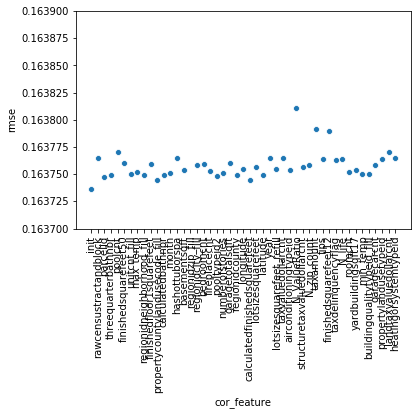

In [16]:
sns.scatterplot(x='cor_feature', y='rmse', data=cor_del_df)
plt.ylim(0.1637,0.16390)
plt.xticks(rotation='vertical')
plt.show()

In [17]:
df_merge_final = df_merge[feature_list + ['logerror']]
df_merge_final.to_csv('output/final_merge.csv', index = False)

In [18]:
df_sub_2016 = pd.read_csv('./output/init_sub_2016.csv')
df_sub_2017 = pd.read_csv('./output/init_sub_2017.csv')

/local/home/ningzesun/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (24,45,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/local/home/ningzesun/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
df_sub_2016['year'] = 0
df_sub_2016['month'] = 10

In [22]:
df_sub_2016_final = df_sub_2016[feature_list]

In [24]:
df_sub_2016_final.to_csv('./output/final_sub_2016.csv', index = False)

In [25]:
df_sub_2017['year'] = 0
df_sub_2017['month'] = 10
df_sub_2017_final = df_sub_2017[feature_list]
df_sub_2017_final.to_csv('./output/final_sub_2017.csv', index = False)